# **Equipo 1**

Yocelin Juárez Arroyo - A00819828

Luis Arturo Dan Fong - A01650672

Octavio Edelberto Reyes Torres - A00269987


# **Montar bases de datos y lectura de ellas**

####**Versionamiento**
**Última actualización**

Fecha: 10 octubre - 11:30pm

Por: Octavio

**Estatus:**
Disponible

In [360]:

from google.colab import drive
drive.mount('/content/drive')
#folder_path = '/content/drive/My Drive/Proyecto Integrador/'
#folder_path = '/content/drive/My Drive/Proyecto Integrador/colab/'

#Octavio - Luis
folder_path = '/content/drive/My Drive/Proyecto Integrador/'

#Yocelin (owner)
#folder_path = '/content/drive/My Drive/Proyecto Integrador/Proyecto Integrador/'

Mounted at /content/drive


In [361]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import gc

# Ruta del archivo de contactables de Egresados
ruta_archivo = folder_path + 'bases/contactables_EXATEC.csv'

# Leer el archivo Excel
df_contactables = pd.read_csv(ruta_archivo)


print(df_contactables.head())

   IA_ID contactable_dominio_correo contactable_estatus  Unnamed: 3     rol
0      6                   itesm.mx      Ciclo Anterior         NaN     NaN
1     21                  gmail.com      Ciclo Anterior         NaN     NaN
2     48          grupoceres.com.mx      Ciclo Anterior         NaN  Exatec
3     63               yahoo.com.mx      Ciclo Anterior         NaN     NaN
4    106                hotmail.com      Ciclo Anterior         NaN     NaN


**Categoría de dominio** (categoria_dominio_correo)

**Descripción**: Variable categórica que clasifica los dominios de correo en: "Genérico", "Corporativo", "Educativo", "Gobierno". Los dominios del Tec (e.g., "tec.mx", "exatec.tec.mx") se clasificarán como "Educativo"

**Justificación**: Categorizar los correos electrónicos en función de si son corporativos, educativos, gubernamentales, o genéricos puede ayudar a establecer un perfil más claro del contacto. Identificar si un egresado usa un correo corporativo, del sector público o un correo del Tec podría ser útil para adaptar la estrategia de comunicación

In [362]:
# Definir las categorías de dominios
educativos = ['tec.mx', 'exatec.tec.mx', 'itesm.mx']
gobierno = ['gob.mx', 'senado.gob.mx']
genéricos = ['gmail.com', 'hotmail.com', 'yahoo.com']

# Crear la función de categorización
def categorizar_dominio(dominio):
    if dominio in educativos:
        return 'Educativo'
    elif dominio in gobierno:
        return 'Gobierno'
    elif dominio in genéricos:
        return 'Genérico'
    else:
        return 'Otros'

# Aplicar la función a la columna 'contactable_dominio_correo'
df_contactables['categoria_dominio_correo'] = df_contactables['contactable_dominio_correo'].apply(categorizar_dominio)


#Eliminación de variables
columnas_a_eliminar = ['contactable_dominio_correo']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)
print(df_contactables.columns)
#print(df_marketing.head())

Index(['IA_ID', 'contactable_estatus', 'Unnamed: 3', 'rol',
       'categoria_dominio_correo'],
      dtype='object')


In [363]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_contactables.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
print(porcentaje_vacios)

Unnamed: 3    100.000000
rol             7.174746
dtype: float64


**Preprocesamiento**:
La variable **contactable_estatus** solo tiene 2 valores: Ciclo anterior y ciclo actual, por ello se hará numérica


In [364]:
#ciclo anterior = 1
#ciclo actual = 2

# Convertir "ciclo anterior" a 1 y "ciclo actual" a 0
#df_contactables['ciclo_numerico'] = df_contactables['contactable_estatus'].map({'Ciclo Anterior': 1, 'Ciclo Actual': 2})

#Eliminar la variable contactable_estatus
columnas_a_eliminar = ['contactable_estatus', 'rol']
df_contactables = df_contactables.drop(columns=columnas_a_eliminar)


print(df_contactables.head())


   IA_ID  Unnamed: 3 categoria_dominio_correo
0      6         NaN                Educativo
1     21         NaN                 Genérico
2     48         NaN                    Otros
3     63         NaN                    Otros
4    106         NaN                 Genérico


In [365]:
# Ruta del archivo con información del comportamiento de marketing de los egresados
ruta_archivo = folder_path + 'bases/MailCampana.csv'

# Leer el archivo Excel
df_marketing = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print(df_marketing.head())

   IA_ID  opened  clicked  replied                             object_id  \
0   21.0       2        0        0  82ede0a1-0076-4aeb-b540-ffd598a33e6b   
1   48.0       4        0        0  7508a1ed-2608-41ce-80a9-a47cddcfdd23   
2  372.0       4        0        0  16c9b8b6-2227-4c53-864f-ceb8e7e34455   
3  372.0       2        0        0  99fc9282-d373-40d3-ade0-7cb937f3408b   
4  372.0       3        0        0  c3963868-9b41-48b6-ac99-76bf916e91af   

   Contacto ID  Correo de marketing ID   Campaña ID  
0    224776056            3.622020e+11  10949903422  
1     60136712            3.633040e+11  10949903422  
2    221283951            3.645170e+11  10949903422  
3    221283951            3.603660e+11  10949903422  
4    221283951            3.622020e+11  10949903422  


In [366]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_marketing.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
print(porcentaje_vacios)

IA_ID    3.708568
dtype: float64


In [367]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_marketing.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_marketing[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)


Variable  Cantidad de Valores Distintos
0   object_id                         216229
1  Campaña ID                             11

In [368]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()


138

**Preprocesamiento**:

Las variables **object_id** y **Contacto ID** son un identificador local del egresado, tiene el mismo funcionamiento que IA_ID por ello se eliminarán.

In [369]:
#Eliminación de variables
columnas_a_eliminar = ['object_id', 'Contacto ID']
df_marketing = df_marketing.drop(columns=columnas_a_eliminar)
print(df_marketing.columns)
#print(df_marketing.head())

Index(['IA_ID', 'opened', 'clicked', 'replied', 'Correo de marketing ID',
       'Campaña ID'],
      dtype='object')


In [370]:
# Ruta del archivo con información intereses, residencia, laborales, premios de los egresados
ruta_archivo =  folder_path +  'bases/Infoadicional.csv'

# Leer el archivo Excel
df_intereses = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print(df_intereses.head())

<ipython-input-370-1b8021dd9d20>:5: DtypeWarning: Columns (48,49,51,52,57,61,63,64,68,69,71,72,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_intereses = pd.read_csv(ruta_archivo)


    IA_ID info_ESTADO_RESIDENCIA info_PAIS_RESIDENCIA info_FECHA_MAIL_ACTIVO  \
0  145190             Nuevo León               México       01/08/2023 00:00   
1  162191                    NaN                  NaN       24/06/2024 00:00   
2  155105                    NaN                  NaN       05/05/2023 00:00   
3  176490                    NaN                  NaN       05/05/2023 00:00   
4  175820                    NaN                  NaN       05/05/2023 00:00   

  info_TIPO_DOMICILIO info_POBLACION_ACTIVO   info_MUNICIPIO_ACTIVO  \
0     Dirección Local             Monterrey               Monterrey   
1                 NaN          Villahermosa                     NaN   
2     Dirección Local                   NaN          Aguascalientes   
3     Dirección Local                   NaN  San Pedro Garza García   
4     Dirección Local                   NaN               Guadalupe   

  info_ESTADO_ACTIVO info_PAIS_ACTIVO info_FECHA_ACTIVO  ...  \
0         Nuevo León        

In [371]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_intereses.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_intereses[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)


Variable  Cantidad de Valores Distintos
0   info_ESTADO_RESIDENCIA                            155
1     info_PAIS_RESIDENCIA                             95
2   info_FECHA_MAIL_ACTIVO                           7102
3      info_TIPO_DOMICILIO                              1
4    info_POBLACION_ACTIVO                           1685
..                     ...                            ...
65  info_interes_BIENESTAR                              1
66  info_interes_ESCRITURA                              1
67       info_interes_MODA                              1
68      info_interes_HOGAR                              1
69     info_interes_MUSICA                              1

[70 rows x 2 columns]

In [372]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_intereses.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
print(porcentaje_vacios)

info_ESTADO_RESIDENCIA    95.167389
info_PAIS_RESIDENCIA      94.805437
info_FECHA_MAIL_ACTIVO    10.852702
info_TIPO_DOMICILIO       66.974975
info_POBLACION_ACTIVO     80.890902
                            ...    
info_interes_BIENESTAR    99.873874
info_interes_ESCRITURA    99.976056
info_interes_MODA         99.975220
info_interes_HOGAR        99.984687
info_interes_MUSICA       99.925382
Length: 72, dtype: float64


**Preprocesamiento**:

La variable info_TIPO_DOMICILIO tiene un solo valor que es "Domicilio Local" y la tienen aquellos que poseen un domicilio, por ello se eliminará

La variable info_NUMERO_CELULAR tiene Si o No refiriéndose a si tiene celular o no, por ello se hará binario

La variable info_SOCIAL_LINKEDIN tiene Si o No refiriéndose a si tiene linkedin o no, por ello se hará binario

La variable info_EMPLEO_ACTUAL1[1-5] tiene Y o N refiriéndose a es empleo actual o no, por ello se hará binario

Los premios que comparten son tecleados por el egresado, lo que significa que no está validado por ello se eliminará la columna pues no genera un valor

Las variables:
info_FECHA_PREMIO5	info_interes_EDUCACION	info_interes_TECNOLOGIA	info_interes_CIENCIA	info_interes_POLITICA	info_interes_SUSTENTABILIDAD	info_interes_HISTORIA	info_interes_ARTE	info_interes_ECONOMIA	info_interes_NEGOCIOS	info_interes_ORGANIZACIONES_SIN_FINES_LUCRO	info_interes_DEPORTES	info_interes_CULTURA	info_interes_VIAJES	info_interes_SALUD	info_interes_ANIMALES	info_interes_NUTRICION	info_interes_LIDERAZGO	info_interes_BIENESTAR	info_interes_ESCRITURA	info_interes_MODA	info_interes_HOGAR	info_interes_MUSICA

Tienen "Si" o son nullas, por ello se hará binaria 1:0


Aunque las columnas de intereses tienne más del 99% vacío, se eliminan

In [373]:
# Convertir "Sí" a 1 y "No" a 0
df_intereses['tiene_numero_celular'] = df_intereses['info_NUMERO_CELULAR'].map({'Sí': 1, 'No': 0})
df_intereses['tiene_linkedin'] = df_intereses['info_SOCIAL_LINKEDIN'].map({'Sí': 1, 'No': 0})
df_intereses['es_empleo_actual'] = df_intereses['info_EMPLEO_ACTUAL1'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua2'] = df_intereses['info_EMPLEO_ACTUAL2'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua3'] = df_intereses['info_EMPLEO_ACTUAL3'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua4'] = df_intereses['info_EMPLEO_ACTUAL4'].map({'Y': 1, 'N': 0})
df_intereses['es_empleo_actua5'] = df_intereses['info_EMPLEO_ACTUAL5'].map({'Y': 1, 'N': 0})

#df_intereses['interes_EDUCACION'] = np.where(df_intereses['info_interes_EDUCACION'] == 'Sí', 1, 0)
#df_intereses['interes_TECNOLOGIA'] = np.where(df_intereses['info_interes_TECNOLOGIA'] == 'Sí', 1, 0)
#df_intereses['interes_CIENCIA'] = np.where(df_intereses['info_interes_CIENCIA'] == 'Sí', 1, 0)
#df_intereses['interes_POLITICA'] = np.where(df_intereses['info_interes_POLITICA'] == 'Sí', 1, 0)
#df_intereses['interes_SUSTENTABILIDAD'] = np.where(df_intereses['info_interes_SUSTENTABILIDAD'] == 'Sí', 1, 0)
#df_intereses['interes_HISTORIA'] = np.where(df_intereses['info_interes_HISTORIA'] == 'Sí', 1, 0)
#df_intereses['interes_ARTE'] = np.where(df_intereses['info_interes_ARTE'] == 'Sí', 1, 0)
#df_intereses['interes_ECONOMIA'] = np.where(df_intereses['info_interes_ECONOMIA'] == 'Sí', 1, 0)
#df_intereses['interes_NEGOCIOS'] = np.where(df_intereses['info_interes_NEGOCIOS'] == 'Sí', 1, 0)
#df_intereses['interes_ORGANIZACIONES_SIN_FINES_LUCRO'] = np.where(df_intereses['info_interes_ORGANIZACIONES_SIN_FINES_LUCRO'] == 'Sí', 1, 0)
#df_intereses['interes_DEPORTES'] = np.where(df_intereses['info_interes_DEPORTES'] == 'Sí', 1, 0)
#df_intereses['interes_CULTURA'] = np.where(df_intereses['info_interes_CULTURA'] == 'Sí', 1, 0)
#df_intereses['interes_VIAJES'] = np.where(df_intereses['info_interes_EDUCACION'] == 'Sí', 1, 0)
#df_intereses['interes_SALUD'] = np.where(df_intereses['info_interes_SALUD'] == 'Sí', 1, 0)
#df_intereses['interes_ANIMALES'] = np.where(df_intereses['info_interes_ANIMALES'] == 'Sí', 1, 0)
#df_intereses['interes_NUTRICION'] = np.where(df_intereses['info_interes_NUTRICION'] == 'Sí', 1, 0)
#df_intereses['interes_LIDERAZGO'] = np.where(df_intereses['info_interes_LIDERAZGO'] == 'Sí', 1, 0)
#df_intereses['interes_BIENESTAR'] = np.where(df_intereses['info_interes_BIENESTAR'] == 'Sí', 1, 0)
#df_intereses['interes_ESCRITURA'] = np.where(df_intereses['info_interes_ESCRITURA'] == 'Sí', 1, 0)
#df_intereses['interes_MODA'] = np.where(df_intereses['info_interes_MODA'] == 'Sí', 1, 0)
#df_intereses['interes_HOGAR'] = np.where(df_intereses['info_interes_HOGAR'] == 'Sí', 1, 0)
#df_intereses['interes_MUSICA'] = np.where(df_intereses['info_interes_MUSICA'] == 'Sí', 1, 0)


#Eliminación de variables
columnas_a_eliminar = ['info_TIPO_DOMICILIO', 'info_NUMERO_CELULAR', 'info_SOCIAL_LINKEDIN', 'info_EMPLEO_ACTUAL1', 'info_EMPLEO_ACTUAL2', 'info_EMPLEO_ACTUAL3', 'info_EMPLEO_ACTUAL4', 'info_EMPLEO_ACTUAL5', 'info_TIPO_PREMIO1', 'info_TIPO_PREMIO2', 'info_TIPO_PREMIO3', 'info_TIPO_PREMIO4', 'info_TIPO_PREMIO5', 'info_interes_EDUCACION',
                      'info_interes_TECNOLOGIA', 'info_interes_CIENCIA', 'info_interes_POLITICA', 'info_interes_SUSTENTABILIDAD', 'info_interes_HISTORIA', 'info_interes_ARTE', 'info_interes_ECONOMIA', 'info_interes_NEGOCIOS',
                       'info_interes_ORGANIZACIONES_SIN_FINES_LUCRO', 'info_interes_DEPORTES', 'info_interes_CULTURA', 'info_interes_VIAJES', 'info_interes_SALUD', 'info_interes_ANIMALES', 'info_interes_NUTRICION',
                       'info_interes_LIDERAZGO', 'info_interes_BIENESTAR', 'info_interes_ESCRITURA', 'info_interes_MODA', 'info_interes_HOGAR', 'info_interes_MUSICA']

df_intereses = df_intereses.drop(columns=columnas_a_eliminar)
print(df_intereses.columns)
#print(df_marketing.head())

Index(['IA_ID', 'info_ESTADO_RESIDENCIA', 'info_PAIS_RESIDENCIA',
       'info_FECHA_MAIL_ACTIVO', 'info_POBLACION_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'info_NOMBRE_EMPRESA1', 'info_PUESTO1',
       'info_PAIS_EMPRESA1', 'info_FECHA_INGRESO_EMPRESA1',
       'info_NOMBRE_EMPRESA2', 'info_PUESTO2', 'info_PAIS_EMPRESA2',
       'info_FECHA_INGRESO_EMPRESA2', 'info_NOMBRE_EMPRESA3', 'info_PUESTO3',
       'info_PAIS_EMPRESA3', 'info_FECHA_INGRESO_EMPRESA3',
       'info_NOMBRE_EMPRESA4', 'info_PUESTO4', 'info_PAIS_EMPRESA4',
       'info_FECHA_INGRESO_EMPRESA4', 'info_NOMBRE_EMPRESA5', 'info_PUESTO5',
       'info_PAIS_EMPRESA5', 'info_FECHA_INGRESO_EMPRESA5',
       'info_NOMBRE_PREMIO1', 'info_FECHA_PREMIO1', 'info_NOMBRE_PREMIO2',
       'info_FECHA_PREMIO2', 'info_NOMBRE_PREMIO3', 'info_FECHA_PREMIO3',
       'info_NOMBRE_PREMIO4', 'info_FECHA_PREMIO4',

In [374]:
# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()


2492721

In [375]:
# Ruta del archivo con información escolar de los egresados
ruta_archivo = folder_path +  'bases/IA_BaseEXATEC_entregada.csv'

# Leer el archivo Excel
df_escolar = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print(df_escolar.head())

   IA_ID  base_SEXO base_año nac base_NACIONALIDAD base_CIUDADNACIMIENTO  \
0      6  Masculino         1928          Mexicana                México   
1     21  Masculino         1928          Mexicana            Indefinido   
2     48  Masculino         1931          Mexicana            Indefinido   
3     63  Masculino         1930          Mexicana             Monterrey   
4    106  Masculino         1929          Mexicana             Monterrey   

  base_ESTADONACIMIENTO base_PAISNACIMIENTO base_NOCONTACTAR  \
0      Ciudad de México          Indefinido                    
1                                                              
2               Sinaloa              México                    
3            Nuevo León              México                    
4            Nuevo León              México                    

  base_exatec personalizado base_CIUDAD_RESIDENCIA  ... base_CDEMPRESA  \
0                        No                    NaN  ...            NaN   
1         

<ipython-input-375-c8c1f5e053ed>:5: DtypeWarning: Columns (2,14,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_escolar = pd.read_csv(ruta_archivo)


In [376]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_escolar.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_escolar[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0                       base_SEXO                              2
1                    base_año nac                            156
2               base_NACIONALIDAD                            101
3           base_CIUDADNACIMIENTO                           3056
4           base_ESTADONACIMIENTO                            420
5             base_PAISNACIMIENTO                             83
6                base_NOCONTACTAR                              2
7       base_exatec personalizado                              3
8          base_CIUDAD_RESIDENCIA                           3627
9          base_ESTADO_RESIDENCIA                            357
10           base_PAIS_RESIDENCIA                             95
11   base_ha_actualizado_teléfono                              2
12           base_FECHAGRADUACION                           2341
13                   base_AñoGrad                             92
14         base_PROGRAMAACADEMICO                            475
15              base_Tipo Escuela                             10
16         base_SIGLASDELPROGRAMA                            655
17                  base_IDCAMPUS                             40
18              base_NOMBRECAMPUS                             40
19           base_campusoperación                             37
20                     base_NIVEL                              5
21                  Nivel_general                              2
22             base_NOMBREEMPRESA                          47802
23               base_GIROEMPRESA                             71
24               base_TIPOEMPRESA                              5
25        base_AREAORGANIZACIONAL                             33
26                    base_PUESTO                          38065
27         base_RESPONSABILIDADES                          48688
28             base_ESTATUSEMPLEO                              3
29                 base_CDEMPRESA                           4065
30                base_EDOEMPRESA                             34
31               base_PAISEMPRESA                            107
32              base_ASOCIACIONES                              1
33        base_PUESTOASOCIACIONES                              1
34    base_PREMIOSRECONOCIMIENTOS                              1
35  base_Interesadocompartirtemas                              3
36                 base_INTERESES                            942
37                base_updatedata                              2
38              base_HizoPrepaTec                              2

In [377]:
#columnas_vacias = df_escolar.columns[df_escolar.isna().all()].tolist()
#print(df_escolar.isna().sum())
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_escolar.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
print(porcentaje_vacios)


base_CIUDADNACIMIENTO             0.010690
base_NOCONTACTAR                  0.010690
base_CIUDAD_RESIDENCIA           21.310799
base_ESTADO_RESIDENCIA           20.163405
base_PAIS_RESIDENCIA             20.138461
base_NOMBREEMPRESA               57.793785
base_GIROEMPRESA                 60.208710
base_TIPOEMPRESA                 61.602484
base_AREAORGANIZACIONAL          59.140726
base_PUESTO                      57.751024
base_RESPONSABILIDADES           69.908626
base_ESTATUSEMPLEO               60.899997
base_CDEMPRESA                   63.386699
base_EDOEMPRESA                  64.102930
base_PAISEMPRESA                 60.961592
base_ASOCIACIONES                99.998982
base_PUESTOASOCIACIONES          99.998982
base_PREMIOSRECONOCIMIENTOS      99.998982
base_Interesadocompartirtemas     4.850722
base_INTERESES                   96.622464
base_updatedata                  98.520706
dtype: float64


**Preprocesamiento**:

La variable país de nacimiento se pude obtener la nacionalidad, habrá excepciones que se hayan nauralizado pero son pocos, po ello se eliminará el país de nacimiento

La variable base_ha_actualizado_teléfono es Si o no, por ello se cambiará a Si=1 No=0

La variable base_FECHAGRADUACION tiene toda la fecha, sin embargo existe otra con el año y es lo importante, por ello se borrará

La variable base_PROGRAMAACADEMICO es la descripción de la variable SIGLAS del programa, por ello la descripción se eliminará

La variable base_NOMBRECAMPUS es la descripcion de la variable ICAMPUS, por ello la descripción se borrará

La variable base_NIVELes la descripción de la variable NICELACADEMICO por ello se eliminará, igual que la variable Nivel_general

La variable base_RESPONSABILIDADES es un campo abierto y se llenó con información distinta, por ello no genera valor se eliminará

Las variables base_ASOCIACIONES	base_PUESTOASOCIACIONES	base_PREMIOSRECONOCIMIENTOS tienen el 99.9% vacíos, por ello se eliminarán y la de intereses 96% pero ya tenemos esa información en otro df

La variable base_HizoPrepaTec es Si o no, por ello se cambiará a Si=1 No=0

In [378]:
#1 y 9
df_escolar['no_contactar'] = np.where(df_escolar['base_NOCONTACTAR'] == 1, 1, 0)
df_escolar['ha_actualizado_teléfono'] = df_escolar['base_ha_actualizado_teléfono'].map({'Sí': 1, 'No': 0})
df_escolar['HizoPrepaTec'] = df_escolar['base_HizoPrepaTec'].map({'Sí': 1, 'No': 0})

#Eliminación de variables
columnas_a_eliminar = ['base_PAISNACIMIENTO', 'base_NOCONTACTAR', 'base_ha_actualizado_teléfono', 'base_FECHAGRADUACION', 'base_PROGRAMAACADEMICO', 'base_NOMBRECAMPUS', 'base_NIVEL', 'Nivel_general', 'base_RESPONSABILIDADES', 'base_ASOCIACIONES',	'base_PUESTOASOCIACIONES',	'base_PREMIOSRECONOCIMIENTOS',
                       'base_INTERESES', 'base_HizoPrepaTec']
df_escolar = df_escolar.drop(columns=columnas_a_eliminar)
print(df_escolar.columns)
#print(df_marketing.head())

print(df_escolar.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_CIUDADNACIMIENTO', 'base_ESTADONACIMIENTO',
       'base_exatec personalizado', 'base_CIUDAD_RESIDENCIA',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'base_updatedata', 'no_contactar', 'ha_actualizado_teléfono',
       'HizoPrepaTec'],
      dtype='object')
   IA_ID  base_SEXO base_año nac base_NACIONALIDAD base_CIUDADNACIMIENTO  \
0      6  Masculino         1928          Mexicana                México   
1     21  Masculino         1928          Mexicana            Indefinido   
2     48  Masculino         1931     

0

In [379]:
# Ruta del archivo con información egresados suscritos a un medio de comunicación
ruta_archivo =  folder_path + 'bases/egresados_suscritos_medios.csv'

# Leer el archivo Excel
df_suscritos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print(df_suscritos.head())

    IA_ID suscrito_FechaRegistro
0  312476       05/02/2021 13:00
1  297273       05/02/2021 13:00
2  283769       10/09/2020 14:25
3  312737       05/02/2021 13:00
4  304946       10/09/2020 14:25


In [380]:
# Ruta del archivo con información de egresados que participaron en la ultima campaña
ruta_archivo =  folder_path + 'bases/giveaway_actualizacion.csv'

# Leer el archivo Excel
df_giveaway = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print(df_giveaway.head())

    IA_ID    giveaway_fecha
0  313133  25/09/2024 22:18
1   65913  25/09/2024 22:18
2   51646  25/09/2024 22:18
3  327947  25/09/2024 22:18
4   63267  25/09/2024 22:18


In [381]:
# Ruta del archivo con información de egresados que participaron en la ultima campaña
ruta_archivo =  folder_path + 'bases/EXA_Evento_EXATEC_asistentes.csv'

# Leer el archivo Excel
df_eventos = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del archivo
print(df_eventos.head())

      IA_ID                        evento_EventName evento_StartDateTime  \
0  179294.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
1  179294.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
2  321875.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
3  321875.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   
4  154859.0  Regreso a Casa PrepaTec Aguascalientes    17/03/2022, 19:00   

               evento_Campus evento_Status             evento_Category  \
0  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
1  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
2  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
3  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   
4  TEC Campus Aguascalientes        Closed  Egresados - Regreso a Casa   

                            Ticket Type: Item Name evento_AttendeeId  \
0  Registro Regreso a Casa

**Preprocesamiento:**

Las variables: evento_StartDateTime, evento_Status,evento_AttendeeId, evento_AttendeeID es información interna del evento por ello no generan valor y se eliminarán

La variable Ticket Type: Item Name se repite con el event name, por ello se eliminará

La variable evento_attendee_rol tiene la información que en la base principal se repite, por ello se eliminará

In [382]:
#Eliminación de variables
columnas_a_eliminar = ['evento_StartDateTime', 'evento_Status', 'Ticket Type: Item Name', 'evento_AttendeeId', 'evento_AttendeeID', 'evento_attendee_rol']
df_eventos = df_eventos.drop(columns=columnas_a_eliminar)
print(df_eventos.columns)
#print(df_marketing.head())

print(df_eventos.head())

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'evento_EventName', 'evento_Campus', 'evento_Category',
       'evento_CheckedIn', 'evento_attendeeStatus'],
      dtype='object')
      IA_ID                        evento_EventName  \
0  179294.0  Regreso a Casa PrepaTec Aguascalientes   
1  179294.0  Regreso a Casa PrepaTec Aguascalientes   
2  321875.0  Regreso a Casa PrepaTec Aguascalientes   
3  321875.0  Regreso a Casa PrepaTec Aguascalientes   
4  154859.0  Regreso a Casa PrepaTec Aguascalientes   

               evento_Campus             evento_Category  evento_CheckedIn  \
0  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
1  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
2  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
3  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   
4  TEC Campus Aguascalientes  Egresados - Regreso a Casa             False   

  evento_attendeeStatus  
0            Registered  
1

0

In [383]:
# Uniremos los DataFrames utilizando 'IA_ID' como clave
df_unido = pd.merge(df_contactables, df_marketing, on='IA_ID', how='left')
df_unido = pd.merge(df_unido, df_intereses, on='IA_ID', how='left')
df_unido = pd.merge(df_unido, df_escolar, on='IA_ID', how='left')
df_unido = pd.merge(df_unido, df_suscritos, on='IA_ID', how='left')
df_unido = pd.merge(df_unido, df_giveaway, on='IA_ID', how='left')
df_unido = pd.merge(df_unido, df_eventos, on='IA_ID', how='left')

# Mostrar el DataFrame resultante
print(df_unido)

         IA_ID  Unnamed: 3 categoria_dominio_correo  opened  clicked  replied  \
0            6         NaN                Educativo     NaN      NaN      NaN   
1           21         NaN                 Genérico     2.0      0.0      0.0   
2           48         NaN                    Otros     4.0      0.0      0.0   
3           63         NaN                    Otros     NaN      NaN      NaN   
4          106         NaN                 Genérico     NaN      NaN      NaN   
...        ...         ...                      ...     ...      ...      ...   
657364  370520         NaN                 Genérico     NaN      NaN      NaN   
657365  370520         NaN                 Genérico     NaN      NaN      NaN   
657366  370520         NaN                 Genérico     NaN      NaN      NaN   
657367  370520         NaN                 Genérico     NaN      NaN      NaN   
657368  370520         NaN                 Genérico     NaN      NaN      NaN   

        Correo de marketing

**Preprocesamiento:**
Se eliminarán las columnas que contienen más del 30% valores nulos

In [384]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 30]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
print(columnas_mas_del_30_vacios)


Unnamed: 3                       100.000000
info_ESTADO_RESIDENCIA            83.746724
info_PAIS_RESIDENCIA              83.122417
info_POBLACION_ACTIVO             74.493017
info_MUNICIPIO_ACTIVO             59.392670
info_ESTADO_ACTIVO                59.392670
info_PAIS_ACTIVO                  59.392670
info_FECHA_ACTIVO_NUM_CELULAR     33.895118
info_NOMBRE_EMPRESA1              93.824777
info_PUESTO1                      93.822800
info_PAIS_EMPRESA1                94.757891
info_FECHA_INGRESO_EMPRESA1       93.774881
info_NOMBRE_EMPRESA2              95.789275
info_PUESTO2                      95.791557
info_PAIS_EMPRESA2                96.465303
info_FECHA_INGRESO_EMPRESA2       95.773302
info_NOMBRE_EMPRESA3              96.970043
info_PUESTO3                      96.969738
info_PAIS_EMPRESA3                97.473869
info_FECHA_INGRESO_EMPRESA3       96.967000
info_NOMBRE_EMPRESA4              97.659001
info_PUESTO4                      97.659153
info_PAIS_EMPRESA4              

In [385]:
def drop_columns_with_missing_values(df, threshold=0.7):# Calculate the percentage of missing values in each column
  missing_percent = df.isnull().mean()

  # Identify columns exceeding the threshold
  columns_to_drop = missing_percent[missing_percent >= threshold].index

  # Drop the identified columns
  df_dropped = df.drop(columns=columns_to_drop)

  return df_dropped

df_dropped = drop_columns_with_missing_values(df_unido)

# Print the remaining columns
print(df_dropped.columns)


Index(['IA_ID', 'categoria_dominio_correo', 'opened', 'clicked', 'replied',
       'Correo de marketing ID', 'Campaña ID', 'info_FECHA_MAIL_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_CIUDADNACIMIENTO', 'base_ESTADONACIMIENTO',
       'base_exatec personalizado', 'base_CIUDAD_RESIDENCIA',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'no_contactar', 'ha_actualiza

In [386]:
df_dropped

IA_ID categoria_dominio_correo  opened  clicked  replied  \
0            6                Educativo     NaN      NaN      NaN   
1           21                 Genérico     2.0      0.0      0.0   
2           48                    Otros     4.0      0.0      0.0   
3           63                    Otros     NaN      NaN      NaN   
4          106                 Genérico     NaN      NaN      NaN   
...        ...                      ...     ...      ...      ...   
657364  370520                 Genérico     NaN      NaN      NaN   
657365  370520                 Genérico     NaN      NaN      NaN   
657366  370520                 Genérico     NaN      NaN      NaN   
657367  370520                 Genérico     NaN      NaN      NaN   
657368  370520                 Genérico     NaN      NaN      NaN   

        Correo de marketing ID   Campaña ID info_FECHA_MAIL_ACTIVO  \
0                          NaN          NaN                    NaN   
1                 3.622020e+11  10949903422                    NaN   
2                 3.633040e+11  10949903422       15/03/2019 00:00   
3                          NaN          NaN                    NaN   
4                          NaN          NaN       06/05/2004 00:00   
...                        ...          ...                    ...   
657364                     NaN          NaN       17/07/2020 00:00   
657365                     NaN          NaN       17/07/2020 00:00   
657366                     NaN          NaN       17/07/2020 00:00   
657367                     NaN          NaN       17/07/2020 00:00   
657368                     NaN          NaN       17/07/2020 00:00   

       info_MUNICIPIO_ACTIVO info_ESTADO_ACTIVO  ...  \
0                        NaN                NaN  ...   
1                        NaN                NaN  ...   
2                        NaN                NaN  ...   
3                        NaN                NaN  ...   
4                        NaN                NaN  ...   
...                      ...                ...  ...   
657364            Indefinido   Ciudad de México  ...   
657365            Indefinido   Ciudad de México  ...   
657366            Indefinido   Ciudad de México  ...   
657367            Indefinido   Ciudad de México  ...   
657368            Indefinido   Ciudad de México  ...   

       base_Interesadocompartirtemas no_contactar ha_actualizado_teléfono  \
0                                             0.0                     0.0   
1                                             0.0                     1.0   
2                                             0.0                     1.0   
3                                             0.0                     1.0   
4                                             0.0                     1.0   
...                              ...          ...                     ...   
657364                                        0.0                     1.0   
657365                                        0.0                     1.0   
657366                                        0.0                     1.0   
657367                                        0.0                     1.0   
657368                                        0.0                     1.0   

       HizoPrepaTec  suscrito_FechaRegistro  evento_EventName evento_Campus  \
0               0.0        10/09/2020 14:25               NaN           NaN   
1               0.0                     NaN               NaN           NaN   
2               0.0        10/09/2020 14:25               NaN           NaN   
3               0.0                     NaN               NaN           NaN   
4               0.0        30/06/2022 12:47               NaN           NaN   
...             ...                     ...               ...           ...   
657364          0.0        21/11/2022 20:05               NaN           NaN   
657365          0.0        10/09/2020 14:25               NaN           NaN   
657366          0.0        21/

In [387]:
df_unido = df_dropped

In [388]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
print(columnas_mas_del_30_vacios)

opened                           21.530678
clicked                          21.530678
replied                          21.530678
Correo de marketing ID           21.530678
Campaña ID                       21.530678
info_FECHA_MAIL_ACTIVO           10.232761
info_MUNICIPIO_ACTIVO            59.392670
info_ESTADO_ACTIVO               59.392670
info_PAIS_ACTIVO                 59.392670
info_FECHA_ACTIVO_NUM_CELULAR    33.895118
info_ESTADOCIVIL                 10.153354
base_CIUDAD_RESIDENCIA           20.643961
base_ESTADO_RESIDENCIA           18.784579
base_PAIS_RESIDENCIA             18.757349
base_NOMBREEMPRESA               53.594556
base_GIROEMPRESA                 56.830486
base_TIPOEMPRESA                 60.820939
base_AREAORGANIZACIONAL          55.643938
base_PUESTO                      53.576302
base_ESTATUSEMPLEO               57.665938
base_CDEMPRESA                   60.966824
base_EDOEMPRESA                  62.080354
base_PAISEMPRESA                 57.723136
suscrito_Fe

In [389]:
df_unido

IA_ID categoria_dominio_correo  opened  clicked  replied  \
0            6                Educativo     NaN      NaN      NaN   
1           21                 Genérico     2.0      0.0      0.0   
2           48                    Otros     4.0      0.0      0.0   
3           63                    Otros     NaN      NaN      NaN   
4          106                 Genérico     NaN      NaN      NaN   
...        ...                      ...     ...      ...      ...   
657364  370520                 Genérico     NaN      NaN      NaN   
657365  370520                 Genérico     NaN      NaN      NaN   
657366  370520                 Genérico     NaN      NaN      NaN   
657367  370520                 Genérico     NaN      NaN      NaN   
657368  370520                 Genérico     NaN      NaN      NaN   

        Correo de marketing ID   Campaña ID info_FECHA_MAIL_ACTIVO  \
0                          NaN          NaN                    NaN   
1                 3.622020e+11  10949903422                    NaN   
2                 3.633040e+11  10949903422       15/03/2019 00:00   
3                          NaN          NaN                    NaN   
4                          NaN          NaN       06/05/2004 00:00   
...                        ...          ...                    ...   
657364                     NaN          NaN       17/07/2020 00:00   
657365                     NaN          NaN       17/07/2020 00:00   
657366                     NaN          NaN       17/07/2020 00:00   
657367                     NaN          NaN       17/07/2020 00:00   
657368                     NaN          NaN       17/07/2020 00:00   

       info_MUNICIPIO_ACTIVO info_ESTADO_ACTIVO  ...  \
0                        NaN                NaN  ...   
1                        NaN                NaN  ...   
2                        NaN                NaN  ...   
3                        NaN                NaN  ...   
4                        NaN                NaN  ...   
...                      ...                ...  ...   
657364            Indefinido   Ciudad de México  ...   
657365            Indefinido   Ciudad de México  ...   
657366            Indefinido   Ciudad de México  ...   
657367            Indefinido   Ciudad de México  ...   
657368            Indefinido   Ciudad de México  ...   

       base_Interesadocompartirtemas no_contactar ha_actualizado_teléfono  \
0                                             0.0                     0.0   
1                                             0.0                     1.0   
2                                             0.0                     1.0   
3                                             0.0                     1.0   
4                                             0.0                     1.0   
...                              ...          ...                     ...   
657364                                        0.0                     1.0   
657365                                        0.0                     1.0   
657366                                        0.0                     1.0   
657367                                        0.0                     1.0   
657368                                        0.0                     1.0   

       HizoPrepaTec  suscrito_FechaRegistro  evento_EventName evento_Campus  \
0               0.0        10/09/2020 14:25               NaN           NaN   
1               0.0                     NaN               NaN           NaN   
2               0.0        10/09/2020 14:25               NaN           NaN   
3               0.0                     NaN               NaN           NaN   
4               0.0        30/06/2022 12:47               NaN           NaN   
...             ...                     ...               ...           ...   
657364          0.0        21/11/2022 20:05               NaN           NaN   
657365          0.0        10/09/2020 14:25               NaN           NaN   
657366          0.0        21/

In [390]:
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/LDG incubadora.csv'

# Leer el archivo Excel
df_incubadora = pd.read_csv(ruta_archivo)


# Mostrar las primeras filas del archivo
print(df_incubadora.head())


      IA_ID    Categoría Lider                       Campus  Año Graduación  \
0  357450.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
1  355251.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
2  355639.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
3  355278.0  Líder por Carrera  TEC Campus Ciudad de México            2023   
4  356922.0  Líder por Carrera  TEC Campus Ciudad de México            2023   

  Mes Graduación                                          Carrera  \
0          Junio                      Licenciado en Mercadotecnia   
1          Junio                     Licenciado en Emprendimiento   
2          Junio   Licenciado en Psicología Clínica y de la Salud   
3      Diciembre  Licenciado en Creación y Desarrollo de Empresas   
4      Diciembre                       Ingeniero en Biotecnología   

  Nivel (Carrera) Fecha Inicio Fecha Fin Líder de Generación: Id.  \
0     Profesional   29/06/2023       NaN 

In [391]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_incubadora.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_incubadora[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  \
0                                  Categoría Lider   
1                                           Campus   
2                                   Mes Graduación   
3                                          Carrera   
4                                  Nivel (Carrera)   
5                                     Fecha Inicio   
6                                        Fecha Fin   
7                         Líder de Generación: Id.   
8   Líder de Generación: Folio Líder de Generación   
9                       Fecha Inicio de Incubadora   
10                         Fecha Fin de Incubadora   

    Cantidad de Valores Distintos  
0                               2  
1                              27  
2                              11  
3                             145  
4                               3  
5                             141  
6                               2  
7                            4770  
8                            4770  
9                               1  
10                              2

**Preprocesamiento:**

La información de las variables Año Graduación	Mes Graduación	Carrera	Nivel (Carrera) se encuentran en otra base de datos más completa, por ello se eliminarán

Las variablea **Líder de Generación: Id.** y	**Líder de Generación: Folio Líder de Generación** son IDs de la inciativa que no generan valor

Las variables **Líder Histórico** y	**Incubadora de lideres** tienen TRUE o FALSE se converitán a 1 o 0

In [392]:
#1 y 9
df_incubadora['LiderHistorico'] = df_incubadora['Líder Histórico'].map({'TRUE': 1, 'FALSE': 0})
df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminación de variables
columnas_a_eliminar = ['Año Graduación',	'Mes Graduación',	'Carrera',	'Nivel (Carrera)', 'Líder de Generación: Id.',	'Líder de Generación: Folio Líder de Generación', 'Líder Histórico', 'Incubadora de lideres']
df_incubadora = df_incubadora.drop(columns=columnas_a_eliminar)
print(df_incubadora.columns)
#print(df_marketing.head())

print(df_incubadora.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'Categoría Lider', 'Campus', 'Fecha Inicio', 'Fecha Fin',
       'Fecha Inicio de Incubadora', 'Fecha Fin de Incubadora',
       'LiderHistorico', 'IncubadoralIderes'],
      dtype='object')
      IA_ID    Categoría Lider                       Campus Fecha Inicio  \
0  357450.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
1  355251.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
2  355639.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
3  355278.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   
4  356922.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   

  Fecha Fin Fecha Inicio de Incubadora Fecha Fin de Incubadora  \
0       NaN                 30/06/2024              30/06/2025   
1       NaN                 30/06/2024              30/06/2025   
2       NaN                 30/06/2024              30/06/2025   
3       NaN                 30/06/2024              31/12/2025   
4     

0

In [393]:
df_incubadora['es_LDGincubadora'] = 1
df_unidoLDG = pd.merge(df_unido, df_incubadora, on='IA_ID', how='left', indicator=True)
df_unidoLDG['es_LDGincubadora'] = np.where(df_unidoLDG['es_LDGincubadora'] == 1, 1, 0)

print(df_unidoLDG['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
print(df_incubadora.head())
# Mostrar el DataFrame resultante
print(df_unidoLDG)

_merge
left_only     620494
both           36926
right_only         0
Name: count, dtype: int64
      IA_ID    Categoría Lider                       Campus Fecha Inicio  \
0  357450.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
1  355251.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
2  355639.0  Líder por Carrera  TEC Campus Ciudad de México   29/06/2023   
3  355278.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   
4  356922.0  Líder por Carrera  TEC Campus Ciudad de México   05/12/2023   

  Fecha Fin Fecha Inicio de Incubadora Fecha Fin de Incubadora  \
0       NaN                 30/06/2024              30/06/2025   
1       NaN                 30/06/2024              30/06/2025   
2       NaN                 30/06/2024              30/06/2025   
3       NaN                 30/06/2024              31/12/2025   
4       NaN                 30/06/2024              31/12/2025   

   LiderHistorico  IncubadoralIderes  es_LDGincuba

In [394]:
#Unir con voluntariado
#Unir DF con una iniciativa LDG Incubadora
ruta_archivo =  folder_path + 'bases/Voluntariado.csv'

# Leer el archivo Excel
df_voluntariado = pd.read_csv(ruta_archivo)

In [395]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_voluntariado.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_voluntariado[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0  Proyectos Voluntariado                            127
1            Fecha Inicio                             48
2               Fecha Fin                             43
3                 Estatus                              4

In [396]:
df_voluntariado['es_Voluntariado'] = 1
df_unidoVoluntariado = pd.merge(df_unido, df_voluntariado, on='IA_ID', how='left', indicator=True)
df_unidoVoluntariado['es_Voluntariado'] = np.where(df_unidoVoluntariado['es_Voluntariado'] == 1, 1, 0)

print(df_unidoVoluntariado['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
print(df_voluntariado.head())
# Mostrar el DataFrame resultante
print(df_unidoVoluntariado)

_merge
left_only     638420
both           49441
right_only         0
Name: count, dtype: int64
    IA_ID                   Proyectos Voluntariado Fecha Inicio   Fecha Fin  \
0  125211                           Tconecto 21-22          NaN         NaN   
1  289280                           Tconecto 21-22          NaN         NaN   
2  301634           Partidas de ajedrez por la paz   01/04/2022  01/07/2022   
3  247874   Acompaña a abuelitos y abuelitas 21-22          NaN         NaN   
4  190474  Formando Tutores Prepanet  Ene-Mar 2022          NaN         NaN   

      Estatus  es_Voluntariado  
0   Prospecto                1  
1   Prospecto                1  
2  Voluntario                1  
3   Prospecto                1  
4   Prospecto                1  
         IA_ID categoria_dominio_correo  opened  clicked  replied  \
0            6                Educativo     NaN      NaN      NaN   
1           21                 Genérico     2.0      0.0      0.0   
2           48          

In [397]:
#Unir DF con una iniciativa Historia de éxito
ruta_archivo =  folder_path + 'bases/HistoriaExito.csv'

# Leer el archivo Excel
df_historiaexito = pd.read_csv(ruta_archivo)

df_historiaexito['es_HistoriaExito'] = 1

df_historiaexito


IA_ID                             HistoriaExito_Historia  \
0    192875.0                           Prueba para capacitación   
1    179294.0                                             PRueba   
2      9436.0  Ganador de premio Mérito EXATEC 2023 TEC Campu...   
3    240497.0  Ganador de premio Mérito EXATEC 2022 TEC Campu...   
4     63141.0                                  Ignorar es prueba   
..        ...                                                ...   
475   10293.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   
476   91245.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   
477  267992.0     Ganador de premio Mérito EXATEC 2024 TEC EGADE   
478   18560.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   
479   10198.0  Ganador de premio Mérito EXATEC 2024 TEC Campu...   

    HistoriaExito_Resumen HistoriaExito_Frase HistoriaExito_Trayectoria  \
0                     NaN                 NaN                       NaN   
1                     NaN                 NaN                       NaN   
2                     NaN                 NaN                       NaN   
3                     NaN                 NaN                       NaN   
4                     NaN                 NaN                       NaN   
..                    ...                 ...                       ...   
475                   NaN                 NaN                       NaN   
476                   NaN                 NaN                       NaN   
477                   NaN                 NaN                       NaN   
478                   NaN                 NaN                       NaN   
479                   NaN                 NaN                       NaN   

    HistoriaExito_Reconocimientos HistoriaExito_CompromisoSocial  \
0                             NaN                            NaN   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   
..                            ...                            ...   
475                           NaN                            NaN   
476                           NaN                            NaN   
477                           NaN                            NaN   
478                           NaN                            NaN   
479                           NaN                            NaN   

                              HistoriaExito_Referencia  \
0    https://micrmtec.lightning.force.com/lightning...   
1    https://micrmtec.lightning.force.com/lightning...   
2                                                  NaN   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
475                                                NaN   
476                                                NaN   
477                                                NaN   
478                                                NaN   
479                                                NaN   

    HistoriaExito_Categoría HistoriaExito_Origen   HistoriaExito_Estatus  \
0                       NaN         Landing Page       Historia de Éxito   
1                       NaN                  NaN  Validado por funcional   
2                       NaN              Premios               Destacado   
3                       NaN              Premios               Destacado   
4                       NaN         Landing Page               Prospecto   
..                      ...                  ...                     ...   
475                     NaN              Premios               Destacado   
476                     NaN              Premios               Destacado   
477                     NaN              Premios               Destacado   
478             

In [398]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
print(columnas_mas_del_30_vacios)

HistoriaExito_Resumen             97.083333
HistoriaExito_Frase               20.000000
HistoriaExito_Trayectoria         84.791667
HistoriaExito_Reconocimientos     28.333333
HistoriaExito_CompromisoSocial    78.125000
HistoriaExito_Referencia          12.708333
HistoriaExito_Categoría           14.166667
dtype: float64


**Preprocesamiento**

La variable Rol ya se tiene en base principal por ello se eliminará

La variable HistoriaExito_Resumen tiene el 97% vacío y tambie´n la variable Trayectoria y Comprmiso Social, por ello se eliminarán

In [399]:


#1 y 9
#df_incubadora['LiderHistorico'] = df_incubadora['Líder Histórico'].map({'TRUE': 1, 'FALSE': 0})
#df_incubadora['IncubadoralIderes'] = df_incubadora['Incubadora de lideres'].map({'TRUE': 1, 'FALSE': 0})


#Eliminación de variables
columnas_a_eliminar = ['HistoriaExito_Rol', 'HistoriaExito_Resumen', 'HistoriaExito_Trayectoria', 'HistoriaExito_CompromisoSocial']
df_historiaexito = df_historiaexito.drop(columns=columnas_a_eliminar)
print(df_historiaexito.columns)
#print(df_marketing.head())

print(df_historiaexito.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_historiaexito.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_30_vacios = porcentaje_vacios[porcentaje_vacios > 10]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
print(columnas_mas_del_30_vacios)

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'HistoriaExito_Historia', 'HistoriaExito_Frase',
       'HistoriaExito_Reconocimientos', 'HistoriaExito_Referencia',
       'HistoriaExito_Categoría', 'HistoriaExito_Origen',
       'HistoriaExito_Estatus', 'HistoriaExito_FechaConversiónDestacado',
       'HistoriaExito_FechadeCreación', 'es_HistoriaExito'],
      dtype='object')
      IA_ID                             HistoriaExito_Historia  \
0  192875.0                           Prueba para capacitación   
1  179294.0                                             PRueba   
2    9436.0  Ganador de premio Mérito EXATEC 2023 TEC Campu...   
3  240497.0  Ganador de premio Mérito EXATEC 2022 TEC Campu...   
4   63141.0                                  Ignorar es prueba   

  HistoriaExito_Frase HistoriaExito_Reconocimientos  \
0                 NaN                           NaN   
1                 NaN                           NaN   
2                 NaN                           NaN   
3                 NaN              

0

In [400]:
df_unidoHistoriaExito = pd.merge(df_unido, df_historiaexito, on='IA_ID', how='left', indicator=True)
df_unidoHistoriaExito['es_HistoriaExito'] = np.where(df_unidoHistoriaExito['es_HistoriaExito'] == 1, 1, 0)

print(df_unidoHistoriaExito['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
print(df_historiaexito.head())
# Mostrar el DataFrame resultante
print(df_unidoHistoriaExito)

_merge
left_only     653602
both            4988
right_only         0
Name: count, dtype: int64
      IA_ID                             HistoriaExito_Historia  \
0  192875.0                           Prueba para capacitación   
1  179294.0                                             PRueba   
2    9436.0  Ganador de premio Mérito EXATEC 2023 TEC Campu...   
3  240497.0  Ganador de premio Mérito EXATEC 2022 TEC Campu...   
4   63141.0                                  Ignorar es prueba   

  HistoriaExito_Frase HistoriaExito_Reconocimientos  \
0                 NaN                           NaN   
1                 NaN                           NaN   
2                 NaN                           NaN   
3                 NaN                           NaN   
4                 NaN                           NaN   

                            HistoriaExito_Referencia HistoriaExito_Categoría  \
0  https://micrmtec.lightning.force.com/lightning...                     NaN   
1  https://micrm

#Eliminar fecha
#Convertir las fechas en date
#Revisar categorícas

In [401]:
#Unir DF con una iniciativa Talks
ruta_archivo =  folder_path + 'bases/Talks.csv'

# Leer el archivo Excel
df_talks = pd.read_csv(ruta_archivo)

print(df_talks)

        IA_ID  Biografía del ponente                   Región  \
0    192875.0                    NaN                      NaN   
1    222125.0                    NaN                      NaN   
2    321875.0                    NaN                      NaN   
3    131574.0                    NaN                      NaN   
4    160305.0                    NaN                      NaN   
..        ...                    ...                      ...   
176   89580.0                    NaN  Región Centro/Occidente   
177   89909.0                    NaN  Región Centro/Occidente   
178  183200.0                    NaN  Región Centro/Occidente   
179  321875.0                    NaN                      NaN   
180      84.0                    NaN                      NaN   

                   Campus  Historia  Estatus Fecha Conversión a Speaker  \
0                     NaN       NaN  Speaker                        NaN   
1                     NaN       NaN  Speaker                        N

In [402]:
# Mostrar un resumen de las variables categóricas y sus valores únicos
categorical_columns = df_talks.select_dtypes(include=['object', 'category']).columns

# Crear un df con el conteo de valores únicos para cada columna categórica
categorical_summary = pd.DataFrame({
    'Variable': categorical_columns,
    'Cantidad de Valores Distintos': [df_talks[col].nunique() for col in categorical_columns]
})

# Mostrar el resumen de variables categóricas
display(categorical_summary)

Variable  Cantidad de Valores Distintos
0                      Región                              5
1                      Campus                             24
2                     Estatus                              1
3  Fecha Conversión a Speaker                             44
4      Postulado: Rol con TEC                             14

In [403]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_talks.isnull().mean() * 100

# Filtrar solo las columnas que tienen valores vacíos
porcentaje_vacios = porcentaje_vacios[porcentaje_vacios > 0]

# Mostrar el porcentaje de vacíos
print(porcentaje_vacios)


IA_ID                           2.209945
Biografía del ponente         100.000000
Región                          6.629834
Campus                          4.419890
Historia                      100.000000
Fecha Conversión a Speaker      2.762431
Motivo Declinado              100.000000
dtype: float64


**Preprocesamiento:**

Las variables Biografía, Historia, Motivo Declinado, están vacías por ello se elinarán

La variable Estatus para todas es Speaker por ello se eliminará


In [404]:
#Eliminación de variables
columnas_a_eliminar = ['Biografía del ponente',	'Historia',	'Motivo Declinado', 'Estatus']
df_talks = df_talks.drop(columns=columnas_a_eliminar)
print(df_talks.columns)
#print(df_marketing.head())

print(df_talks.head())

# Eliminar variables que ya no se usan
del categorical_summary

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'Región', 'Campus', 'Fecha Conversión a Speaker',
       'Postulado: Rol con TEC'],
      dtype='object')
      IA_ID Región Campus Fecha Conversión a Speaker  \
0  192875.0    NaN    NaN                        NaN   
1  222125.0    NaN    NaN                        NaN   
2  321875.0    NaN    NaN                        NaN   
3  131574.0    NaN    NaN                 09/02/2015   
4  160305.0    NaN    NaN                 22/09/2016   

         Postulado: Rol con TEC  
0  Colaborador; Donante; Exatec  
1  Colaborador; Donante; Exatec  
2  Colaborador; Donante; Exatec  
3                        Exatec  
4               Donante; Exatec  


0

In [405]:
df_talks['es_Talks'] = 1
df_unidoTalks = pd.merge(df_unido, df_talks, on='IA_ID', how='left', indicator=True)
df_unidoTalks['es_Talks'] = np.where(df_unidoTalks['es_Talks'] == 1, 1, 0)

print(df_unidoTalks['_merge'].value_counts())  # Mostrar conteo de coincidencias y no coincidencias


# Mostrar las primeras filas del archivo
print(df_talks.head())
# Mostrar el DataFrame resultante
print(df_unidoTalks)

_merge
left_only     656683
both             803
right_only         0
Name: count, dtype: int64
      IA_ID Región Campus Fecha Conversión a Speaker  \
0  192875.0    NaN    NaN                        NaN   
1  222125.0    NaN    NaN                        NaN   
2  321875.0    NaN    NaN                        NaN   
3  131574.0    NaN    NaN                 09/02/2015   
4  160305.0    NaN    NaN                 22/09/2016   

         Postulado: Rol con TEC  es_Talks  
0  Colaborador; Donante; Exatec         1  
1  Colaborador; Donante; Exatec         1  
2  Colaborador; Donante; Exatec         1  
3                        Exatec         1  
4               Donante; Exatec         1  
         IA_ID categoria_dominio_correo  opened  clicked  replied  \
0            6                Educativo     NaN      NaN      NaN   
1           21                 Genérico     2.0      0.0      0.0   
2           48                    Otros     4.0      0.0      0.0   
3           63             

In [406]:
#Por seguridad desconectamos de drive
from google.colab import drive
drive.flush_and_unmount()

# **Pregunta 1: ¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

In [407]:
#Verificamos datos faltantes
print(df_unido.isnull().sum())  # Muestra cuántos valores faltantes hay en cada columna


IA_ID                                 0
categoria_dominio_correo              0
opened                           141536
clicked                          141536
replied                          141536
Correo de marketing ID           141536
Campaña ID                       141536
info_FECHA_MAIL_ACTIVO            67267
info_MUNICIPIO_ACTIVO            390429
info_ESTADO_ACTIVO               390429
info_PAIS_ACTIVO                 390429
info_FECHA_ACTIVO                 34763
info_FECHA_ACTIVO_NUM_CELULAR    222816
info_ESTADOCIVIL                  66745
tiene_numero_celular              34763
tiene_linkedin                    34763
base_SEXO                            11
base_año nac                         11
base_NACIONALIDAD                    11
base_CIUDADNACIMIENTO                35
base_ESTADONACIMIENTO                11
base_exatec personalizado            11
base_CIUDAD_RESIDENCIA           135707
base_ESTADO_RESIDENCIA           123484
base_PAIS_RESIDENCIA             123305


**Preprocesamiento**

Se elimirán los usuarios que no desean ser contactados

In [408]:
#if(df_unido['no_contactar'] equals TRUE)
  #df_unido.reset_index(drop=True, inplace=True)

if (df_unido['no_contactar'] == 1).any():
  df_unido.reset_index(drop=True, inplace=True)

#print(df)
#Verificamos datos faltantes
print(df_unido.isnull().sum())  # Muestra cuántos valores faltantes hay en cada columna


IA_ID                                 0
categoria_dominio_correo              0
opened                           141536
clicked                          141536
replied                          141536
Correo de marketing ID           141536
Campaña ID                       141536
info_FECHA_MAIL_ACTIVO            67267
info_MUNICIPIO_ACTIVO            390429
info_ESTADO_ACTIVO               390429
info_PAIS_ACTIVO                 390429
info_FECHA_ACTIVO                 34763
info_FECHA_ACTIVO_NUM_CELULAR    222816
info_ESTADOCIVIL                  66745
tiene_numero_celular              34763
tiene_linkedin                    34763
base_SEXO                            11
base_año nac                         11
base_NACIONALIDAD                    11
base_CIUDADNACIMIENTO                35
base_ESTADONACIMIENTO                11
base_exatec personalizado            11
base_CIUDAD_RESIDENCIA           135707
base_ESTADO_RESIDENCIA           123484
base_PAIS_RESIDENCIA             123305


In [409]:
def drop_rows_with_value(df, column_name, value): # Filter out rows where the column is equal to the value
  df_filtered = df[df[column_name] != value]

  return df_filtered

df_unido = drop_rows_with_value(df_unido, 'no_contactar', 1)



In [410]:
#Eliminación de variables
columnas_a_eliminar = ['no_contactar']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
print(df_unido.columns)
#print(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'categoria_dominio_correo', 'opened', 'clicked', 'replied',
       'Correo de marketing ID', 'Campaña ID', 'info_FECHA_MAIL_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_CIUDADNACIMIENTO', 'base_ESTADONACIMIENTO',
       'base_exatec personalizado', 'base_CIUDAD_RESIDENCIA',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'ha_actualizado_teléfono', 'H

0

In [411]:
df_unido

IA_ID categoria_dominio_correo  opened  clicked  replied  \
0            6                Educativo     NaN      NaN      NaN   
1           21                 Genérico     2.0      0.0      0.0   
2           48                    Otros     4.0      0.0      0.0   
3           63                    Otros     NaN      NaN      NaN   
4          106                 Genérico     NaN      NaN      NaN   
...        ...                      ...     ...      ...      ...   
657364  370520                 Genérico     NaN      NaN      NaN   
657365  370520                 Genérico     NaN      NaN      NaN   
657366  370520                 Genérico     NaN      NaN      NaN   
657367  370520                 Genérico     NaN      NaN      NaN   
657368  370520                 Genérico     NaN      NaN      NaN   

        Correo de marketing ID   Campaña ID info_FECHA_MAIL_ACTIVO  \
0                          NaN          NaN                    NaN   
1                 3.622020e+11  10949903422                    NaN   
2                 3.633040e+11  10949903422       15/03/2019 00:00   
3                          NaN          NaN                    NaN   
4                          NaN          NaN       06/05/2004 00:00   
...                        ...          ...                    ...   
657364                     NaN          NaN       17/07/2020 00:00   
657365                     NaN          NaN       17/07/2020 00:00   
657366                     NaN          NaN       17/07/2020 00:00   
657367                     NaN          NaN       17/07/2020 00:00   
657368                     NaN          NaN       17/07/2020 00:00   

       info_MUNICIPIO_ACTIVO info_ESTADO_ACTIVO  ... base_PAISEMPRESA  \
0                        NaN                NaN  ...              NaN   
1                        NaN                NaN  ...              NaN   
2                        NaN                NaN  ...              NaN   
3                        NaN                NaN  ...              NaN   
4                        NaN                NaN  ...              NaN   
...                      ...                ...  ...              ...   
657364            Indefinido   Ciudad de México  ...           México   
657365            Indefinido   Ciudad de México  ...           México   
657366            Indefinido   Ciudad de México  ...           México   
657367            Indefinido   Ciudad de México  ...           México   
657368            Indefinido   Ciudad de México  ...           México   

       base_Interesadocompartirtemas ha_actualizado_teléfono HizoPrepaTec  \
0                                                        0.0          0.0   
1                                                        1.0          0.0   
2                                                        1.0          0.0   
3                                                        1.0          0.0   
4                                                        1.0          0.0   
...                              ...                     ...          ...   
657364                                                   1.0          0.0   
657365                                                   1.0          0.0   
657366                                                   1.0          0.0   
657367                                                   1.0          0.0   
657368                                                   1.0          0.0   

        suscrito_FechaRegistro  evento_EventName evento_Campus  \
0             10/09/2020 14:25               NaN           NaN   
1                          NaN               NaN           NaN   
2             10/09/2020 14:25               NaN           NaN   
3                          NaN               NaN           NaN   
4             30/06/2022 12:47               NaN           NaN   
...                        ...               ...           ...   
657364        21/11/2022 20:05               NaN           NaN   
657365   

In [412]:
# Calcular el porcentaje de valores vacíos en cada columna
porcentaje_vacios = df_unido.isnull().mean() * 100

# Filtrar solo las columnas con más del 90% de vacíos
columnas_mas_del_95_vacios = porcentaje_vacios[porcentaje_vacios > 70]

# Mostrar las columnas con más del 90% de vacíos y sus porcentajes
print(columnas_mas_del_95_vacios)


Series([], dtype: float64)


In [413]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
print("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)


Porcentaje de valores faltantes en cada columna:
 IA_ID                             0.000000
categoria_dominio_correo          0.000000
opened                           21.530678
clicked                          21.530678
replied                          21.530678
Correo de marketing ID           21.530678
Campaña ID                       21.530678
info_FECHA_MAIL_ACTIVO           10.232761
info_MUNICIPIO_ACTIVO            59.392670
info_ESTADO_ACTIVO               59.392670
info_PAIS_ACTIVO                 59.392670
info_FECHA_ACTIVO                 5.288202
info_FECHA_ACTIVO_NUM_CELULAR    33.895118
info_ESTADOCIVIL                 10.153354
tiene_numero_celular              5.288202
tiene_linkedin                    5.288202
base_SEXO                         0.001673
base_año nac                      0.001673
base_NACIONALIDAD                 0.001673
base_CIUDADNACIMIENTO             0.005324
base_ESTADONACIMIENTO             0.001673
base_exatec personalizado         0.001673
base

**Preprocesamiento:**
El egresado que ha participado en alguna iniciativa actualizó su teléfono cuando se registro, por ello se eliminará la columna

In [414]:
#Eliminación de variables
columnas_a_eliminar = ['ha_actualizado_teléfono']
df_unido = df_unido.drop(columns=columnas_a_eliminar)
print(df_unido.columns)
#print(df_marketing.head())

# Forzar la recolección de basura
gc.collect()

Index(['IA_ID', 'categoria_dominio_correo', 'opened', 'clicked', 'replied',
       'Correo de marketing ID', 'Campaña ID', 'info_FECHA_MAIL_ACTIVO',
       'info_MUNICIPIO_ACTIVO', 'info_ESTADO_ACTIVO', 'info_PAIS_ACTIVO',
       'info_FECHA_ACTIVO', 'info_FECHA_ACTIVO_NUM_CELULAR',
       'info_ESTADOCIVIL', 'tiene_numero_celular', 'tiene_linkedin',
       'base_SEXO', 'base_año nac', 'base_NACIONALIDAD',
       'base_CIUDADNACIMIENTO', 'base_ESTADONACIMIENTO',
       'base_exatec personalizado', 'base_CIUDAD_RESIDENCIA',
       'base_ESTADO_RESIDENCIA', 'base_PAIS_RESIDENCIA', 'base_AñoGrad',
       'base_Tipo Escuela', 'base_SIGLASDELPROGRAMA', 'base_NIVELACADEMICO',
       'base_IDCAMPUS', 'base_campusoperación', 'base_NOMBREEMPRESA',
       'base_GIROEMPRESA', 'base_TIPOEMPRESA', 'base_AREAORGANIZACIONAL',
       'base_PUESTO', 'base_ESTATUSEMPLEO', 'base_CDEMPRESA',
       'base_EDOEMPRESA', 'base_PAISEMPRESA', 'base_Interesadocompartirtemas',
       'HizoPrepaTec', 'suscrito_Fec

0

In [415]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
print("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

Porcentaje de valores faltantes en cada columna:
 IA_ID                             0.000000
categoria_dominio_correo          0.000000
opened                           21.530678
clicked                          21.530678
replied                          21.530678
Correo de marketing ID           21.530678
Campaña ID                       21.530678
info_FECHA_MAIL_ACTIVO           10.232761
info_MUNICIPIO_ACTIVO            59.392670
info_ESTADO_ACTIVO               59.392670
info_PAIS_ACTIVO                 59.392670
info_FECHA_ACTIVO                 5.288202
info_FECHA_ACTIVO_NUM_CELULAR    33.895118
info_ESTADOCIVIL                 10.153354
tiene_numero_celular              5.288202
tiene_linkedin                    5.288202
base_SEXO                         0.001673
base_año nac                      0.001673
base_NACIONALIDAD                 0.001673
base_CIUDADNACIMIENTO             0.005324
base_ESTADONACIMIENTO             0.001673
base_exatec personalizado         0.001673
base

In [416]:
print(df_unido['base_Tipo Escuela'])

0                Ingeniería y Ciencias
1                Arquitectura y Diseño
2                Ingeniería y Ciencias
3                Ingeniería y Ciencias
4                Ingeniería y Ciencias
                      ...             
657364    Gobierno y Ciencias Sociales
657365    Gobierno y Ciencias Sociales
657366    Gobierno y Ciencias Sociales
657367    Gobierno y Ciencias Sociales
657368    Gobierno y Ciencias Sociales
Name: base_Tipo Escuela, Length: 657369, dtype: object


Visualizar los valores faltantes

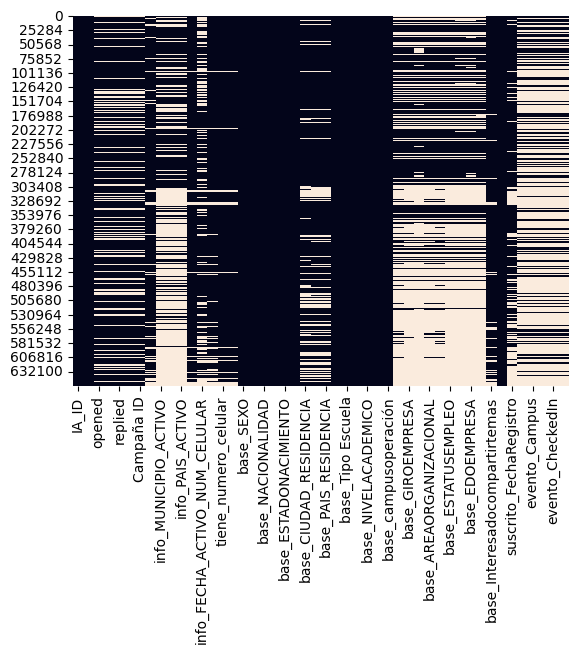

In [417]:
#Usaremos un mapa de calor para tenerlo más visual
sns.heatmap(df_unido.isnull(), cbar=False)
plt.show()

##**Respuesta:**
* Mostraremos los valores faltantes de la columnas que creemos importantes para el modelo

* Patrones: Se puede detectar que los egresados solo insertan información de un puesto de trabajo y empresa. Atributos como:
Nombre_Empresa2,3,4,5
Puesto2,3,4,5
Se encuentran vacíos por ello en el preprocesamiento se eliminaron



In [418]:
#Necesitaremos visualizar de una mejor manera la cantidad relativa de datos faltantes por ello se requiere ver el porcenaje
# Porcentaje de valores faltantes en cada columna
missing_data_percent = (df_unido.isnull().sum() / len(df_unido)) * 100
print("Porcentaje de valores faltantes en cada columna:\n", missing_data_percent)

Porcentaje de valores faltantes en cada columna:
 IA_ID                             0.000000
categoria_dominio_correo          0.000000
opened                           21.530678
clicked                          21.530678
replied                          21.530678
Correo de marketing ID           21.530678
Campaña ID                       21.530678
info_FECHA_MAIL_ACTIVO           10.232761
info_MUNICIPIO_ACTIVO            59.392670
info_ESTADO_ACTIVO               59.392670
info_PAIS_ACTIVO                 59.392670
info_FECHA_ACTIVO                 5.288202
info_FECHA_ACTIVO_NUM_CELULAR    33.895118
info_ESTADOCIVIL                 10.153354
tiene_numero_celular              5.288202
tiene_linkedin                    5.288202
base_SEXO                         0.001673
base_año nac                      0.001673
base_NACIONALIDAD                 0.001673
base_CIUDADNACIMIENTO             0.005324
base_ESTADONACIMIENTO             0.001673
base_exatec personalizado         0.001673
base

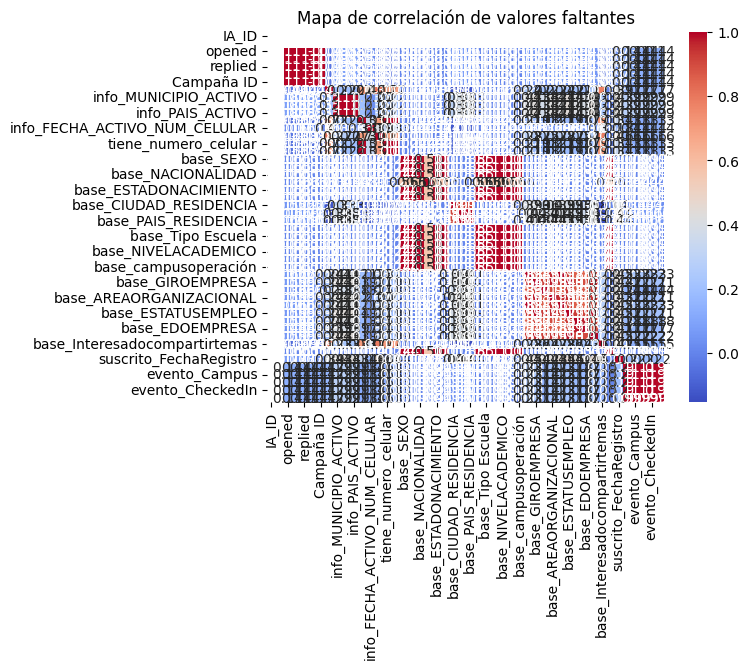

In [419]:
#También es importante revisar la correlación entre atributos, es decir, es comúno que si en una columna falta información en otra también
# Mapa de calor para visualizar la correlación entre valores faltantes
sns.heatmap(df_unido.isnull().corr(), annot=True, cmap='coolwarm')
plt.title("Mapa de correlación de valores faltantes")
plt.show()


In [420]:
#Al existir atributos con mucha información faltante, vemos conveniente hacer una clasificación de columnas según la cantidad de valores faltantes:
#Bajo porcentaje de valores faltantes (<5%)
#Medio (entre 5% y 30%)
#Alto (>30%)

# Clasificación de columnas según la cantidad de valores faltantes
missing_data_classification = pd.DataFrame({
    'Columnas': df_unido.columns,
    'Porcentaje de Faltantes': missing_data_percent
})

# Filtrar columnas según niveles de valores faltantes
bajo_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] < 5]
medio_faltantes = missing_data_classification[(missing_data_classification['Porcentaje de Faltantes'] >= 5) & (missing_data_classification['Porcentaje de Faltantes'] < 30)]
alto_faltantes = missing_data_classification[missing_data_classification['Porcentaje de Faltantes'] >= 30]

print("Columnas con bajo porcentaje de faltantes (<5%):\n", bajo_faltantes)
print("Columnas con porcentaje moderado de faltantes (5%-30%):\n", medio_faltantes)
print("Columnas con alto porcentaje de faltantes (>30%):\n", alto_faltantes)


Columnas con bajo porcentaje de faltantes (<5%):
                                             Columnas  Porcentaje de Faltantes
IA_ID                                          IA_ID                 0.000000
categoria_dominio_correo    categoria_dominio_correo                 0.000000
base_SEXO                                  base_SEXO                 0.001673
base_año nac                            base_año nac                 0.001673
base_NACIONALIDAD                  base_NACIONALIDAD                 0.001673
base_CIUDADNACIMIENTO          base_CIUDADNACIMIENTO                 0.005324
base_ESTADONACIMIENTO          base_ESTADONACIMIENTO                 0.001673
base_exatec personalizado  base_exatec personalizado                 0.001673
base_AñoGrad                            base_AñoGrad                 0.001673
base_Tipo Escuela                  base_Tipo Escuela                 0.001673
base_SIGLASDELPROGRAMA        base_SIGLASDELPROGRAMA                 0.001673
base_NIVELACAD

# **Pregunta 2: ¿Cuáles son las estadísticas resumidas del conjunto de datos?**



In [421]:
print(df_unido.describe(include='all'))  # Muestra estadísticas resumidas de todas las columnas

                IA_ID categoria_dominio_correo         opened        clicked  \
count   657369.000000                   657369  515833.000000  515833.000000   
unique            NaN                        3            NaN            NaN   
top               NaN                 Genérico            NaN            NaN   
freq              NaN                   389140            NaN            NaN   
mean    204864.700823                      NaN       1.692893       0.083616   
std     110003.723543                      NaN       1.387511       0.430149   
min          6.000000                      NaN       1.000000       0.000000   
25%     114531.000000                      NaN       1.000000       0.000000   
50%     203680.000000                      NaN       1.000000       0.000000   
75%     304266.000000                      NaN       2.000000       0.000000   
max     370520.000000                      NaN      30.000000      23.000000   

         replied  Correo de marketing I

In [422]:
#Calcular estadísticas avanzadas para variables numéricas

# Estadísticas avanzadas para las variables numéricas
numeric_stats = df_unido.describe().transpose()

# Calcular skewness (asimetría)
numeric_stats['Skewness'] = df_unido.select_dtypes(include=[np.number]).skew()

# Calcular el coeficiente de variación (CV = std/mean)
numeric_stats['Coeficiente de Variación'] = numeric_stats['std'] / numeric_stats['mean']

print(numeric_stats)



                           count          mean           std           min  \
IA_ID                   657369.0  2.048647e+05  1.100037e+05  6.000000e+00   
opened                  515833.0  1.692893e+00  1.387511e+00  1.000000e+00   
clicked                 515833.0  8.361621e-02  4.301490e-01  0.000000e+00   
replied                 515833.0  0.000000e+00  0.000000e+00  0.000000e+00   
Correo de marketing ID  515833.0  3.544821e+11  3.826323e+10  2.292888e+09   
tiene_numero_celular    622606.0  6.623033e-01  4.729249e-01  0.000000e+00   
tiene_linkedin          622606.0  2.158187e-02  1.453139e-01  0.000000e+00   
base_NIVELACADEMICO     657358.0  5.790393e+00  1.444296e+00  2.000000e+00   
HizoPrepaTec            657358.0  2.979929e-01  4.573767e-01  0.000000e+00   

                                 25%           50%           75%  \
IA_ID                   1.145310e+05  2.036800e+05  3.042660e+05   
opened                  1.000000e+00  1.000000e+00  2.000000e+00   
clicked        

## **Análisis:**

**Variables numéricas**
Las estadísticas resumidas para las variables numéricas fueron calculadas utilizando el método describe() de pandas, complementado con métricas avanzadas como skewness (asimetría) y el coeficiente de variación. Estas métricas nos permiten entender la distribución y variabilidad de las variables, y determinar si es necesario aplicar transformaciones adicionales para corregir distribuciones sesgadas.

**Observaciones**
* **opened**: Tiene un sesgo altamente positivo de 6.95, lo que indica que la mayoría de los valores son bajos. El coeficiente de variación es 0.75, lo cual sugiere una gran variación respecto a la media.
* **clicked**: Muestra un sesgo positivo aún mayor de 11.18, que nos dice que existe una una distribución muy asimétrica. El coeficiente de variación es 5.00, indicando que la mayoría de los registros no tienen clicks

**Variables categóricas**
Las estadísticas para las variables categóricas se calcularon con value_counts() y se presentaron como frecuencias relativas (% de cada categoría). Esto permitió identificar la proporción de cada categoría en relación con el total.

**Observaciones**
* **contactable_dominio_correo**: La mayoría de los correos pertenecen a dominios como gmail.com (43.94%), hotmail.com (16.09%) y tec.mx (11.48%). El resto se distribuye en más de 7,769 dominios diferentes.
* **contactable_estatus**: La mayoría de los registros están clasificados como Ciclo Anterior (92.46%), con solo el 7.53% en Ciclo Actual. Revisaremos con el egresados esto posiblemente es porque se encuentran en "inicio de ciclo".
* **base_SEXO**: Hay un mayor número de hombres (60.89%) que de mujeres (39.10%).
* **base_NACIONALIDAD**: Predominantemente Mexicana (95.91%), seguida por Colombiana (0.75%) y Ecuatoriana (0.59%). Las otras nacionalidades tienen una representación mínima.

**Identificación de patrones**
Se observó una alta concentración de valores en ciertos dominios de correo y en el estado de residencia (Nuevo León y Ciudad de México). Además, las variables relacionadas con premios y reconocimientos mostraron distribuciones sesgadas hacia premios recientes.

**Distribuciones sesgadas**: Las variables numéricas como opened y clicked presentaron un alto sesgo positivo. Aplicaremos transformaciones logarítmicas para las variables con sesgo positivo

**Siguientes pasos para tratamiento de datos**
Dado que algunas variables tienen alta dispersión y sesgo, aplicaremos algunas transformaciones como:
* **Transformación logarítmica**: Para variables como opened y clicked para reducir el sesgo positivo.

**Conclusión** El análisis estadístico ha permitido identificar características clave del conjunto de datos, como la existencia de distribuciones sesgadas, alta variabilidad en ciertas columnas y patrones de ausencia significativos. Las técnicas de visualización y métricas adicionales sugieren que se deben aplicar transformaciones y normalizaciones antes de proceder con un análisis más profundo.

# **Pregunta 3: ¿Hay valores atípicos en el conjunto de datos?**

Los valores atípicos son puntos de datos que se alejan significativamente del resto de las observaciones y pueden distorsionar análisis estadísticos, regresiones o modelos predictivos. Identificarlos nos ayudará a decidir si se deben eliminar, transformar o estudiar más a fondo.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


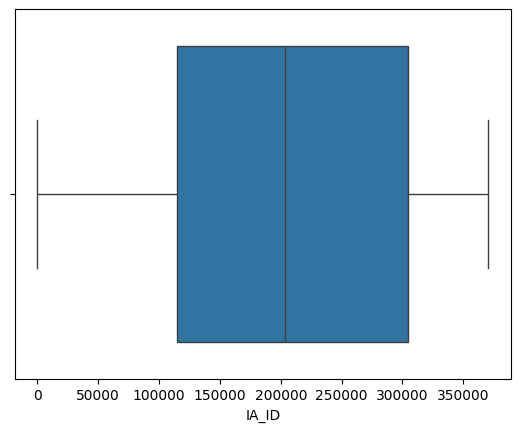

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


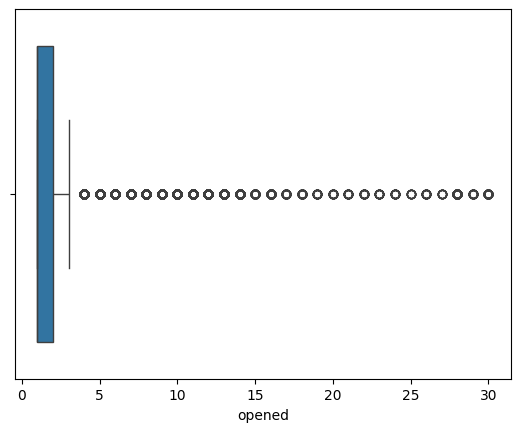

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


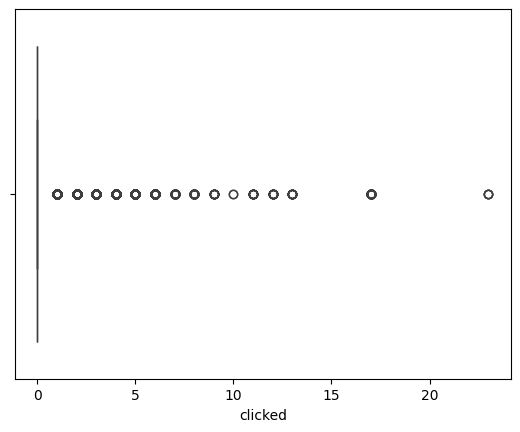

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


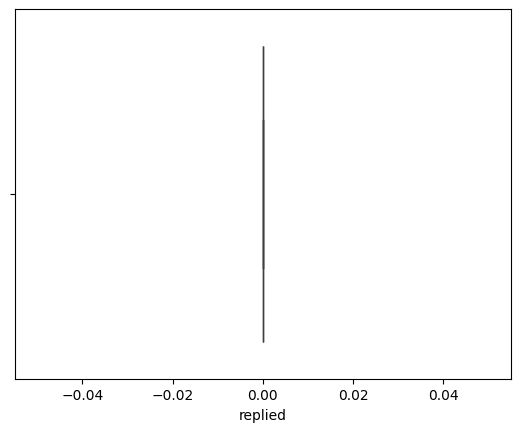

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


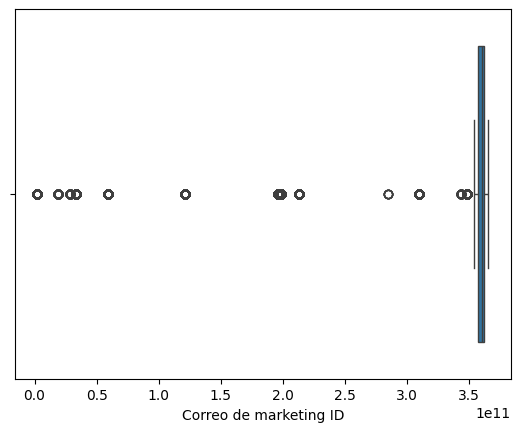

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


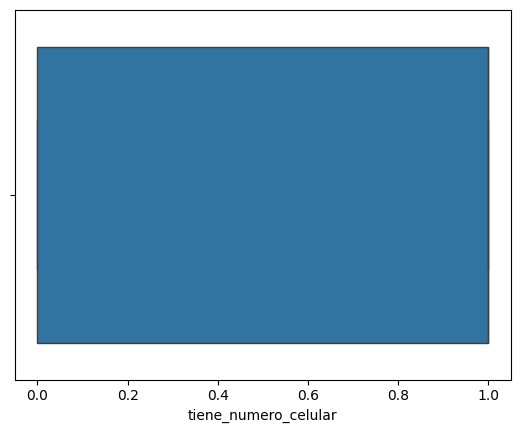

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


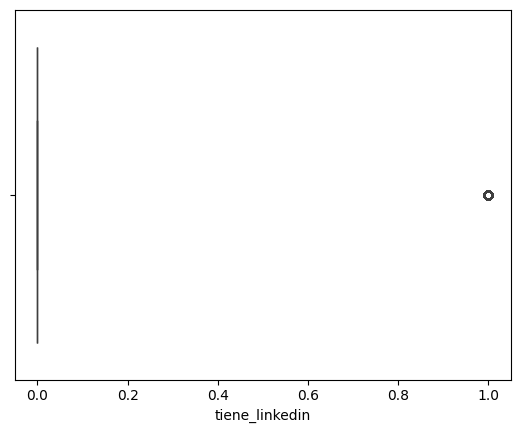

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


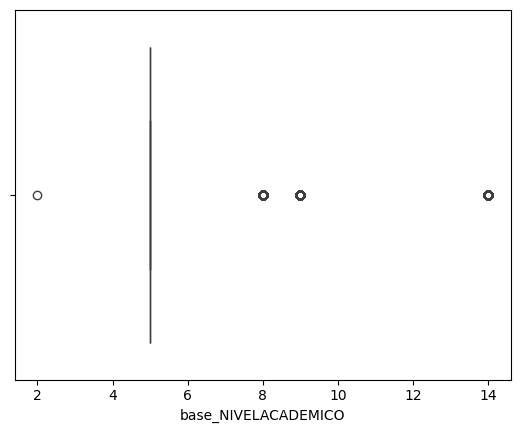

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


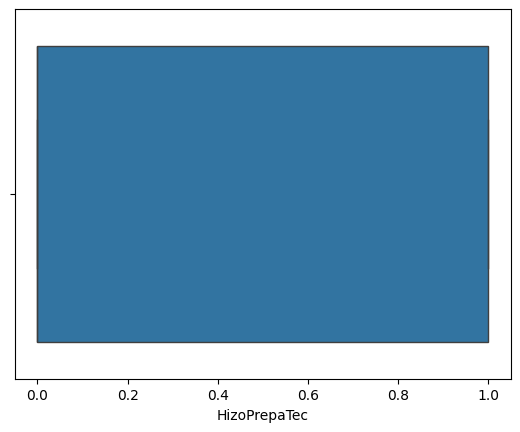

In [423]:
#Identificar valores atípicos con boxplots:

#for column in df_unido.select_dtypes(include=[np.number]).columns:
 #   sns.boxplot(x=df_unido[column])
  #  plt.show()

for column in df_unido.select_dtypes(include=[np.number]).columns:
    if not df_unido[column].empty:
        try:
            sns.boxplot(x=df_unido[column])
            plt.show()
        except ValueError:
            print(f"No se grafica la columna: {column} ya que no es un valor numérico o válido.")

In [424]:
# Seleccionar solo las columnas numéricas del DataFrame
df_unido_numeric = df_unido.select_dtypes(include=['number'])

# Calcular los cuartiles y el IQR solo para las columnas numéricas
Q1 = df_unido_numeric.quantile(0.25)
Q3 = df_unido_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos (outliers) en el DataFrame numérico
outliers = ((df_unido_numeric < (Q1 - 1.5 * IQR)) | (df_unido_numeric > (Q3 + 1.5 * IQR))).sum()

# Crear un resumen de outliers para cada columna
outlier_summary = pd.DataFrame({'Column': df_unido_numeric.columns, 'Outliers': outliers.values})

# Mostrar el resumen de valores atípicos usando display
print(outlier_summary)


                   Column  Outliers
0                   IA_ID         0
1                  opened     29130
2                 clicked     32057
3                 replied         0
4  Correo de marketing ID     13197
5    tiene_numero_celular         0
6          tiene_linkedin     13437
7     base_NIVELACADEMICO    163502
8            HizoPrepaTec         0


##**Respuesta**:

**Recomendaciones para el tratamiento de valores atípicos**
* Transformación usando logaritmos
* Imputación con la mediana o con valores calculados basados en otras variables para mantener la integridad del conjunto de datos

**Descripción de los métodos utilizados**

**Boxplot**: Nos ayudó a resaltar visualmente los valores atípicos como puntos fuera del rango esperado (por encima o debajo de los bigotes).

**IQR**: Cualquier valor por debajo de
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Q1−1.5×IQR o por encima de
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Q3+1.5×IQR se considera un valor atípico.

No todos nuestros datos numéricos son relevantes o requieren el uso de un box plot. Por ejemplo, los valores que representan ID son simplemente identificadores asignados y no aportan información estadística útil. Por otro lado, las variables binarias numéricas (1,0), aunque son números, representan en realidad variables categóricas transformadas.

**Conclusión de la pregunta:**
Para identificar los valores atípicos en el conjunto de datos, se realizaron dos análisis principales: un análisis visual con boxplots y un análisis estadístico utilizando el rango intercuartílico (IQR).

Se encontró que las columnas 'opened' y 'clicked' presentan un número significativo de valores atípicos, posiblemente debido a la distribución sesgada de estos valores. Estos valores podrían ser estudiados para determinar si se deben eliminar, transformar o mantener como casos especiales.

# **Pregunta 4: ¿Cuál es la cardinalidad de las variables categóricas?**



In [425]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_unido[col].nunique()} categorías")


categoria_dominio_correo: 3 categorías
Campaña ID: 11 categorías
info_FECHA_MAIL_ACTIVO: 5976 categorías
info_MUNICIPIO_ACTIVO: 566 categorías
info_ESTADO_ACTIVO: 146 categorías
info_PAIS_ACTIVO: 34 categorías
info_FECHA_ACTIVO: 8082 categorías
info_FECHA_ACTIVO_NUM_CELULAR: 6670 categorías
info_ESTADOCIVIL: 7 categorías
base_SEXO: 2 categorías
base_año nac: 156 categorías
base_NACIONALIDAD: 101 categorías
base_CIUDADNACIMIENTO: 3056 categorías
base_ESTADONACIMIENTO: 420 categorías
base_exatec personalizado: 3 categorías
base_CIUDAD_RESIDENCIA: 3627 categorías
base_ESTADO_RESIDENCIA: 357 categorías
base_PAIS_RESIDENCIA: 95 categorías
base_AñoGrad: 92 categorías
base_Tipo Escuela: 10 categorías
base_SIGLASDELPROGRAMA: 655 categorías
base_IDCAMPUS: 40 categorías
base_campusoperación: 37 categorías
base_NOMBREEMPRESA: 47802 categorías
base_GIROEMPRESA: 71 categorías
base_TIPOEMPRESA: 5 categorías
base_AREAORGANIZACIONAL: 33 categorías
base_PUESTO: 38065 categorías
base_ESTATUSEMPLEO: 3 ca

In [426]:
#df_unido.select_dtypes(include=['object']).nunique()
df_unido['info_FECHA_MAIL_ACTIVO']

0                      NaN
1                      NaN
2         15/03/2019 00:00
3                      NaN
4         06/05/2004 00:00
                ...       
657364    17/07/2020 00:00
657365    17/07/2020 00:00
657366    17/07/2020 00:00
657367    17/07/2020 00:00
657368    17/07/2020 00:00
Name: info_FECHA_MAIL_ACTIVO, Length: 657369, dtype: object

In [427]:
df_unido['suscrito_FechaRegistro']

0         10/09/2020 14:25
1                      NaN
2         10/09/2020 14:25
3                      NaN
4         30/06/2022 12:47
                ...       
657364    21/11/2022 20:05
657365    10/09/2020 14:25
657366    21/11/2022 20:05
657367    10/09/2020 14:25
657368    21/11/2022 20:05
Name: suscrito_FechaRegistro, Length: 657369, dtype: object

In [428]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y', errors='coerce')
#df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y', errors='coerce')
#df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y', errors='coerce')

df_unido['info_FECHA_MAIL_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_MAIL_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO'], format='%d/%m/%Y %H:%M')
df_unido['info_FECHA_ACTIVO_NUM_CELULAR'] = pd.to_datetime(df_unido['info_FECHA_ACTIVO_NUM_CELULAR'], format='%d/%m/%Y %H:%M')



In [429]:
df_unido['suscrito_FechaRegistro']

0         10/09/2020 14:25
1                      NaN
2         10/09/2020 14:25
3                      NaN
4         30/06/2022 12:47
                ...       
657364    21/11/2022 20:05
657365    10/09/2020 14:25
657366    21/11/2022 20:05
657367    10/09/2020 14:25
657368    21/11/2022 20:05
Name: suscrito_FechaRegistro, Length: 657369, dtype: object

In [430]:
df_unido['suscrito_FechaRegistro'] = pd.to_datetime(df_unido['suscrito_FechaRegistro'], format='%d/%m/%Y %H:%M')

In [431]:
df_unido['suscrito_FechaRegistro']

0        2020-09-10 14:25:00
1                        NaT
2        2020-09-10 14:25:00
3                        NaT
4        2022-06-30 12:47:00
                 ...        
657364   2022-11-21 20:05:00
657365   2020-09-10 14:25:00
657366   2022-11-21 20:05:00
657367   2020-09-10 14:25:00
657368   2022-11-21 20:05:00
Name: suscrito_FechaRegistro, Length: 657369, dtype: datetime64[ns]

In [432]:
#Obtener el número de categorías únicas en las columnas categóricas
for col in df_unido.select_dtypes(include=['object']).columns:
    print(f"{col}: {df_unido[col].nunique()} categorías")


categoria_dominio_correo: 3 categorías
Campaña ID: 11 categorías
info_MUNICIPIO_ACTIVO: 566 categorías
info_ESTADO_ACTIVO: 146 categorías
info_PAIS_ACTIVO: 34 categorías
info_ESTADOCIVIL: 7 categorías
base_SEXO: 2 categorías
base_año nac: 156 categorías
base_NACIONALIDAD: 101 categorías
base_CIUDADNACIMIENTO: 3056 categorías
base_ESTADONACIMIENTO: 420 categorías
base_exatec personalizado: 3 categorías
base_CIUDAD_RESIDENCIA: 3627 categorías
base_ESTADO_RESIDENCIA: 357 categorías
base_PAIS_RESIDENCIA: 95 categorías
base_AñoGrad: 92 categorías
base_Tipo Escuela: 10 categorías
base_SIGLASDELPROGRAMA: 655 categorías
base_IDCAMPUS: 40 categorías
base_campusoperación: 37 categorías
base_NOMBREEMPRESA: 47802 categorías
base_GIROEMPRESA: 71 categorías
base_TIPOEMPRESA: 5 categorías
base_AREAORGANIZACIONAL: 33 categorías
base_PUESTO: 38065 categorías
base_ESTATUSEMPLEO: 3 categorías
base_CDEMPRESA: 4065 categorías
base_EDOEMPRESA: 34 categorías
base_PAISEMPRESA: 107 categorías
base_Interesadoco

## **Análisis**:
Esta pregunta nos ayuda a revisar los catálogos que existen

In [433]:
#En este código trataremos de hacer más visual la información de los catálogos

# Crear una lista para almacenar los resultados
resultados = []

# Obtener los valores únicos de cada columna categórica
for col in df_unido.select_dtypes(include=['object']).columns:
    valores_unicos = df_unido[col].unique()
    num_valores = len(valores_unicos)

    # Si hay más de 10 valores únicos, mostrar solo los primeros 10
   #if num_valores > 10:
        #valores_mostrados = ", ".join(map(str, valores_unicos[:10])) + "..."
    #else:
    valores_mostrados = ", ".join(map(str, valores_unicos))

    # Agregar la columna, cantidad de categorías y los valores únicos (limitados a 10 si es el caso)
    resultados.append([col, num_valores, valores_mostrados])

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados, columns=['Columna', 'Número de Categorías', 'Valores Únicos (primeros 10)'])

# Mostrar la tabla resultante
from IPython.display import display
display(df_resultados)


Columna  Número de Categorías  \
0        categoria_dominio_correo                     3   
1                      Campaña ID                    12   
2           info_MUNICIPIO_ACTIVO                   567   
3              info_ESTADO_ACTIVO                   147   
4                info_PAIS_ACTIVO                    35   
5                info_ESTADOCIVIL                     8   
6                       base_SEXO                     3   
7                    base_año nac                   157   
8               base_NACIONALIDAD                   102   
9           base_CIUDADNACIMIENTO                  3057   
10          base_ESTADONACIMIENTO                   421   
11      base_exatec personalizado                     4   
12         base_CIUDAD_RESIDENCIA                  3628   
13         base_ESTADO_RESIDENCIA                   358   
14           base_PAIS_RESIDENCIA                    96   
15                   base_AñoGrad                    93   
16              base_Tipo Escuela                    11   
17         base_SIGLASDELPROGRAMA                   656   
18                  base_IDCAMPUS                    41   
19           base_campusoperación                    38   
20             base_NOMBREEMPRESA                 47803   
21               base_GIROEMPRESA                    72   
22               base_TIPOEMPRESA                     6   
23        base_AREAORGANIZACIONAL                    34   
24                    base_PUESTO                 38066   
25             base_ESTATUSEMPLEO                     4   
26                 base_CDEMPRESA                  4066   
27                base_EDOEMPRESA                    35   
28               base_PAISEMPRESA                   108   
29  base_Interesadocompartirtemas                     4   
30               evento_EventName                   845   
31                  evento_Campus                    42   
32                evento_Category                    15   
33               evento_CheckedIn                     3   
34          evento_attendeeStatus                     7   

                         Valores Únicos (primeros 10)  
0                          Educativo, Genérico, Otros  
1   nan, 10949903422, 2.06465E+11, 19343712904, 23...  
2   nan, Monterrey, San Pedro Garza García, Coacoa...  
3   nan, Nuevo León, Veracruz, Michoacán de Ocampo...  
4   nan, México, Venezuela, Honduras, Estados Unid...  
5   Soltero, nan, Casado, Desconocido, Unión Libre...  
6                            Masculino, nan, Femenino  
7   1928, 1931, 1930, 1929, 1932, 1938, 1937, 1934...  
8   Mexicana, Indefinido, Indefinida, nan, Estadou...  
9   México, Indefinido, Monterrey, Torreón, Mexica...  
10  Ciudad de México,  , Sinaloa, Nuevo León, Inde...  
11                            No, Sin correo, Sí, nan  
12  nan, Santiago, Los Mochis, Monterrey, San Pedr...  
13  nan, Santiago, Sinaloa, Nuevo León, Ciudad de ...  
14  nan, República Dominicana, México, Estados Uni...  
15  1953, 1955, 1954, 1952, 1960, 1959, 1978, 1958...  
16  Ingeniería y Ciencias, Arquitectura y Diseño, ...  
17  IME, ARQ, IA, IC, IM, CP, LN, MA, LF, LM, IMA,...  
18  A, Q, nan, AA, H, E, R, C, 1, W, G, S, 2, M, N...  
19  Monterrey, Ciudad de México, nan, EGADE, Tampi...  
20  nan, Empresas Longoria, S.A. de C.V., Trabajo ...  
21  nan, Agrícola, Consultoría, De Servicios, Alim...  
22  nan, Mexicana, Transnacional en México, Extran...  
23  nan, Administración general, Consultoría, Prod...  
24  nan, Director de Finanzas, Consultor, Director...  
25                                       nan, A, I,    
26  nan,            MORELIA,CD MEXICO  , Monterrey...  
27  nan, Michoacán, Nuevo León, Durango, Chihuahua...  
28  nan, México, Estados Unidos de América, Venezu...  
29                                      , nan, No, Sí  
30  nan, Dejando Huella Campus Monterrey, Visitas ...  
31  nan, TEC Campus Monterrey, TEC Campus Ciudad d...  
32  nan, Egresados - iniciativa de Participación_ ...

## **Análisis**

Existen atributos con más de 100 categorías, esto puede afectar el rendimiento del modelo o dificultar su interpretación.

Para estas columnas evaluaremos la opción de agrupar categorías similares o reducir la cardinalidad mediante técnicas como el one-hot encoding limitado o target encoding

**Transformaciones**
Existen columnas categóricas con cardinalidad muy baja (por ejemplo, columnas binarias o con tres categorías como base_HizoPrepaTec), se aplicarán técnicas como el label encoding en lugar de one-hot encoding para simplificar la codificación y evitar la explosión de variables dummy


# **Pregunta 5: ¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?**


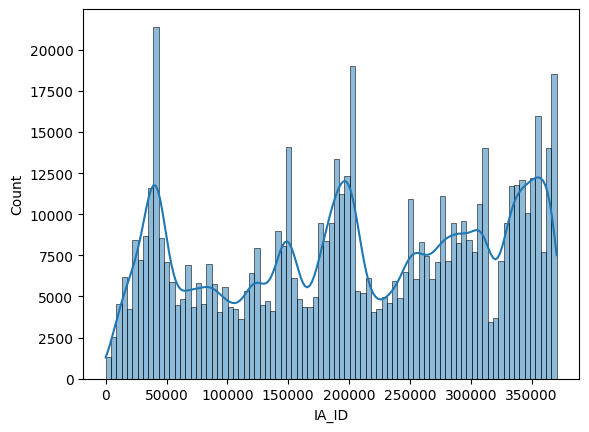

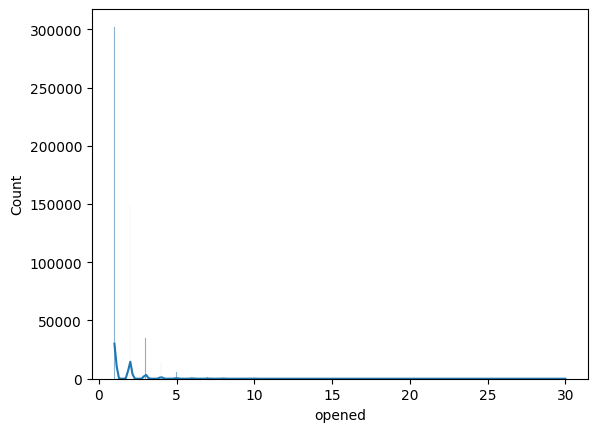

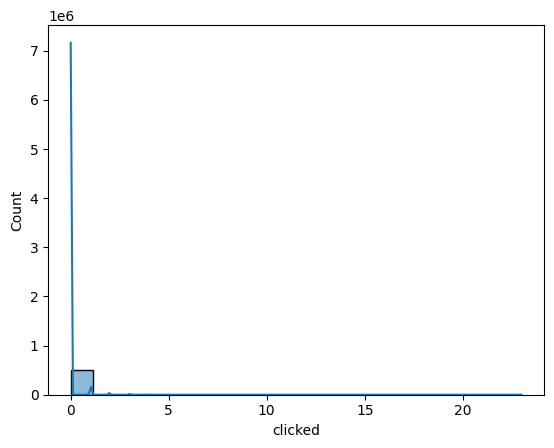

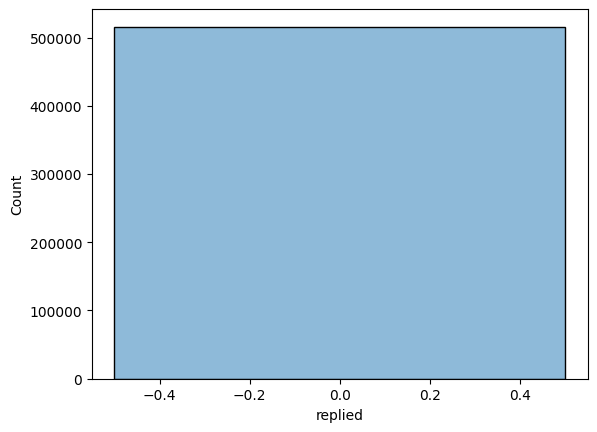

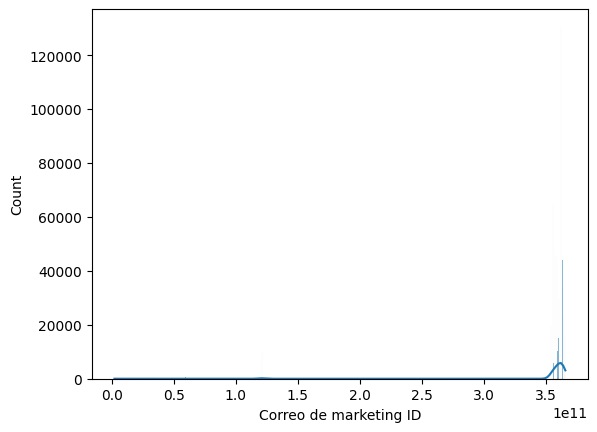

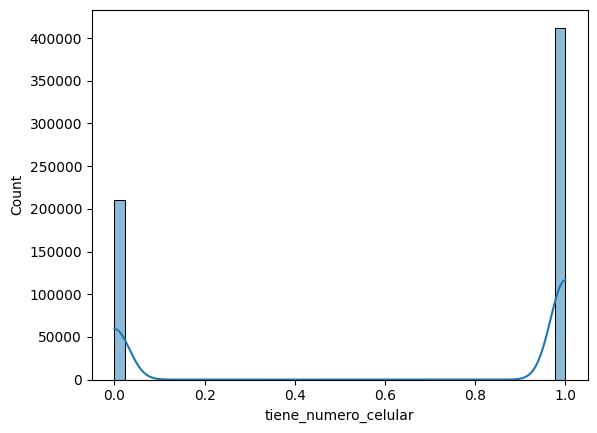

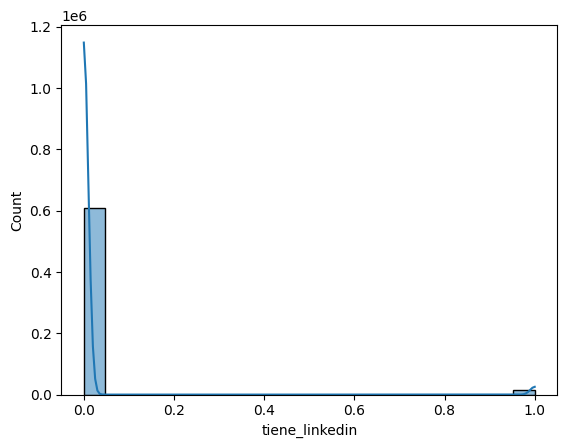

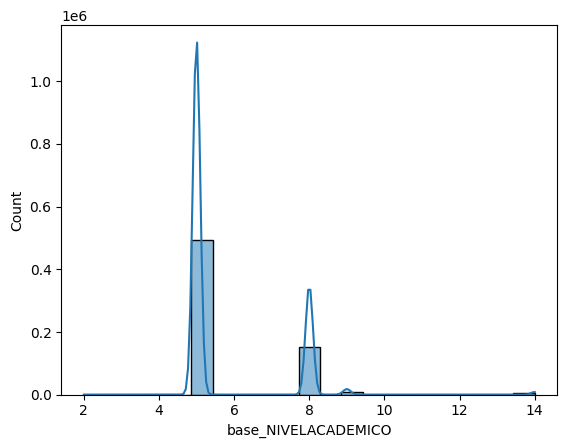

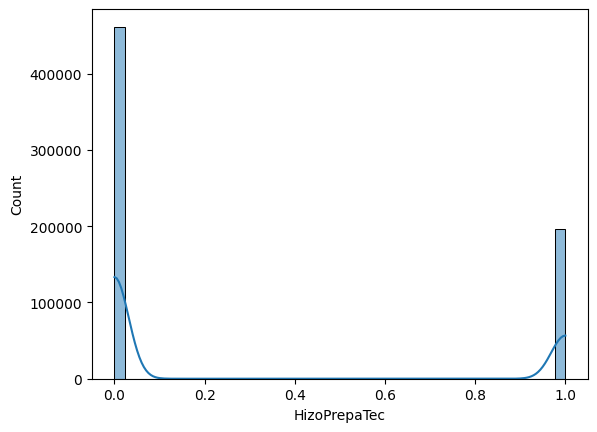

In [434]:
#Visualizar distribuciones: histogramas para ver la distribución de cada columna.
for column in df_unido.select_dtypes(include=[np.number]).columns:
    sns.histplot(df_unido[column], kde=True)
    plt.show()


Análisis pasa saber si hay sesgos y aplicar transformaciones

In [435]:
#Revisaremos si existen sesgos numéricos
for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = df_unido[column].skew()
    print(f"Skewness de {column}: {skewness}")

#el valor de skewness ayudará a definir rápidamente el sesgo
#Cercano a 0: La distribución podría tomarse como simétrica.
#Mayor a 0.5: Existe un sesgo positivo (derecha).
#Menor a -0.5: Existe un sesgo negativo (izquierda).

Skewness de IA_ID: -0.17695785769389757
Skewness de opened: 6.900244414721939
Skewness de clicked: 14.463819262312317
Skewness de replied: 0.0
Skewness de Correo de marketing ID: -6.394996256740343
Skewness de tiene_numero_celular: -0.6863829452184866
Skewness de tiene_linkedin: 6.584638236217407
Skewness de base_NIVELACADEMICO: 1.8300337508669315
Skewness de HizoPrepaTec: 0.8833320241325768


In [436]:
from scipy.stats import skew, kurtosis

for column in df_unido.select_dtypes(include=[np.number]).columns:
    skewness = skew(df_unido[column].dropna())  # Calcular asimetría
    kurt = kurtosis(df_unido[column].dropna())  # Calcular curtosis
    print(f"Variable: {column}, Asimetría (Skewness): {skewness:.2f}, Curtosis: {kurt:.2f}")


Variable: IA_ID, Asimetría (Skewness): -0.18, Curtosis: -1.22
Variable: opened, Asimetría (Skewness): 6.90, Curtosis: 92.06
Variable: clicked, Asimetría (Skewness): 14.46, Curtosis: 422.96
Variable: replied, Asimetría (Skewness): nan, Curtosis: nan
Variable: Correo de marketing ID, Asimetría (Skewness): -6.39, Curtosis: 40.44
Variable: tiene_numero_celular, Asimetría (Skewness): -0.69, Curtosis: -1.53
Variable: tiene_linkedin, Asimetría (Skewness): 6.58, Curtosis: 41.36
Variable: base_NIVELACADEMICO, Asimetría (Skewness): 1.83, Curtosis: 4.28
Variable: HizoPrepaTec, Asimetría (Skewness): 0.88, Curtosis: -1.22


**Análisis de resultado**

Variables con sesgo positivo significativo:
*   opened (6.95)
*   clicked (11.17)
*   Contacto ID (2.58)
*   base_NIVELACADEMICO (1.97)

**¿Qué transformación aplicar?**: transformación logarítmica o raíz cuadrada. Esto ayudará a normalizar las distribuciones


In [437]:
#Transformación logarítmica para sesgo positivo (valores mayores a 0)
#df_unido['opened_log'] = np.log1p(df_unido['opened'])  # Log(1 + x)
#df_unido['clicked_log'] = np.log1p(df_unido['clicked'])
#df_unido['Contacto_ID_log'] = np.log1p(df_unido['Contacto ID'])
#df_unido['base_NIVELACADEMICO_log'] = np.log1p(df_unido['base_NIVELACADEMICO'])


In [438]:
#Transformación Yeo-Johnson para sesgo negativo
#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='yeo-johnson')
#df_unido['Correo_marketing_ID_trans'] = pt.fit_transform(df_unido[['Correo de marketing ID']])
#df_unido['info_FECHA_PREMIO1_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO1']])
#df_unido['info_FECHA_PREMIO2_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO2']])
#df_unido['info_FECHA_PREMIO3_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO3']])
#df_unido['info_FECHA_PREMIO4_trans'] = pt.fit_transform(df_unido[['info_FECHA_PREMIO4']])

#El sesgo no se dará en las fechas por el tipo de dato


Asimetría o skewness:
* Positivo (> 1): Distribución sesgada a la derecha.
* Negativo (< -1): Distribución sesgada a la izquierda.
* Entre -1 y 1: Distribución aproximadamente simétrica.

Curtosis:
* Valor alto (>3): Distribución con colas más pesadas de lo normal (leptocúrtica).
* Valor bajo (<3): Distribución con colas más ligeras de lo normal (platicúrtica).

##**Análisis**

El análisis de la distribución de las variables numéricas utilizando las métricas de asimetría (skewness) y curtosis nos dió luz para saber que muchas de las variables en el conjunto de datos presentan distribuciones sesgadas, por lo que es necesario aplicar transformaciones no lineales en ciertos casos para mejorar la calidad del análisis y la efectividad de los futuros modelos predictivos. A continuación se presenta un resumen de los hallazgos:

**Análisis de la asimetría- skewness**

Asimetría positiva: La mayoría de las variables presentan un alto grado de asimetría positiva (valores superiores a 1), lo cual indica que las distribuciones están sesgadas hacia la derecha, con pocos valores extremos en el lado superior:
* opened: Asimetría de 6.95.
* clicked: Asimetría de 11.18.

**Análisis de la curtosis**
La curtosis permite identificar la presencia de colas largas o pesadas en la distribución.
Una curtosis muy alta (> 3) indica que la variable tiene colas más pesadas de lo normal (leptocúrtica), mientras que una curtosis baja (< 3) indica colas más ligeras (platicúrtica).

Variables con curtosis alta:
* opened: Curtosis de 100.19.
* clicked: Curtosis de 276.56.

Estas variables tienen distribuciones con valores extremos que se desvían significativamente de la media, lo que puede afectar el desempeño de los modelos de aprendizaje automático.


**Conclusión**
La mayoría de las variables numéricas presentan distribuciones altamente sesgadas y con curtosis elevada. Aplicaremos transformaciones no lineales como el logaritmo y Box-Cox antes de proceder con la fase de modelado.
Estas transformaciones ayudarán a estabilizar la varianza, reducir la asimetría y mejorar la capacidad de los algoritmos para detectar patrones en el conjunto de datos.

# **Pregunta 6: ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo)**


<ipython-input-439-d7138dea087a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend


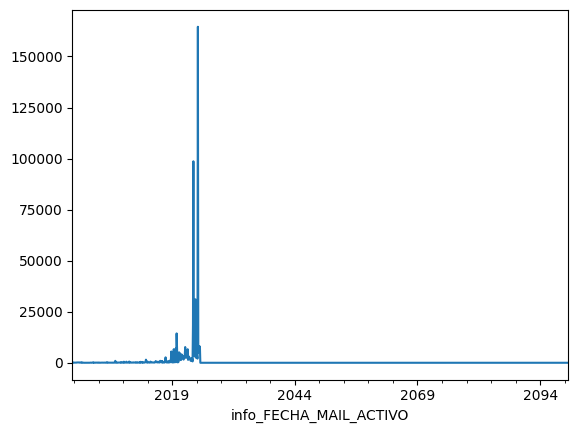

In [439]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
plt.show()


In [440]:
df_unido[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-12-01']

IA_ID categoria_dominio_correo  opened  clicked  replied  \
52704  38662                 Genérico     2.0      0.0      0.0   
52705  38662                 Genérico     1.0      0.0      0.0   
52706  38662                 Genérico     1.0      1.0      0.0   
52707  38662                 Genérico     1.0      0.0      0.0   
52708  38662                 Genérico     1.0      0.0      0.0   

       Correo de marketing ID   Campaña ID info_FECHA_MAIL_ACTIVO  \
52704            3.592480e+11  10949903422             2099-10-15   
52705            3.622020e+11  10949903422             2099-10-15   
52706            3.559530e+11  10949903422             2099-10-15   
52707            3.603660e+11  10949903422             2099-10-15   
52708            3.633040e+11  10949903422             2099-10-15   

      info_MUNICIPIO_ACTIVO info_ESTADO_ACTIVO  ...   base_EDOEMPRESA  \
52704             Monterrey         Nuevo León  ...  Estado de México   
52705             Monterrey         Nuevo León  ...  Estado de México   
52706             Monterrey         Nuevo León  ...  Estado de México   
52707             Monterrey         Nuevo León  ...  Estado de México   
52708             Monterrey         Nuevo León  ...  Estado de México   

      base_PAISEMPRESA base_Interesadocompartirtemas HizoPrepaTec  \
52704           México                                        0.0   
52705           México                                        0.0   
52706           México                                        0.0   
52707           México                                        0.0   
52708           México                                        0.0   

       suscrito_FechaRegistro  evento_EventName evento_Campus evento_Category  \
52704     2020-09-10 14:25:00               NaN           NaN             NaN   
52705     2020-09-10 14:25:00               NaN           NaN             NaN   
52706     2020-09-10 14:25:00               NaN           NaN             NaN   
52707     2020-09-10 14:25:00               NaN           NaN             NaN   
52708     2020-09-10 14:25:00               NaN           NaN             NaN   

      evento_CheckedIn evento_attendeeStatus  
52704              NaN                   NaN  
52705              NaN                   NaN  
52706              NaN                   NaN  
52707              NaN                   NaN  
52708              NaN                   NaN  

[5 rows x 48 columns]

**Preprocesamiento:**

Identificamos que en la columna 'info_FECHA_MAIL_ACTIVO' de la gráfica existían valores con fechas posteriores a la actual. Por ello, realizamos una limpieza para eliminar las incongruencias y establecer esos valores como nulos.

In [441]:
#df_unido2 = df_unido
df_unido.loc[df_unido['info_FECHA_MAIL_ACTIVO'] > '2024-10-01', 'info_FECHA_MAIL_ACTIVO'] = pd.NaT


<ipython-input-442-d7138dea087a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend


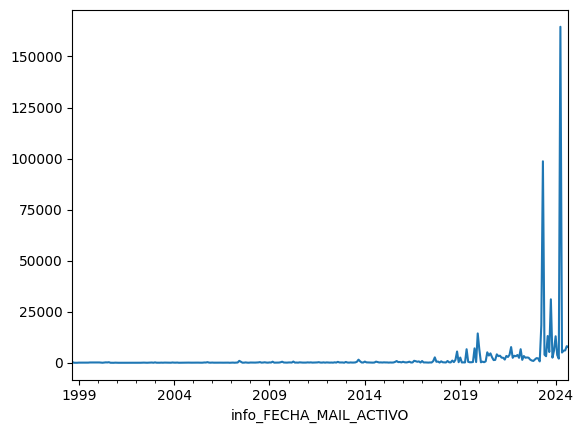

In [442]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_FECHAGRADUACION'] = pd.to_datetime(df_unido['base_FECHAGRADUACION'], format='%d/%m/%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_MAIL_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
plt.show()


<ipython-input-443-96bccb88fa8b>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_unido.set_index('info_FECHA_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend


<Axes: xlabel='info_FECHA_ACTIVO'>

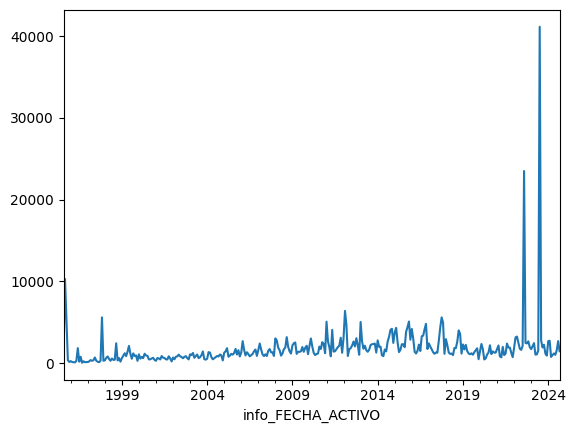

In [443]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'],format='%Y', errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
#plt.show()

<ipython-input-444-34f711d56a25>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_unido.set_index('info_FECHA_ACTIVO_NUM_CELULAR').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend


<Axes: xlabel='info_FECHA_ACTIVO_NUM_CELULAR'>

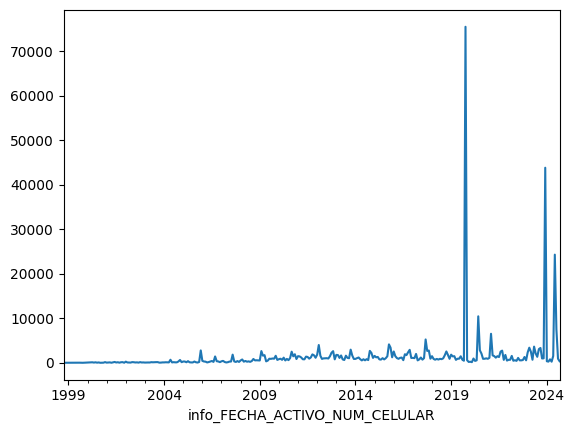

In [444]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'], errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('info_FECHA_ACTIVO_NUM_CELULAR').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
#plt.show()

<ipython-input-445-f38bccd0f777>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_unido.set_index('suscrito_FechaRegistro').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend


<Axes: xlabel='suscrito_FechaRegistro'>

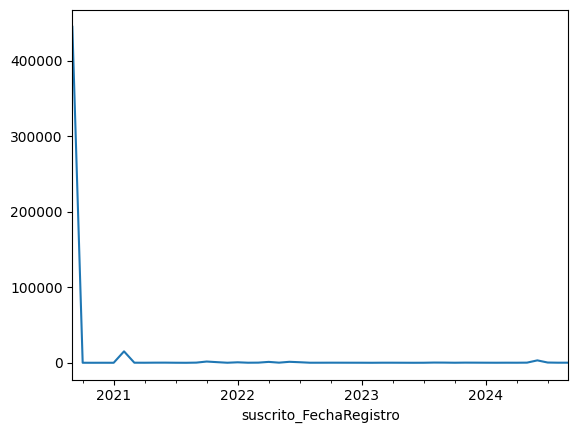

In [445]:
#convertir las columnas de tiempo en tipo datetime
#df_unido['base_AñoGrad'] = pd.to_datetime(df_unido['base_AñoGrad'], errors='coerce')
#Visualizar tendencias temporales usando gráficos de líneas para ver tendencias a lo largo del tiempo.
df_unido.set_index('suscrito_FechaRegistro').resample('M').count()['IA_ID'].plot() # Select the 'IA_ID' column after resampling and count to plot the trend
#plt.show()

**Análisis**

Las gráficas nos permitieron identificar valores atípicos, como en el caso de la columna 'info_FECHA_MAIL_ACTIVO', donde realizamos la limpieza de datos correspondiente. Además, verificamos la coherencia de los gráficos con la definición de cada columna, y los picos de actividad coinciden con las campañas que ha llevado a cabo el área de egresados.

#Generar catálogo de variables y su definición

# **Pregunta 7: ¿Hay correlación entre las variables dependientes e independientes?**

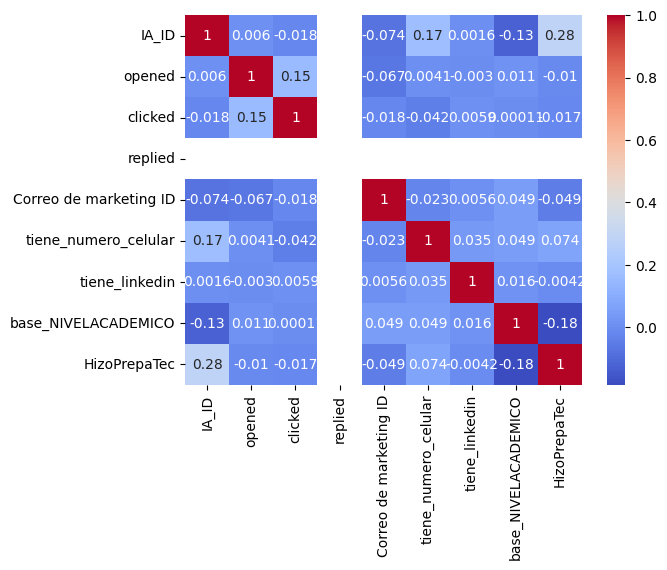

In [446]:
#Matriz de correlación
corr_matrix = df_unido.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [447]:
df_unido['replied']

0         NaN
1         0.0
2         0.0
3         NaN
4         NaN
         ... 
657364    NaN
657365    NaN
657366    NaN
657367    NaN
657368    NaN
Name: replied, Length: 657369, dtype: float64

**Análisis**

**IA_ID y HizoPrepaTec:** Tienen una correlación positiva moderada de 0.28, lo que sugiere que, en cierta medida, los usuarios con este ID pueden estar relacionados con haber hecho Prepa Tec.

**Clicked y Opened: **La correlación entre estas variables es de 0.15, lo que indica que existe una leve tendencia de que los usuarios que abren el correo tienden a hacer clic en él, aunque no es una relación particularmente fuerte.

**Correo de Marketing ID y base_NIVELACADEMICO:** La correlación es baja, alrededor de 0.049, lo que indica que prácticamente no hay relación entre estas dos variables.

**Ciclo Numerico y tiene_numero_celular: **Presentan una correlación de 0.17, lo cual es una relación positiva leve.
Un ejemplo claro es que en el ciclo anterior se hizo la campaña de actualización de datos por ello estas variables tienen una relación.


**Variables con baja correlación:**

La mayoría de las variables tienen correlaciones cercanas a 0, lo que sugiere que no tienen una relación lineal clara. Esto incluye variables como:

**IA_ID y opened: **Correlación muy baja (-0.006), lo que indica que no hay relación entre el ID y si se abrió el correo.

**Tiene_numero_celular y tiene_linkedin:** Presentan una correlación casi nula (0.035), lo que implica que tener un número de celular no está relacionado con tener un perfil en LinkedIn.


**Preprocesamiento**

 Observamos que la variable replied parece no tener correlación con ninguna otra variable, lo que probablemente indica falta de datos o que no se registraron suficientes respuestas como para establecer una relación. Por esta razón hemos obtado por eliminar la variable.

 Lo anterior es congruente, ya que al analizar la columna, observamos que mide el número de respuestas, y los correos fueron enviados desde una cuenta 'Noreply', lo que explica la ausencia de respuestas. Por ello, tomamos la decisión de eliminar la columna 'Replied' del DataFrame.




In [448]:
#Eliminación de variables
columnas_a_eliminar = ['replied']
df_unido = df_unido.drop(columns=columnas_a_eliminar)

# Forzar la recolección de basura
gc.collect()

198720

# **Pregunta 8: ¿Cómo se distribuyen los datos en función de diferentes categorías?**

In [449]:
# Encontrar las columnas categóricas (de tipo 'object')
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las columnas categóricas
print("Columnas categóricas en df_unido:")
for col in categorical_columns:
    print(col)

Columnas categóricas en df_unido:
categoria_dominio_correo
Campaña ID
info_MUNICIPIO_ACTIVO
info_ESTADO_ACTIVO
info_PAIS_ACTIVO
info_ESTADOCIVIL
base_SEXO
base_año nac
base_NACIONALIDAD
base_CIUDADNACIMIENTO
base_ESTADONACIMIENTO
base_exatec personalizado
base_CIUDAD_RESIDENCIA
base_ESTADO_RESIDENCIA
base_PAIS_RESIDENCIA
base_AñoGrad
base_Tipo Escuela
base_SIGLASDELPROGRAMA
base_IDCAMPUS
base_campusoperación
base_NOMBREEMPRESA
base_GIROEMPRESA
base_TIPOEMPRESA
base_AREAORGANIZACIONAL
base_PUESTO
base_ESTATUSEMPLEO
base_CDEMPRESA
base_EDOEMPRESA
base_PAISEMPRESA
base_Interesadocompartirtemas
evento_EventName
evento_Campus
evento_Category
evento_CheckedIn
evento_attendeeStatus


   IA_ID categoria_dominio_correo  opened  clicked  Correo de marketing ID  \
0      6                Educativo     NaN      NaN                     NaN   
1     21                 Genérico     2.0      0.0            3.622020e+11   
2     48                    Otros     4.0      0.0            3.633040e+11   
3     63                    Otros     NaN      NaN                     NaN   
4    106                 Genérico     NaN      NaN                     NaN   

    Campaña ID info_FECHA_MAIL_ACTIVO info_MUNICIPIO_ACTIVO  \
0          NaN                    NaT                   NaN   
1  10949903422                    NaT                   NaN   
2  10949903422             2019-03-15                   NaN   
3          NaN                    NaT                   NaN   
4          NaN             2004-05-06                   NaN   

  info_ESTADO_ACTIVO info_PAIS_ACTIVO  ... base_EDOEMPRESA base_PAISEMPRESA  \
0                NaN              NaN  ...             NaN              N

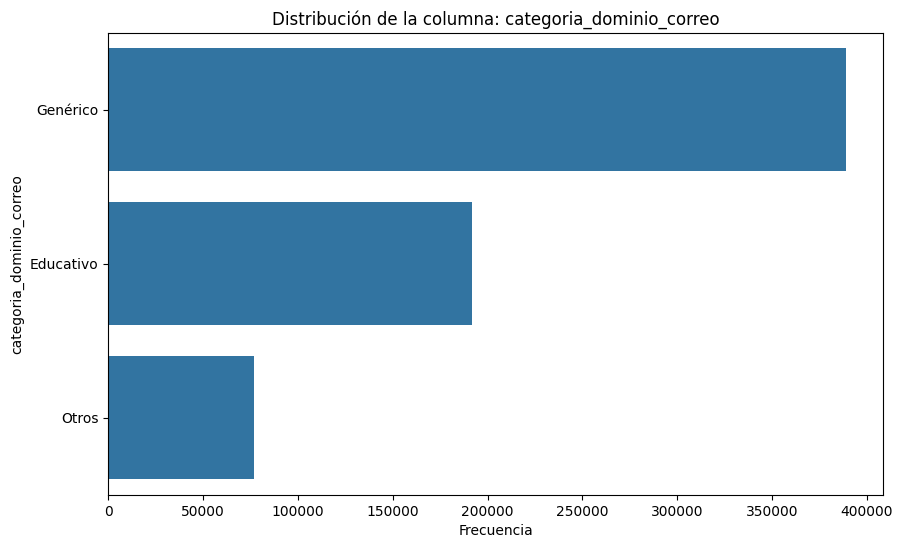

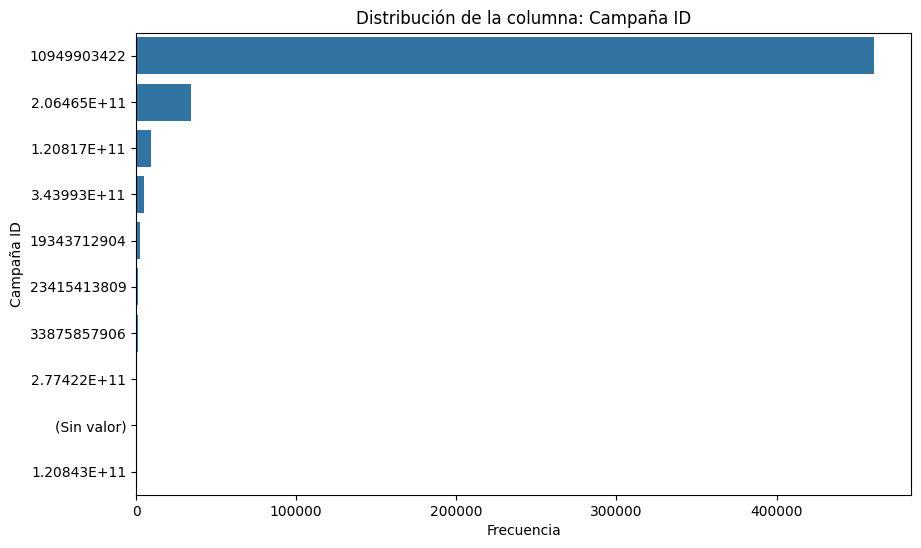

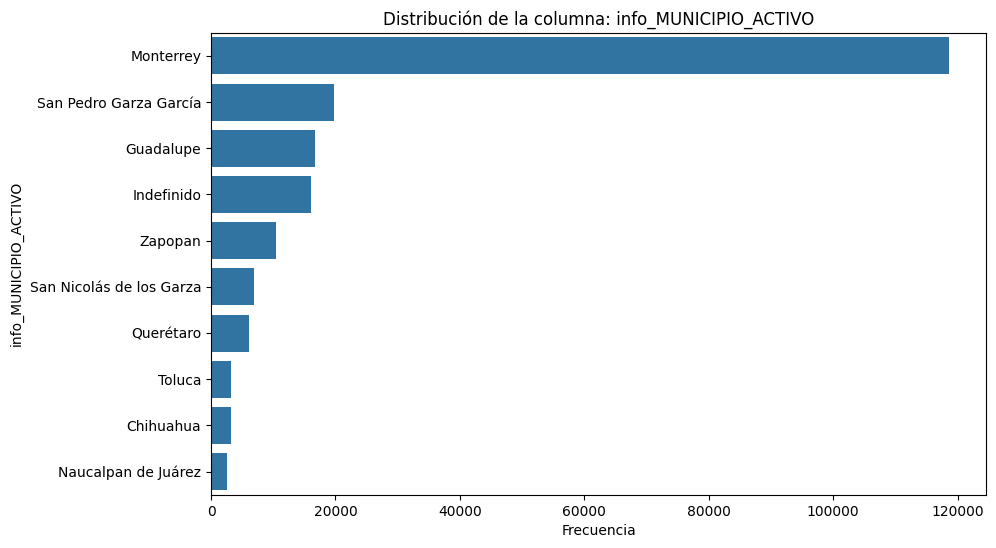

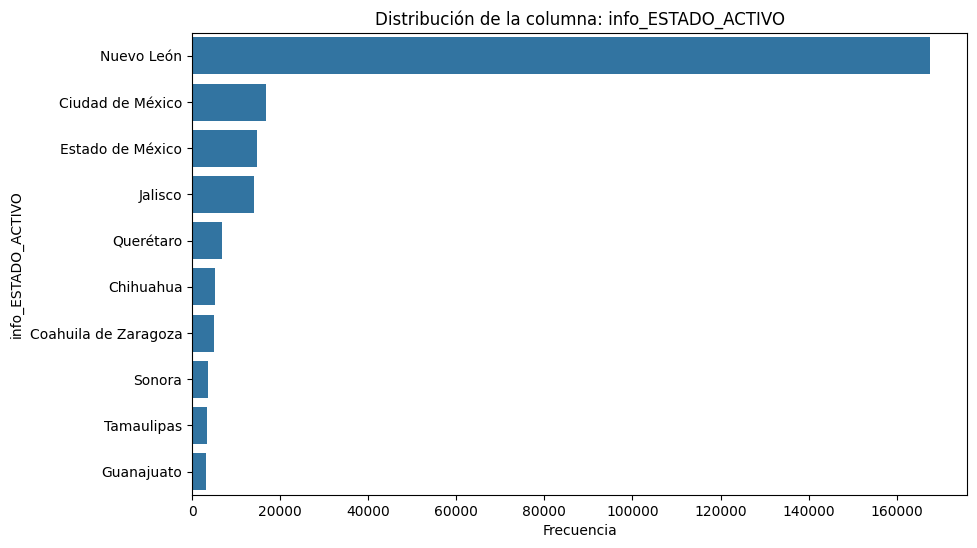

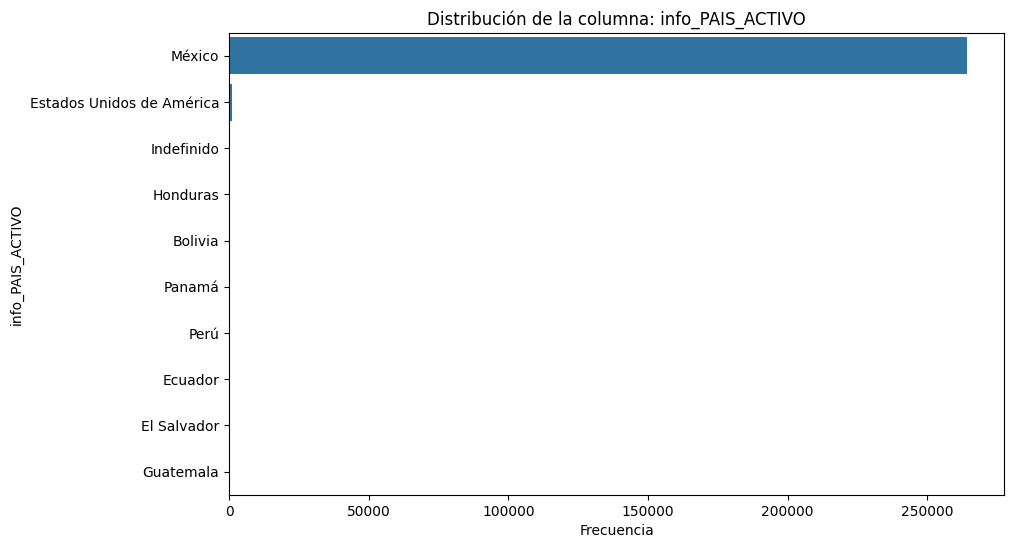

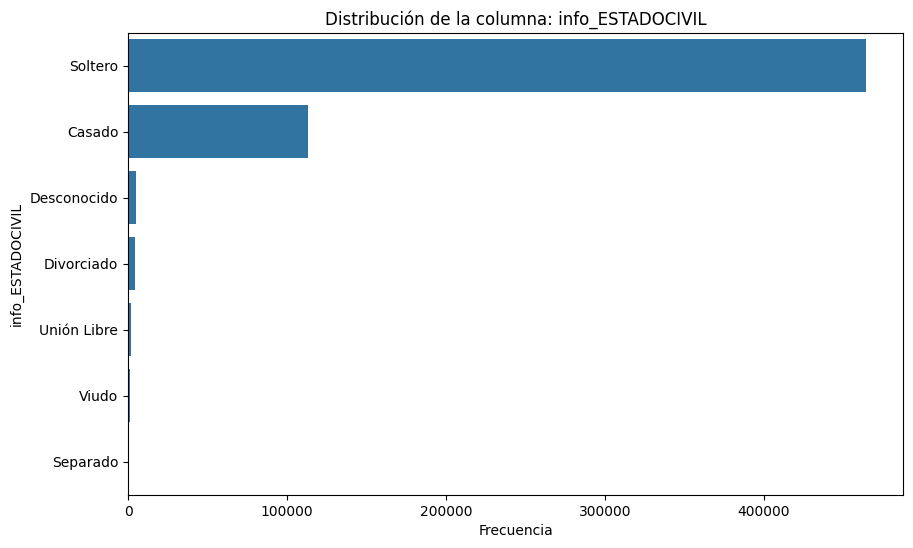

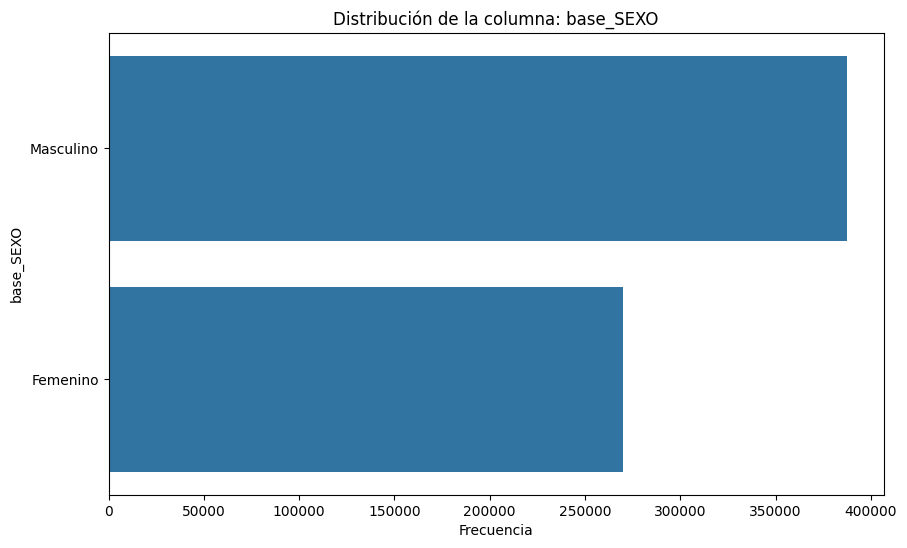

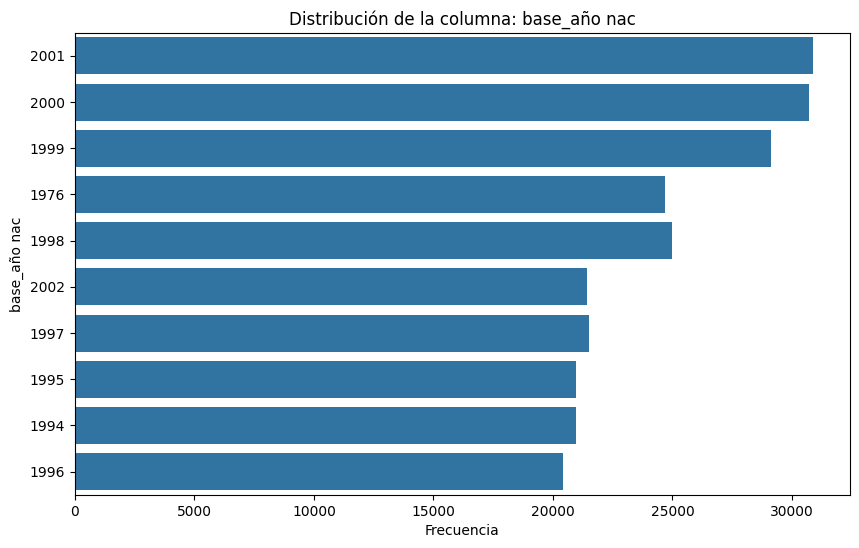

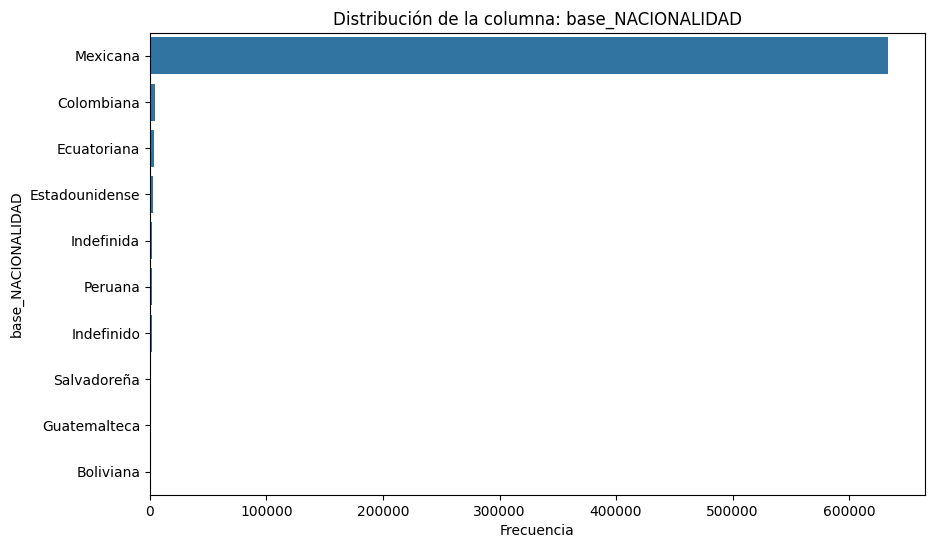

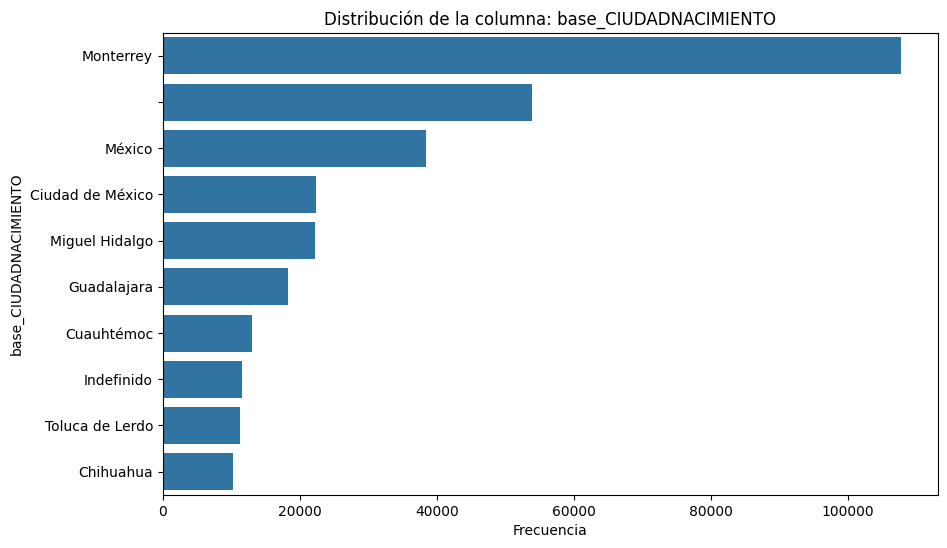

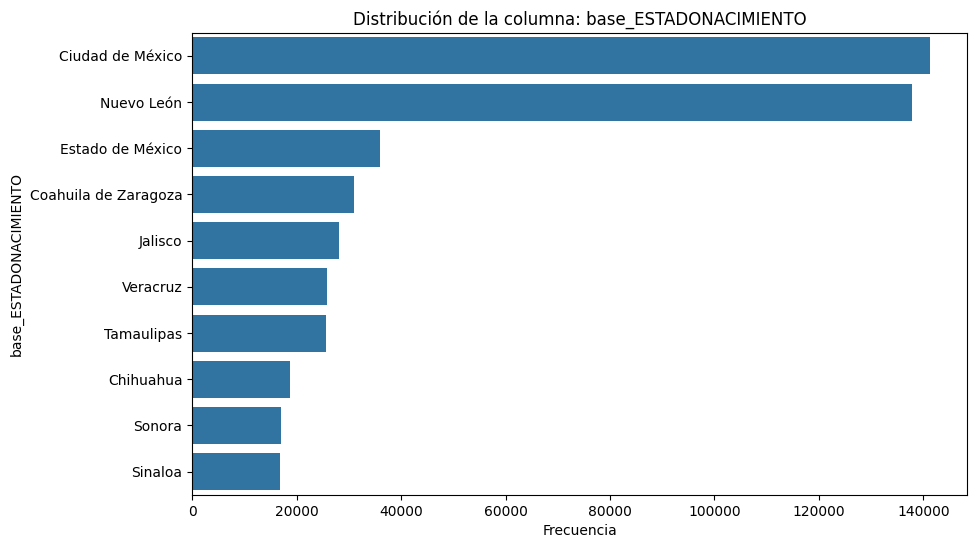

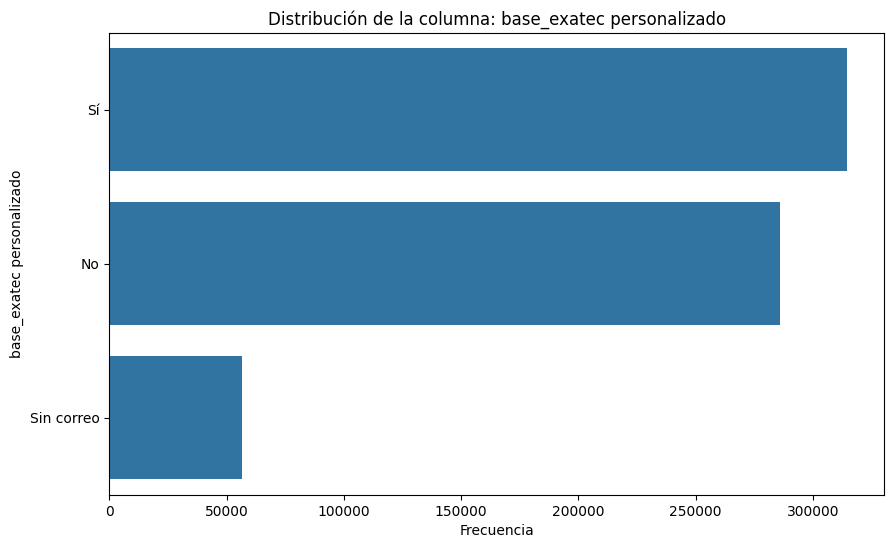

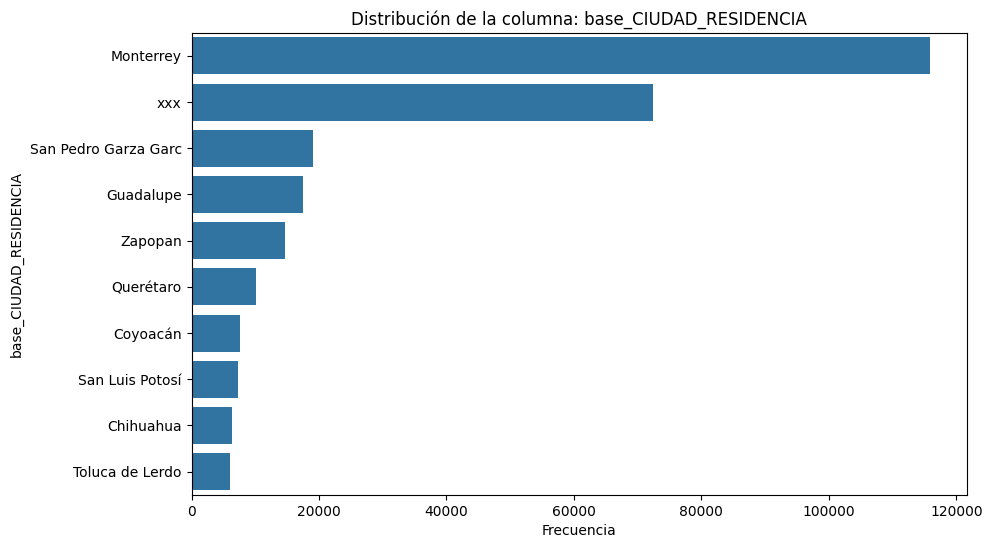

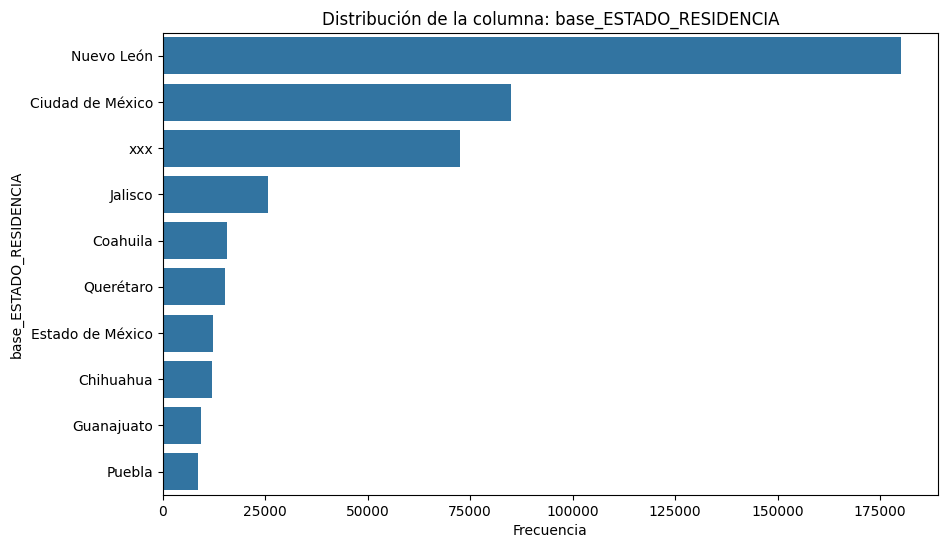

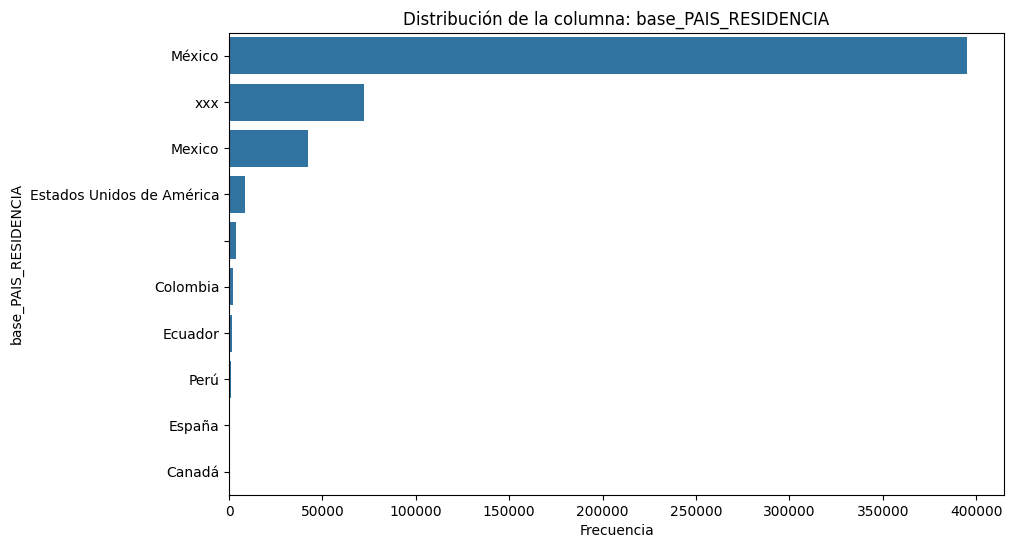

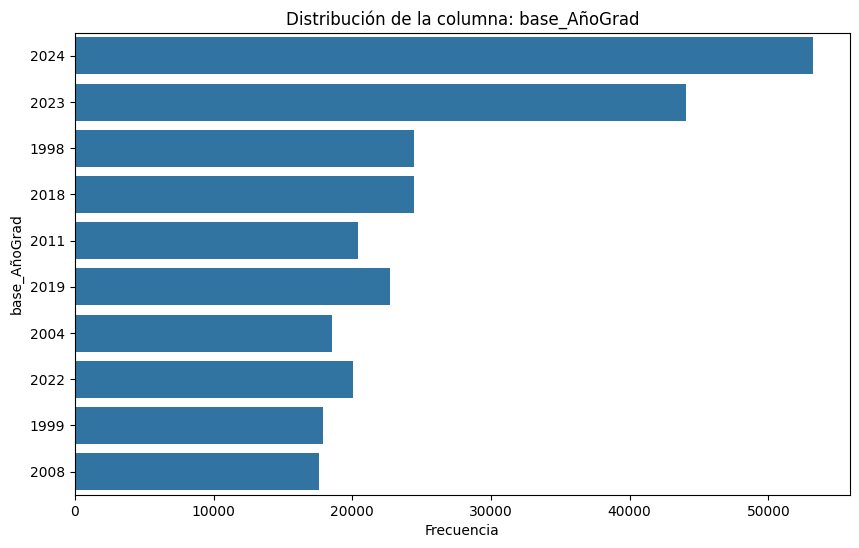

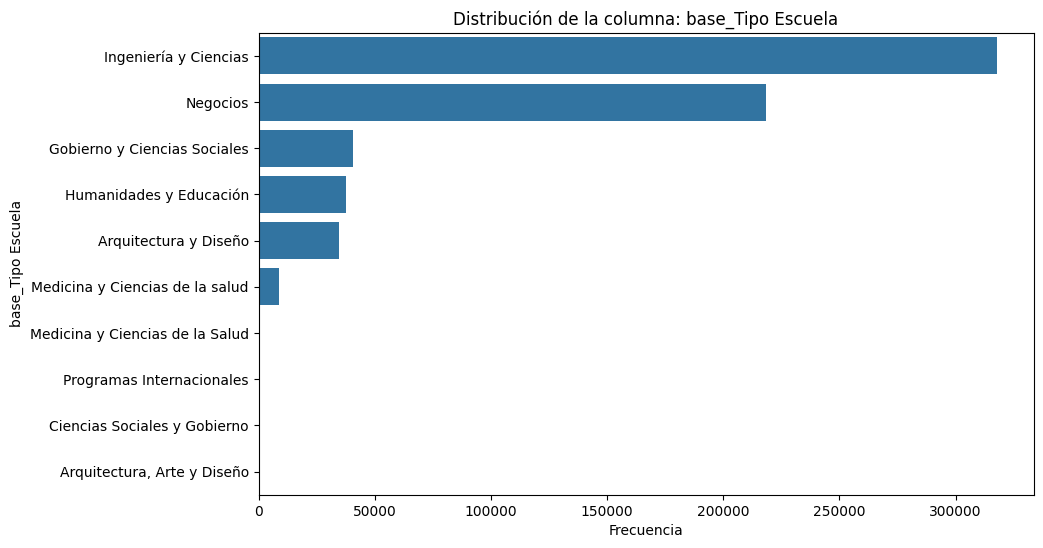

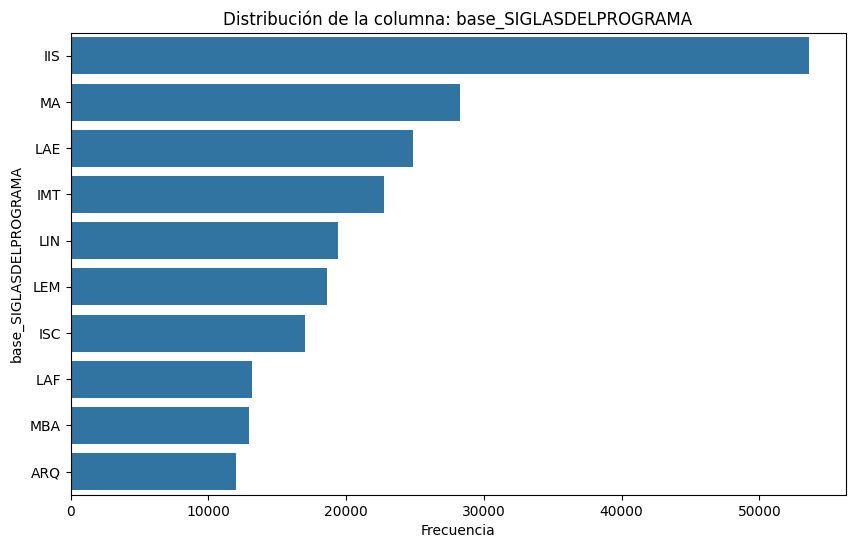

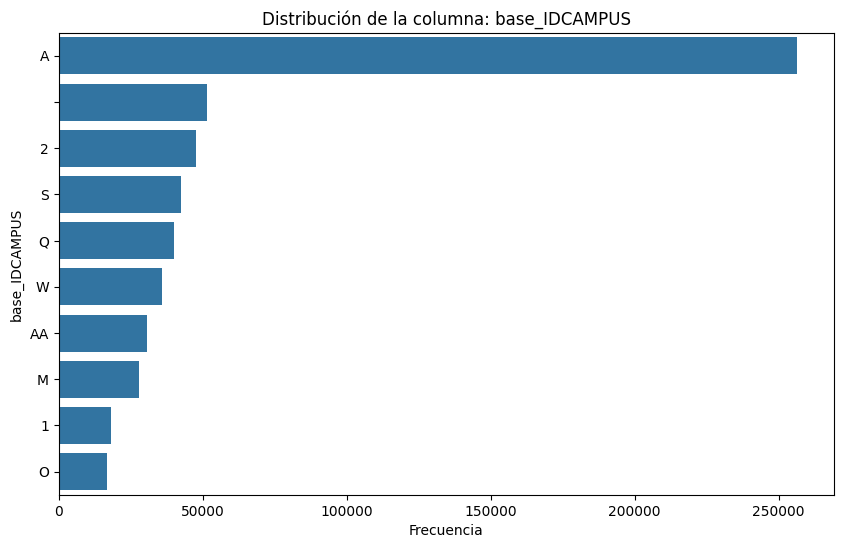

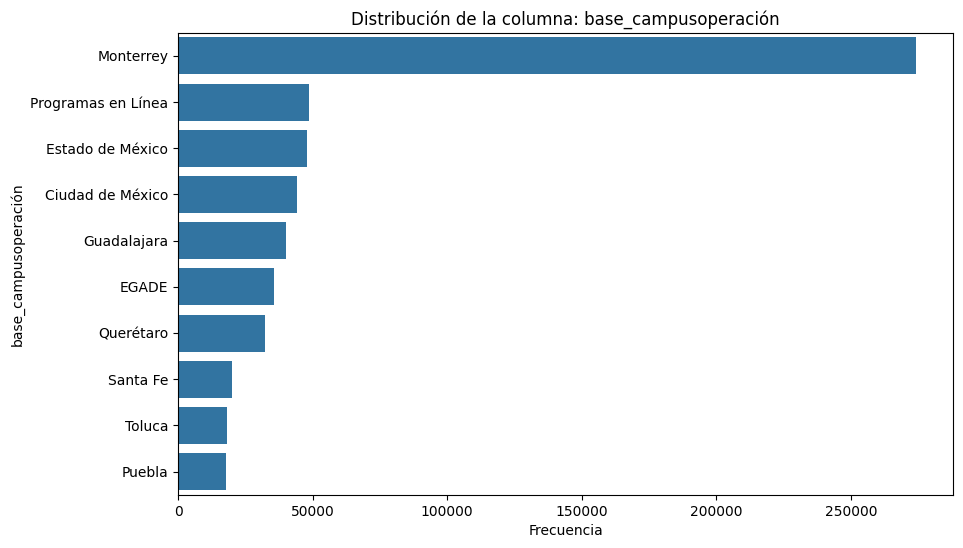

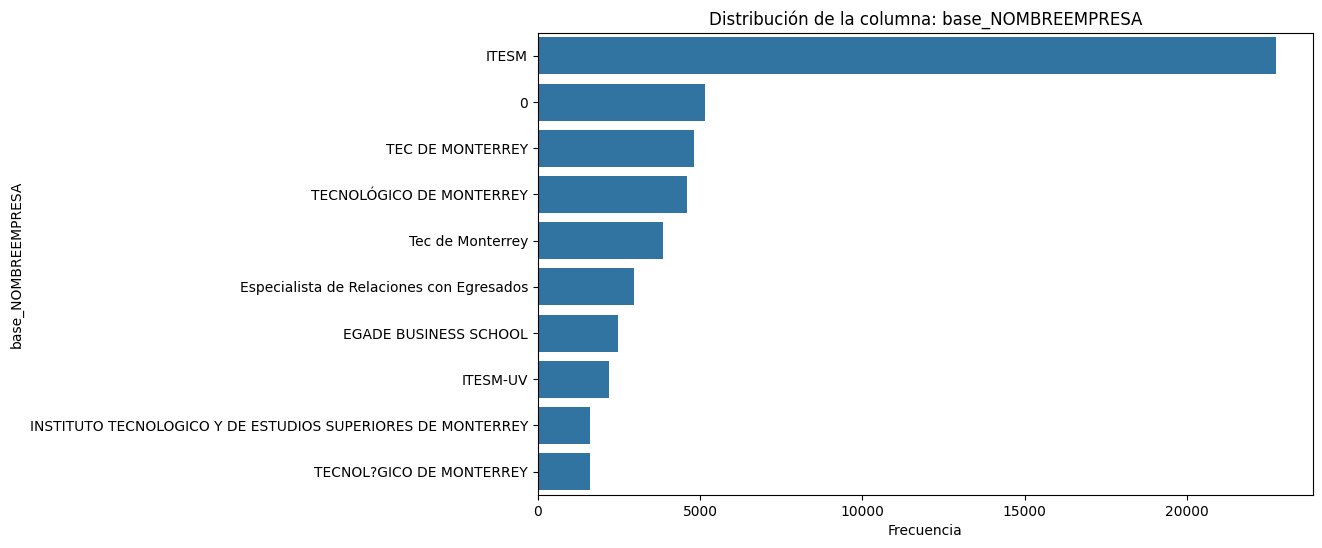

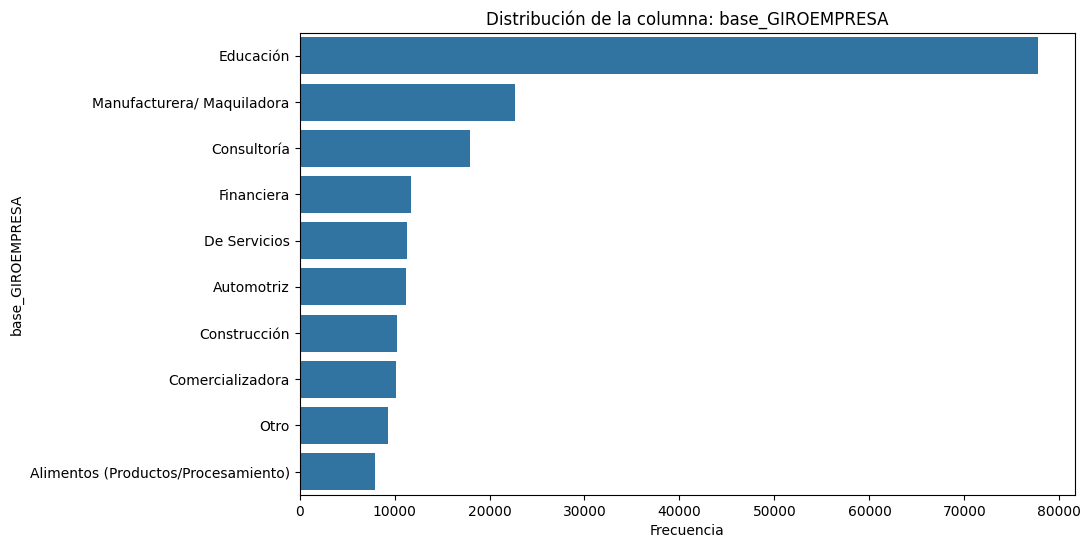

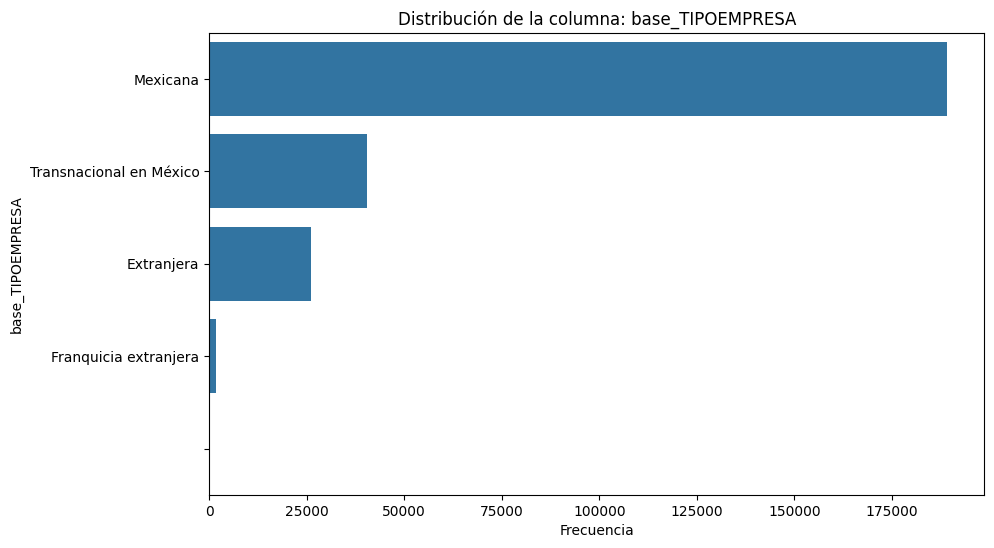

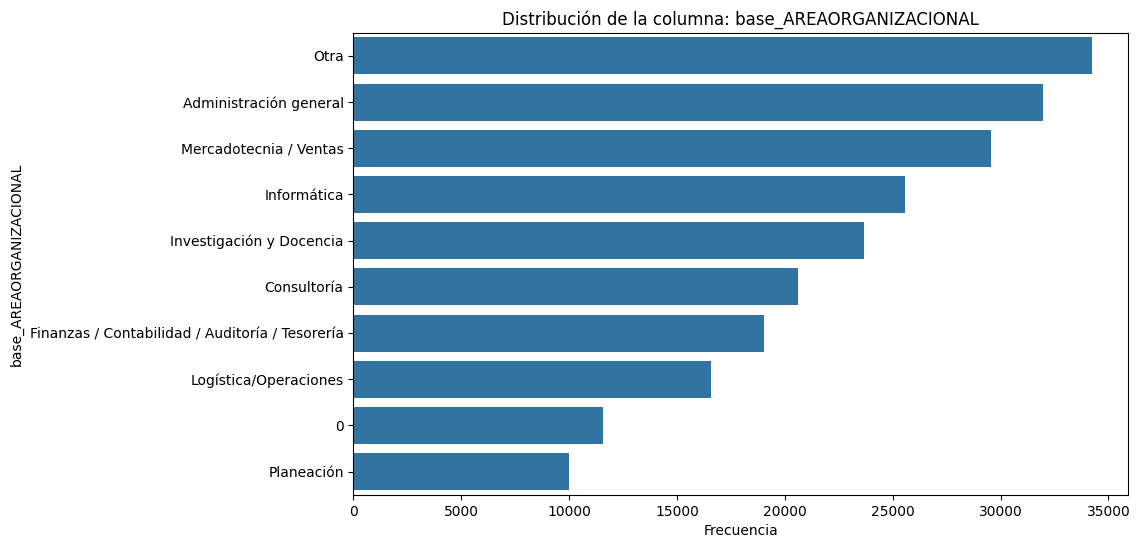

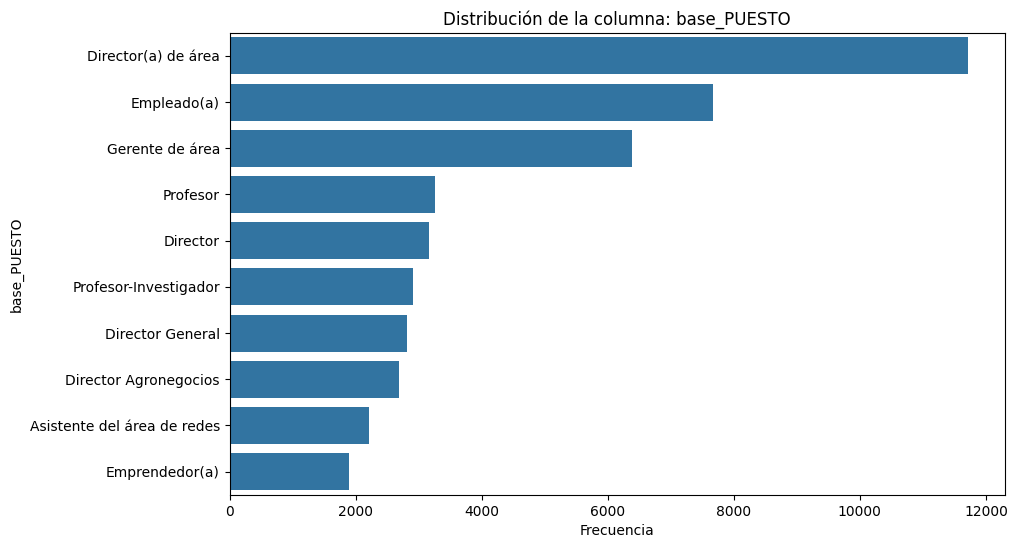

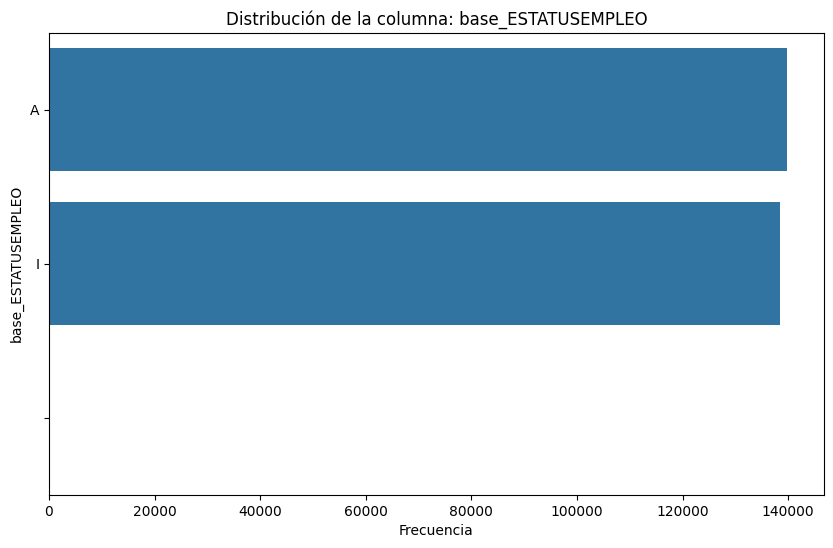

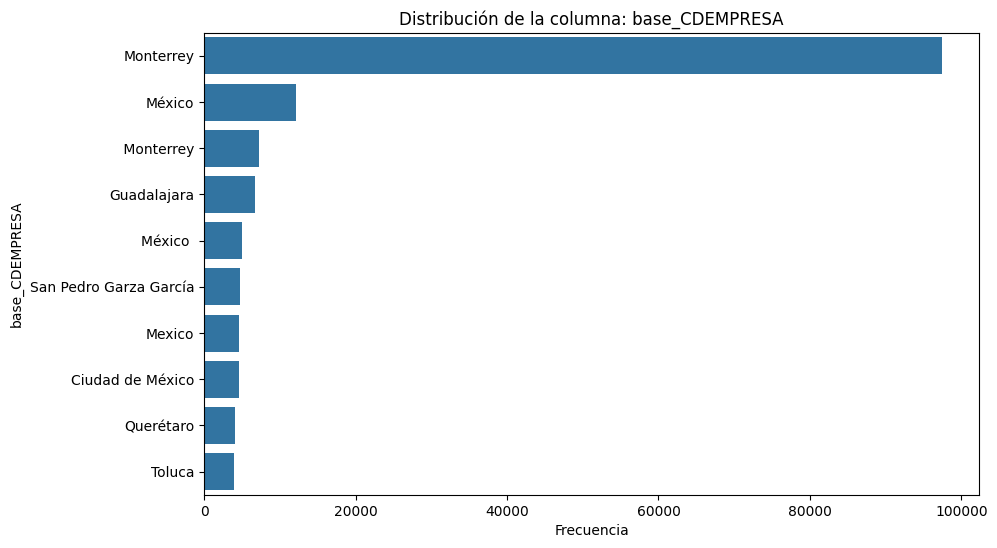

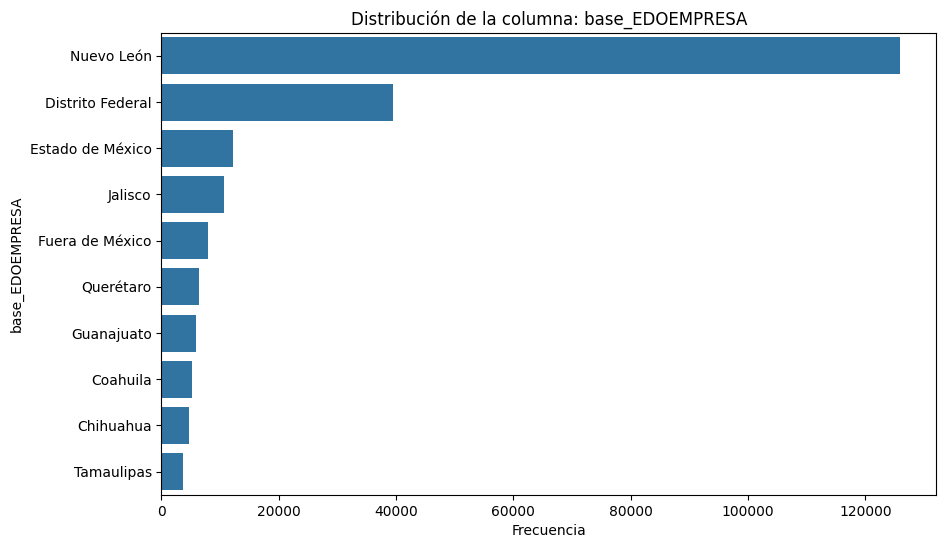

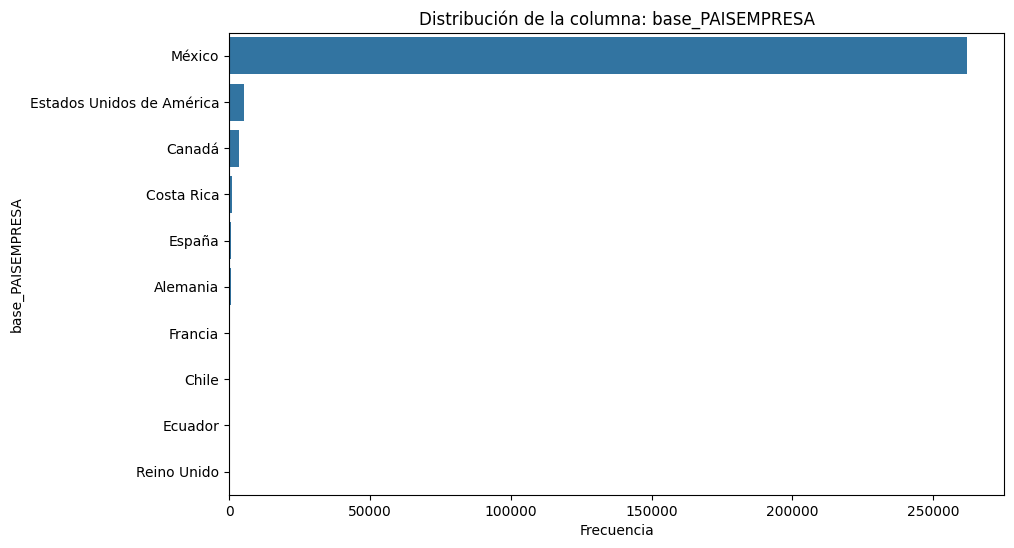

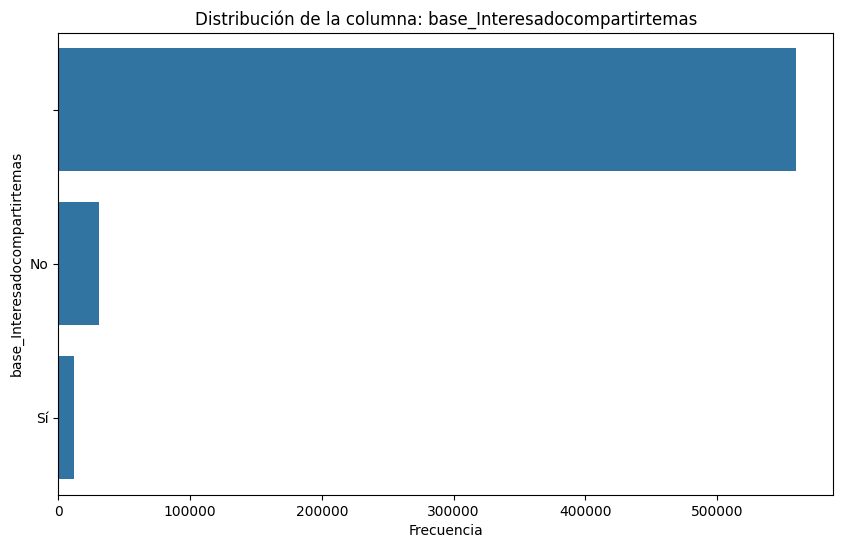

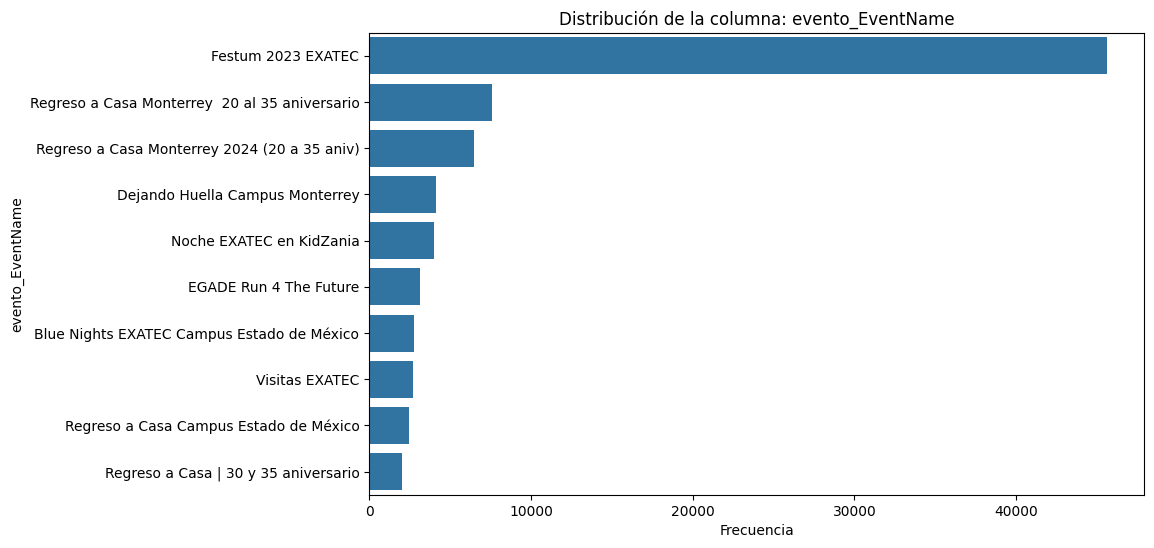

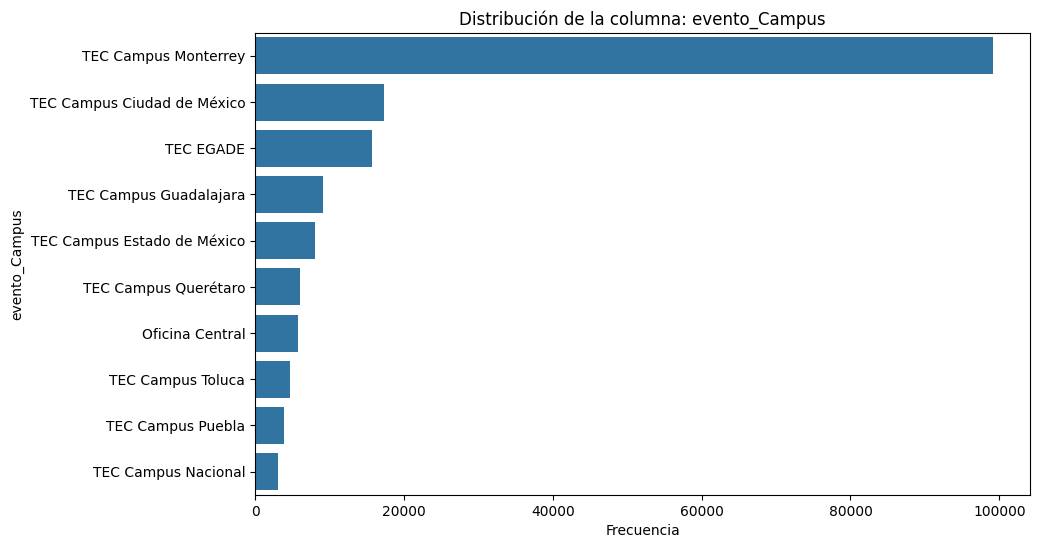

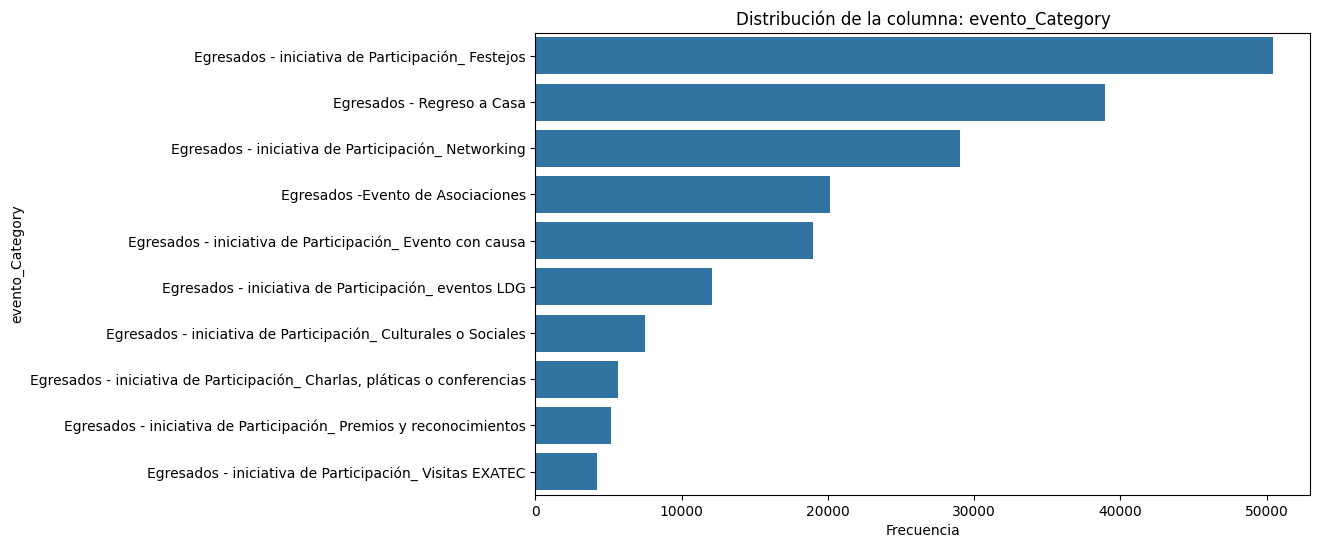

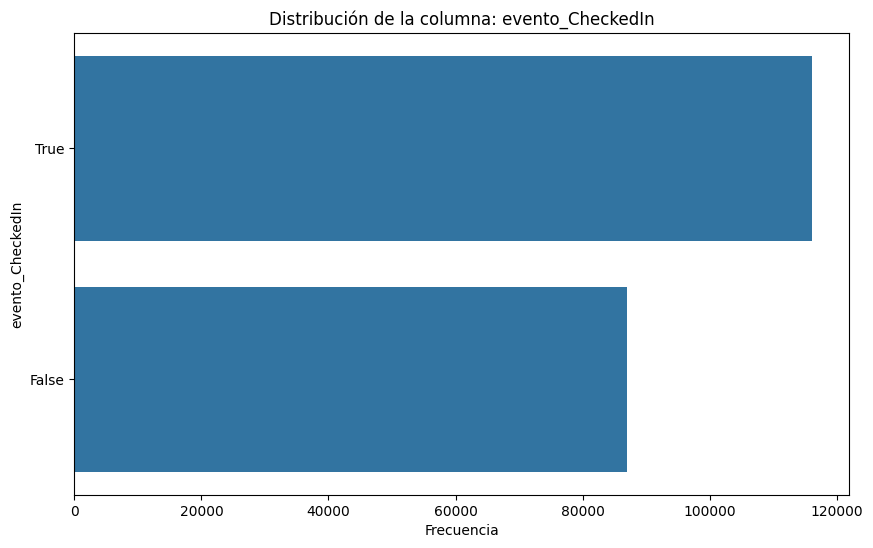

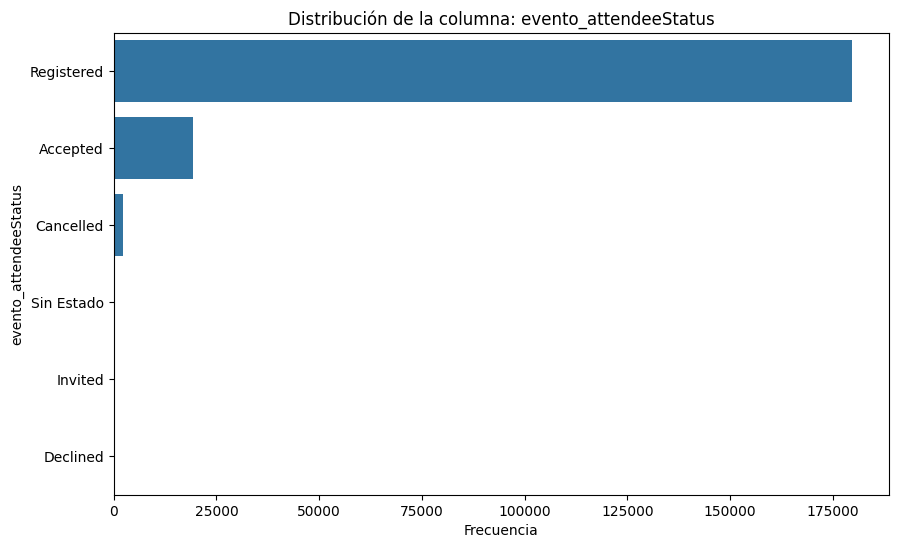

Distribución de la columna 'categoria_dominio_correo':
categoria_dominio_correo
Genérico     389140
Educativo    191590
Otros         76639
Name: count, dtype: int64

--------------------------------------------------

Distribución de la columna 'Campaña ID':
Campaña ID
10949903422    460923
2.06465E+11     34094
1.20817E+11      9562
3.43993E+11      5244
19343712904      2540
23415413809      1381
33875857906      1328
2.77422E+11       440
(Sin valor)       300
1.20843E+11        15
2.82747E+11         6
Name: count, dtype: int64

--------------------------------------------------

Distribución de la columna 'info_MUNICIPIO_ACTIVO':
info_MUNICIPIO_ACTIVO
Monterrey                 118637
San Pedro Garza García     19733
Guadalupe                  16670
Indefinido                 16108
Zapopan                    10454
                           ...  
Calpulalpan                    1
Lomas Verdes                   1
Sinaloa                        1
Santa Cruz Xoxocotlán          1
Tala

In [450]:
# Ver las columnas categóricas
categorical_columns = df_unido.select_dtypes(include=['object']).columns

# Mostrar las primeras filas para asegurarse de que los datos se cargaron correctamente
print(df_unido.head())

# Generar gráficos de barras para cada columna categórica
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_unido, y=col, order=df_unido[col].value_counts().index[:10])  # Mostrar el top 10 para columnas con muchas categorías
    plt.title(f'Distribución de la columna: {col}')
    plt.xlabel('Frecuencia')
    plt.ylabel(col)
    plt.show()

# Mostrar una tabla con la distribución de frecuencias de cada columna categórica
for col in categorical_columns:
    print(f"Distribución de la columna '{col}':")
    print(df_unido[col].value_counts())
    print("\n" + "-"*50 + "\n")


#Eliminar Estatus evento registro (última gráfica)

# Análisis

## 1. **Distribución Geográfica**
- **info_ESTADO_ACTIVO:**
  - **Nuevo León** tiene la mayor concentración de datos, significativamente superior a cualquier otro estado.
  - Le siguen la **Ciudad de México**, **Estado de México**, **Jalisco**, **Querétaro**, entre otros, aunque en proporciones mucho menores.
  
- **info_PAIS_ACTIVO:**
  - **México** es el país dominante en los datos, con una abrumadora mayoría siendo sede de la mayoria de los campus.
  - En menor proporción, algunos registros están asociados a **Estados Unidos**, seguido por países de América Latina como **Honduras**, **Bolivia**, **Panamá**, y otros.

## 2. **Distribución Temporal**
- **info_FECHA_ACTIVO:**
  - La fecha más común de actividad registrada es **14/08/2022**.
  - Hay picos adicionales en **05/07/2023** y otras fechas en años anteriores, lo que sugiere actividad en varios periodos a lo largo de los años.

- **info_FECHA_ACTIVO_NUM_CELULAR:**
  - La fecha más registrada es **14/10/2019**.
  - También hay una actividad destacada en **04/12/2023** y fechas posteriores como **20/06/2024**, lo que sugiere que los números celulares activos han sido actualizados recientemente.

## 3. **Distribución de Estado Civil**
- **info_ESTADOCIVIL:**
  - **Soltero** es el estado civil predominante.
  - Una proporción considerable de registros corresponde a **Casado**, mientras que las otras categorías como **Divorciado**, **Viudo**, o **Unión libre** tienen una representación mínima.

## 4. **Distribución por Intereses**
- **Intereses** (como **info_interes_TECNOLOGIA**, **info_interes_EDUCACION**, **info_interes_LIDERAZGO**, etc.):
  - Las personas que han indicado intereses en categorías como **tecnología**, **educación**, **liderazgo**, **negocios**, **cultura**, y **salud** presentan distribuciones uniformes.
  - En todas estas categorías, los registros que afirman tener estos intereses son numerosos, indicando un alto nivel de afinidad hacia estos temas.

## 5. **Distribución por Género**
- **base_SEXO:**
  - Hay más registros de personas de **sexo masculino** en comparación con **femenino**.

## 6. **Distribución por Año de Nacimiento**
- **base_año_nac:**
  - La mayor parte de los registros corresponde a personas nacidas entre **1993** y **2002**, lo que sugiere que la mayoría de los egresados en la base de datos son jóvenes adultos, de entre 21 y 30 años.

## 7. **Distribución por Nacionalidad**
- **base_NACIONALIDAD:**
  - **Mexicana** es, de manera abrumadora, la nacionalidad más común, seguida en proporciones muy menores por **Colombiana**, **Ecuatoriana**, **Peruana**, **Estadounidense**, y otras nacionalidades de América Latina.

## 8. **Distribución de la Presencia en LinkedIn**
- **info_SOCIAL_LINKEDIN:**
  - La mayoría de las personas **no tienen** un perfil activo en **LinkedIn**, lo que podría indicar que prefieren otros canales de contacto o no están tan activos en redes profesionales.

## 9. **Distribución por Número de Celular**
- **info_NUMERO_CELULAR:**
  - La mayoría de los registros indican tener un número de celular registrado, lo que sugiere que existe un alto nivel de accesibilidad para contactarlos.


# **Pregunta 9: ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?**


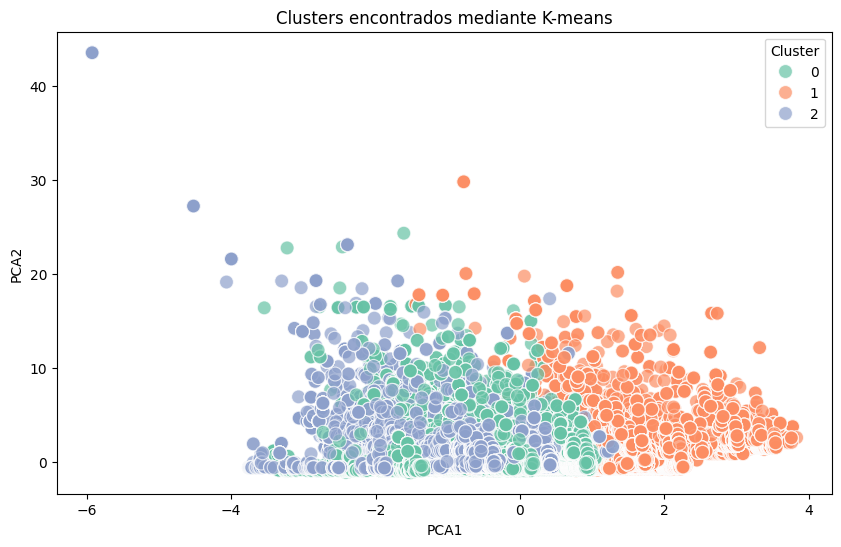

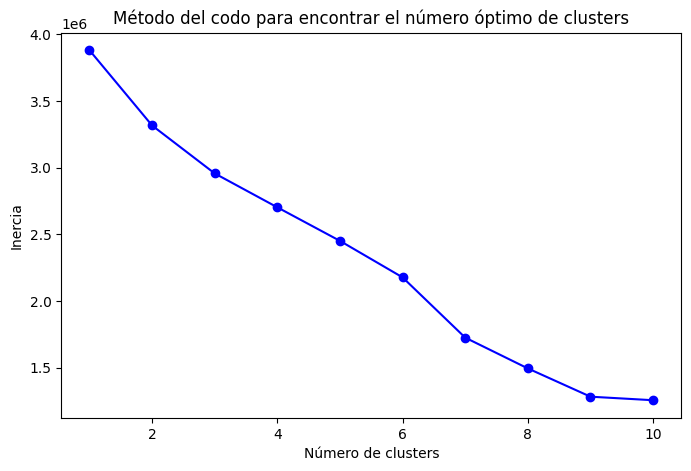

In [451]:
# Seleccionar solo las columnas numéricas (K-means solo trabaja con datos numéricos)
numeric_columns = df_unido.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_unido[numeric_columns].dropna()  # Eliminar filas con valores NaN

# Normalizar los datos para que todas las características tengan la misma escala
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Aplicar K-means para encontrar clusters
# Definir el número de clusters que queremos encontrar
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia n_clusters para buscar más o menos grupos
kmeans.fit(df_scaled)

# Agregar los clusters al DataFrame original
df_numeric['Cluster'] = kmeans.labels_

# Visualizar los clusters usando PCA (reducción de dimensionalidad a 2 componentes)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados de PCA
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = kmeans.labels_

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.7)
plt.title('Clusters encontrados mediante K-means')
plt.show()

# Evaluar el número óptimo de clusters
# Utilizamos el método del codo para determinar el número óptimo de clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la inercia para encontrar el "codo"
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


# Análisis
 - En el primer análisis de clusters, observamos que las clases no presentaban una buena definición visual. Por ello, decidimos reincorporar las columnas de interés. Aunque estas contienen numerosos valores vacíos, la información que aportan permite una mejor definición de los clusters.
  
  - Con las correcciones anteriores se observan patrones de agrupación en los datos mas definidos. Usando la técnica de **K-means**, indetificamos **seis clusters distintos**.
  - **Método del codo**:El método del codo confirma que **3 o 6 clusters** es una opción razonable para segmentar los datos, ya que la reducción en la inercia comienza a estabilizarse después de estos puntos, sin embargo al momento de obtener los graficos, hay mayor limpieza con 3.
  - Los puntos representados en el gráfico de **PCA** muestran que los datos se agrupan en diferentes regiones del espacio bidimensional, lo que sugiere que hay características compartidas entre los individuos dentro de cada cluster.


  - La normalización y reducción de dimensionalidad nos permiten observar que los datos contienen variables que son útiles para segmentar a los egresados en grupos con características similares. Esto será crucial para definir perfiles de **LDG**, **Voluntariado**, **Historia de éxito**, **Speaker en eventos**.





# ***Pregunta 10: ¿Se deberían normalizar las imágenes para visualizarlas mejor? No se usan imágenes***

No Aplica

# **Pregunta 11: ¿Hay desequilibrio en las clases de la variable objetivo?**

Para este análisis haremos iniciativa por iniciativa

###**Líder de generación**

<ipython-input-452-e5c26c72bac7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


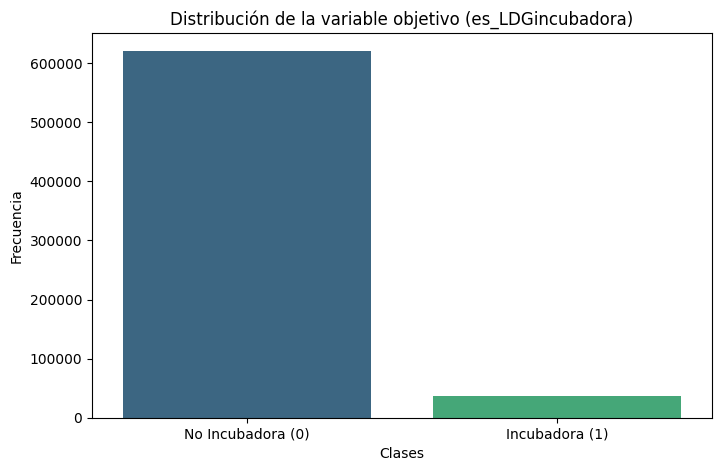

Proporción de clase 0 (No Incubadora): 94.38%
Proporción de clase 1 (Incubadora): 5.62%


In [452]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")


Técnicas a usar

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [453]:
from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoLDG.drop('es_LDGincubadora', axis=1)
y = df_unidoLDG['es_LDGincubadora']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoLDG = X_resampled.copy()
df_resampled_unidoLDG['es_LDGincubadora'] = y_resampled

print("Distribución de clases después del submuestreo:")
print(df_resampled_unidoLDG['es_LDGincubadora'].value_counts())


Distribución de clases después del submuestreo:
es_LDGincubadora
0    36926
1    36926
Name: count, dtype: int64


<ipython-input-454-2ba4315ec0d7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


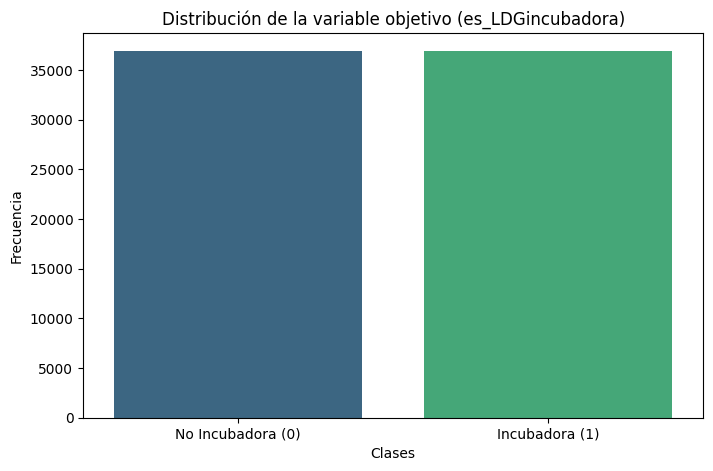

Proporción de clase 0 (No Incubadora): 50.00%
Proporción de clase 1 (Incubadora): 50.00%


In [454]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoLDG['es_LDGincubadora'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_LDGincubadora)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Incubadora (0)', 'Incubadora (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Incubadora): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Incubadora): {class_counts[1] / sum(class_counts) * 100:.2f}%")

###**Voluntariado**

<ipython-input-455-87c66caf7dc4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


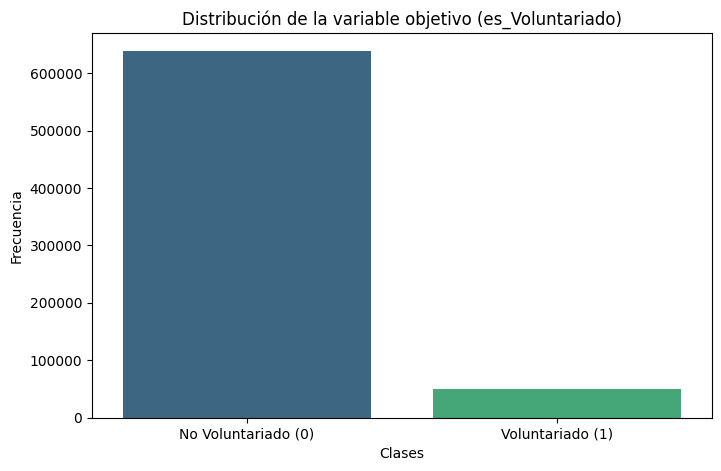

Proporción de clase 0 (No Voluntariado): 92.81%
Proporción de clase 1 (Voluntariado): 7.19%


In [455]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoVoluntariado['es_Voluntariado'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [456]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoVoluntariado.drop('es_Voluntariado', axis=1)
y = df_unidoVoluntariado['es_Voluntariado']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_unidoVoluntatiado = X_resampled.copy()
df_resampled_unidoVoluntatiado['es_Voluntariado'] = y_resampled

print("Distribución de clases después del submuestreo:")
print(df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts())


Distribución de clases después del submuestreo:
es_Voluntariado
0    49441
1    49441
Name: count, dtype: int64


<ipython-input-457-400ab3ef77a9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


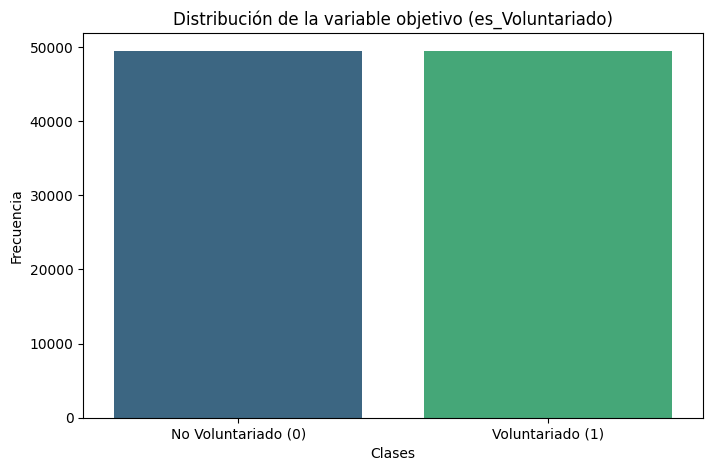

Proporción de clase 0 (No Voluntariado): 50.00%
Proporción de clase 1 (Voluntariado): 50.00%


In [457]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_unidoVoluntatiado['es_Voluntariado'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Voluntariado)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Voluntariado (0)', 'Voluntariado (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Voluntariado): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Voluntariado): {class_counts[1] / sum(class_counts) * 100:.2f}%")

###**Historia de éxito**

<ipython-input-458-90a5140e3048>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


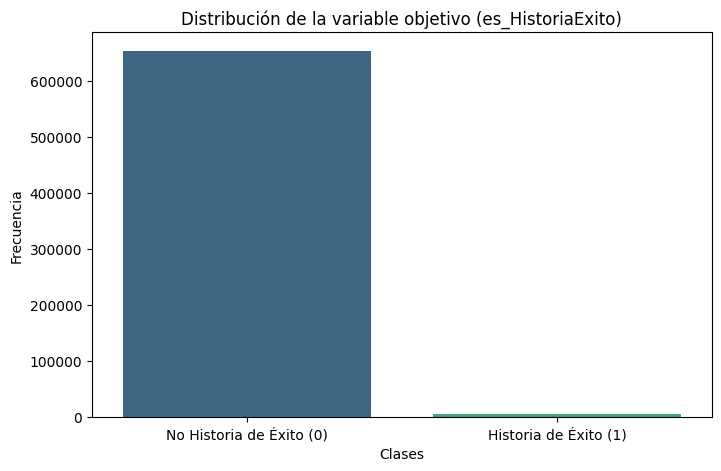

Proporción de clase 0 (No Historia de Éxito): 99.24%
Proporción de clase 1 (Historia de Éxito): 0.76%


In [458]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoHistoriaExito['es_HistoriaExito'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Historia de Éxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Historia de Éxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

In [459]:
#from imblearn.under_sampling import RandomUnderSampler

# Definir la variable objetivo y las características
X = df_unidoHistoriaExito.drop('es_HistoriaExito', axis=1)
y = df_unidoHistoriaExito['es_HistoriaExito']

# Aplicar undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_HistoriaExito = X_resampled.copy()
df_resampled_HistoriaExito['es_HistoriaExito'] = y_resampled

print("Distribución de clases después del submuestreo:")
print(df_resampled_HistoriaExito['es_HistoriaExito'].value_counts())


Distribución de clases después del submuestreo:
es_HistoriaExito
0    4988
1    4988
Name: count, dtype: int64


<ipython-input-460-83663af99998>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


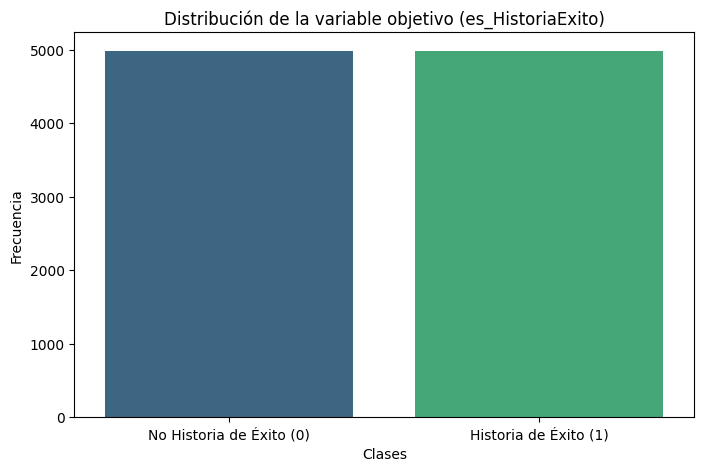

Proporción de clase 0 (No Historia de Éxito): 50.00%
Proporción de clase 1 (Historia de Éxito): 50.00%


In [460]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_HistoriaExito['es_HistoriaExito'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_HistoriaExito)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Historia de Éxito (0)', 'Historia de Éxito (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Historia de Éxito): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Historia de Éxito): {class_counts[1] / sum(class_counts) * 100:.2f}%")

###**Talks: Speaker en evento realizado por Relaciones con Egresados**

<ipython-input-461-3652b6915399>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


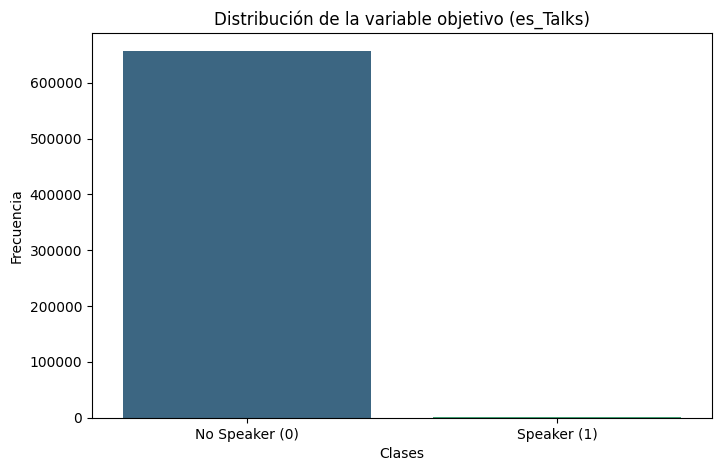

Proporción de clase 0 (No Speaker): 99.88%
Proporción de clase 1 (Speaker): 0.12%


In [461]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_unidoTalks['es_Talks'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

In [462]:
df_unidoTalks['es_Talks']

0         0
1         0
2         0
3         0
4         0
         ..
657481    0
657482    0
657483    0
657484    0
657485    0
Name: es_Talks, Length: 657486, dtype: int64

Oversampling: Incrementar registros de la clase minoritaria

In [463]:
from imblearn.over_sampling import RandomOverSampler

# Definir la variable objetivo y las características
X = df_unidoTalks.drop('es_Talks', axis=1)
y = df_unidoTalks['es_Talks']

# Aplicar sobremuestreo
oversample = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Crear un nuevo DataFrame con las clases balanceadas
df_resampled_Talks = X_resampled.copy()
df_resampled_Talks['es_Talks'] = y_resampled

# Imprimir la distribución de clases después del sobremuestreo
print("Distribución de clases después del sobremuestreo:")
print(df_resampled_Talks['es_Talks'].value_counts())

Distribución de clases después del sobremuestreo:
es_Talks
0    656683
1    656683
Name: count, dtype: int64


<ipython-input-464-a40f13c2f4ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


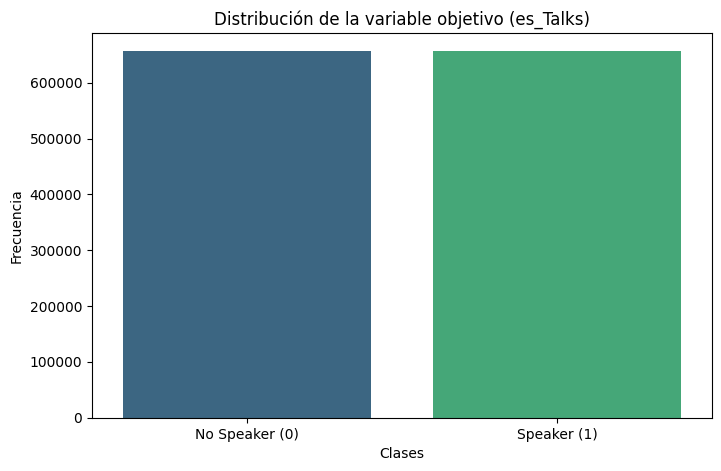

Proporción de clase 0 (No Speaker): 50.00%
Proporción de clase 1 (Speaker): 50.00%


In [464]:
#Análisis estadístico
# Conteo de las clases
class_counts = df_resampled_Talks['es_Talks'].value_counts()

# Visualización del desequilibrio
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribución de la variable objetivo (es_Talks)')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['No Speaker (0)', 'Speaker (1)'])
plt.show()

# Imprimir proporción
print(f"Proporción de clase 0 (No Speaker): {class_counts[0] / sum(class_counts) * 100:.2f}%")
print(f"Proporción de clase 1 (Speaker): {class_counts[1] / sum(class_counts) * 100:.2f}%")

Submuestreo: Reducir el número de ejemplos en la clase mayoritaria.

El conjunto de datos presenta un claro desequilibrio de clases, donde la mayoría de los registros no están asociados a la iniciativa incubadora. Este desequilibrio puede generar problemas durante la fase de modelado, ya que los modelos tienden a favorecer la predicción de la clase mayoritaria. Para abordar este problema, aplicamos técnicas de re-balanceo de datos, optando en este caso por undersampling, lo que nos permitió obtener un total de 39,000 registros para entrenar el modelo.

**Iniciativa Voluntariado**

Al igual que en la iniciativa Líder de Generación, la iniciativa de Voluntariado también muestra un fuerte desequilibrio de clases, con la mayoría de los registros fuera de la iniciativa. Para mitigar el impacto de este desequilibrio y debido a la cantidad de datos disponibles, decidimos aplicar undersampling, obteniendo un total de 49,000 registros para el modelado.

**Iniciativa Historia de Éxito**

En el caso de la iniciativa Historia de Éxito, el desafío es aún mayor, ya que menos del 0.05% de los registros forman parte de la iniciativa. No obstante, dado el tipo de perfil de los datos, consideramos más apropiado realizar undersampling, lo que resultó en un conjunto final de 5,000 registros. Aunque el tamaño del conjunto es reducido, es suficiente para entrenar modelos lineales como regresión logística, regresión lineal o árboles de decisión.

**Iniciativa Speaker**

Similar a la iniciativa Historia de Éxito, la iniciativa de Speaker también presenta un claro desequilibrio de clases, donde la cantidad de Speakers es muy pequeña. En este caso, optamos por aplicar oversampling, logrando expandir el conjunto de datos a 600,000 registros para el modelado.


**Resumen General**

En las cuatro iniciativas, se utilizarán técnicas de re-balanceo como undersampling u oversampling  para asegurar un adecuado balance de clases durante la construcción de los modelos.